In [1]:
import matplotlib.pyplot as plt

C:\Users\purey.rp\AppData\Local\Temp\ipykernel_20784\2978466137.py:24: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  figure.canvas.set_window_title('SI model')
C:\Users\purey.rp\AppData\Local\Temp\ipykernel_20784\2978466137.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])


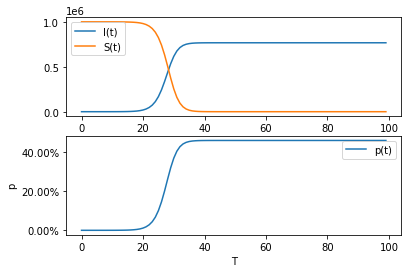

In [4]:
N = 1000000
S = N - 1
I = 1
beta = 0.6

sus = [] # infected compartment
inf = [] # susceptible compartment
prob = [] # probability of infection at time t

def si_model(S, I, N):
    t = 0
    while (t < 100):
        S = S - beta * ((S * I / N))
        I = I + beta * ((S * I) / N)
        p = beta * (I / N)

        sus.append(S)
        inf.append(I)
        prob.append(p)
        t = t + 1

si_model(S, I, N)
figure = plt.figure()
figure.canvas.set_window_title('SI model')

figure.add_subplot(211)
inf_line, =plt.plot(inf, label='I(t)')

sus_line, = plt.plot(sus, label='S(t)')
plt.legend(handles=[inf_line, sus_line])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

ax = figure.add_subplot(212)
prob_line = plt.plot(prob, label='p(t)')
plt.legend(handles=prob_line)

type(ax)  # matplotlib.axes._subplots.AxesSubplot

# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

plt.xlabel('T')
plt.ylabel('p')

plt.show()

In [2]:
!pip install ndlib

  Created wheel for python-igraph: filename=python_igraph-0.10.1-py3-none-any.whl size=9076 sha256=1e4a484c3a30d96c9a666307b180b30c1cd5166495ee88b72399e05bff0c0484
  Stored in directory: c:\users\rpure\appdata\local\pip\cache\wheels\f6\e6\41\2944e1bc6ace9a9191295cbc79e512faeec454c0178d073876
Successfully built python-igraph


In [1]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import datetime

In [10]:
# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.SIModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

In [7]:
df = pd.read_csv('US_airways_09.2008.csv', sep=';')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540908 entries, 0 to 540907
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Year        540908 non-null  int64 
 1   Month       540908 non-null  int64 
 2   DayofMonth  540908 non-null  int64 
 3   Origin      540908 non-null  object
 4   Dest        540908 non-null  object
 5   Distance    540908 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 24.8+ MB


In [9]:
df.head()

Year  Month  DayofMonth Origin Dest  Distance
0  2008      9           2    STL  MCI       237
1  2008      9           2    STL  MCI       237
2  2008      9           2    STL  MCI       237
3  2008      9           2    STL  MCI       237
4  2008      9           2    STL  MCI       237

In [10]:
df.isnull().sum()

Year          0
Month         0
DayofMonth    0
Origin        0
Dest          0
Distance      0
dtype: int64

In [11]:
df.shape

(540908, 6)

In [23]:
# for index, row in df['Fly_date'].iteritems():
#     df.loc[index, ('Fly_day')] = (datetime.datetime.strptime(row, "%d.%m.%Y").date() - datetime.date(2008, 1, 1)).days 

In [24]:
# df['Fly_day'].astype(int)

In [12]:
df = df.sort_values(by=['DayofMonth'])
df = df.reset_index(drop=True)

In [16]:
# df['Infected_score'] = 0.0
df['Infected'] = 0
df['Infected_SI'] = 0
df['Infected_Score'] = 0.0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540908 entries, 0 to 540907
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            540908 non-null  int64  
 1   Month           540908 non-null  int64  
 2   DayofMonth      540908 non-null  int64  
 3   Origin          540908 non-null  object 
 4   Dest            540908 non-null  object 
 5   Distance        540908 non-null  int64  
 6   Infected        540908 non-null  int64  
 7   Infected_SI     540908 non-null  int64  
 8   Infected_Score  540908 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 37.1+ MB


In [18]:
df.head()

Year  Month  DayofMonth Origin Dest  Distance  Infected  Infected_SI  \
0  2008      9           1    ATL  LIT       453         0            0   
1  2008      9           1    DEN  FAR       627         0            0   
2  2008      9           1    FAR  DEN       627         0            0   
3  2008      9           1    DAY  ORD       240         0            0   
4  2008      9           1    ORD  DAY       240         0            0   

   Infected_Score  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

In [19]:
def get_start_city_index(city):
    index = df.index
    apples_indices = index[df['Origin'] == city]
    apples_indices_list = apples_indices.tolist()
    return apples_indices_list[0] if len(apples_indices_list) > 0 else -1

In [20]:
def si_model(S, I, beta, day, start_day):
    N = S + 1
    t = start_day
    while (t < day):
        S = S - beta * ((S * I / N))
        I = I + beta * ((S * I) / N)
        p = beta * (I / N)
        t = t + 1
    return S

In [43]:
def get_city_list(start_city, inf_prob):
    start_index = get_start_city_index(start_city)
    if start_index != -1:
        df.loc[start_index, ('Infected')] = 1
        start_day = df.loc[start_index, ('DayofMonth')]
        destination_city_list = [df.loc[start_index, ('Origin')]]
        print(destination_city_list)
        for index, row in df.iterrows():
            if index >= start_index:
                for dest_city in destination_city_list:
                    if row['Origin'] == dest_city:
                        if df.loc[index, ('Infected')] != 1:
                            df.loc[index, ('Infected')] = np.random.choice([0,1],1,p=[1-inf_prob,inf_prob])
#                         df.loc[index, ('Infected')] += row['Infected']
                        
#                         df.loc[index, ('Infected_SI')] = si_model(row['Destination_population'], row['Infected'], inf_prob, row['Fly_day'])
                        destination_city_list.append(row['Dest'])
                        city_set = set(destination_city_list)
                        destination_city_list = list(city_set)
                print(index)
    else:
        print('Такого города нет в плане перелетов')

In [44]:
get_city_list('DAY', 0.5)

['DAY']
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204


3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872


5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878


7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547


9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9241
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9260
9261


10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
10694
10695
10696
10697
10698
10699
10700
10701
10702
10703
10704
10705
10706
10707
10708
10709
10710
10711
10712
10713
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10726
10727
10728
10729
10730
10731
10732
10733
10734
10735
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
10762
10763
10764
10765
10766
10767
10768
10769
10770
10771
10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
1084

12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
12337
12338
12339
12340
12341
12342
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
12353
12354
12355
12356
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
12390
12391
12392
12393
12394
12395
12396
12397
12398
12399
12400
12401
12402
12403
12404
12405
12406
12407
12408
12409
12410
12411
12412
12413
12414
12415
12416
12417
12418
12419
12420
12421
12422
12423
12424
12425
12426
12427
12428
12429
12430
12431
12432
12433
12434
12435
12436
12437
12438
12439
12440
12441
12442
12443
12444
12445
12446
12447
12448
12449
12450
12451
12452
12453
12454
12455
12456
12457
12458
12459
12460
12461
12462
12463
12464
12465
12466
12467
12468
12469
12470
1247

13749
13750
13751
13752
13753
13754
13755
13756
13757
13758
13759
13760
13761
13762
13763
13764
13765
13766
13767
13768
13769
13770
13771
13772
13773
13774
13775
13776
13777
13778
13779
13780
13781
13782
13783
13784
13785
13786
13787
13788
13789
13790
13791
13792
13793
13794
13795
13796
13797
13798
13799
13800
13801
13802
13803
13804
13805
13806
13807
13808
13809
13810
13811
13812
13813
13814
13815
13816
13817
13818
13819
13820
13821
13822
13823
13824
13825
13826
13827
13828
13829
13830
13831
13832
13833
13834
13835
13836
13837
13838
13839
13840
13841
13842
13843
13844
13845
13846
13847
13848
13849
13850
13851
13852
13853
13854
13855
13856
13857
13858
13859
13860
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13881
13882
13883
13884
13885
13886
13887
13888
13889
13890
13891
13892
13893
13894
13895
13896
13897
13898
13899
13900
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
1391

15383
15384
15385
15386
15387
15388
15389
15390
15391
15392
15393
15394
15395
15396
15397
15398
15399
15400
15401
15402
15403
15404
15405
15406
15407
15408
15409
15410
15411
15412
15413
15414
15415
15416
15417
15418
15419
15420
15421
15422
15423
15424
15425
15426
15427
15428
15429
15430
15431
15432
15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15443
15444
15445
15446
15447
15448
15449
15450
15451
15452
15453
15454
15455
15456
15457
15458
15459
15460
15461
15462
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15483
15484
15485
15486
15487
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15498
15499
15500
15501
15502
15503
15504
15505
15506
15507
15508
15509
15510
15511
15512
15513
15514
15515
15516
15517
15518
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
1554

16813
16814
16815
16816
16817
16818
16819
16820
16821
16822
16823
16824
16825
16826
16827
16828
16829
16830
16831
16832
16833
16834
16835
16836
16837
16838
16839
16840
16841
16842
16843
16844
16845
16846
16847
16848
16849
16850
16851
16852
16853
16854
16855
16856
16857
16858
16859
16860
16861
16862
16863
16864
16865
16866
16867
16868
16869
16870
16871
16872
16873
16874
16875
16876
16877
16878
16879
16880
16881
16882
16883
16884
16885
16886
16887
16888
16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
1697

18276
18277
18278
18279
18280
18281
18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
1844

19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19871
19872
19873
19874
19875
19876
19877
19878
19879
19880
19881
19882
19883
19884
19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
19904
19905
19906
19907
19908
19909
19910
19911
19912
19913
19914
19915
19916
19917
19918
19919
19920
19921
19922
19923
19924
19925
19926
19927
19928
19929
19930
19931
19932
19933
19934
19935
19936
19937
19938
19939
19940
19941
19942
19943
19944
19945
19946
19947
19948
19949
19950
19951
19952
19953
19954
19955
19956
19957
19958
19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19986
19987
19988
1998

21345
21346
21347
21348
21349
21350
21351
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21368
21369
21370
21371
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21390
21391
21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21418
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
21433
21434
21435
21436
21437
21438
21439
21440
21441
21442
21443
21444
21445
21446
21447
21448
21449
21450
21451
21452
21453
21454
21455
21456
21457
21458
21459
21460
21461
21462
21463
21464
21465
21466
21467
21468
21469
21470
21471
21472
21473
21474
21475
21476
21477
21478
21479
21480
21481
21482
21483
21484
21485
21486
21487
21488
21489
21490
21491
21492
21493
21494
21495
21496
21497
21498
21499
21500
21501
21502
21503
21504
21505
21506
21507
21508
21509
21510
2151

22808
22809
22810
22811
22812
22813
22814
22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
22826
22827
22828
22829
22830
22831
22832
22833
22834
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22851
22852
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22887
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
22912
22913
22914
22915
22916
22917
22918
22919
22920
22921
22922
22923
22924
22925
22926
22927
22928
22929
22930
22931
22932
22933
22934
22935
22936
22937
22938
22939
22940
22941
22942
22943
22944
22945
22946
22947
22948
22949
22950
22951
22952
22953
22954
22955
22956
22957
22958
22959
22960
22961
22962
22963
22964
22965
22966
22967
22968
22969
22970
22971
22972
22973
2297

24196
24197
24198
24199
24200
24201
24202
24203
24204
24205
24206
24207
24208
24209
24210
24211
24212
24213
24214
24215
24216
24217
24218
24219
24220
24221
24222
24223
24224
24225
24226
24227
24228
24229
24230
24231
24232
24233
24234
24235
24236
24237
24238
24239
24240
24241
24242
24243
24244
24245
24246
24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
24261
24262
24263
24264
24265
24266
24267
24268
24269
24270
24271
24272
24273
24274
24275
24276
24277
24278
24279
24280
24281
24282
24283
24284
24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
24325
24326
24327
24328
24329
24330
24331
24332
24333
24334
24335
24336
24337
24338
24339
24340
24341
24342
24343
24344
24345
24346
24347
24348
24349
24350
24351
24352
24353
24354
24355
24356
24357
24358
24359
24360
24361
2436

26012
26013
26014
26015
26016
26017
26018
26019
26020
26021
26022
26023
26024
26025
26026
26027
26028
26029
26030
26031
26032
26033
26034
26035
26036
26037
26038
26039
26040
26041
26042
26043
26044
26045
26046
26047
26048
26049
26050
26051
26052
26053
26054
26055
26056
26057
26058
26059
26060
26061
26062
26063
26064
26065
26066
26067
26068
26069
26070
26071
26072
26073
26074
26075
26076
26077
26078
26079
26080
26081
26082
26083
26084
26085
26086
26087
26088
26089
26090
26091
26092
26093
26094
26095
26096
26097
26098
26099
26100
26101
26102
26103
26104
26105
26106
26107
26108
26109
26110
26111
26112
26113
26114
26115
26116
26117
26118
26119
26120
26121
26122
26123
26124
26125
26126
26127
26128
26129
26130
26131
26132
26133
26134
26135
26136
26137
26138
26139
26140
26141
26142
26143
26144
26145
26146
26147
26148
26149
26150
26151
26152
26153
26154
26155
26156
26157
26158
26159
26160
26161
26162
26163
26164
26165
26166
26167
26168
26169
26170
26171
26172
26173
26174
26175
26176
26177
2617

27636
27637
27638
27639
27640
27641
27642
27643
27644
27645
27646
27647
27648
27649
27650
27651
27652
27653
27654
27655
27656
27657
27658
27659
27660
27661
27662
27663
27664
27665
27666
27667
27668
27669
27670
27671
27672
27673
27674
27675
27676
27677
27678
27679
27680
27681
27682
27683
27684
27685
27686
27687
27688
27689
27690
27691
27692
27693
27694
27695
27696
27697
27698
27699
27700
27701
27702
27703
27704
27705
27706
27707
27708
27709
27710
27711
27712
27713
27714
27715
27716
27717
27718
27719
27720
27721
27722
27723
27724
27725
27726
27727
27728
27729
27730
27731
27732
27733
27734
27735
27736
27737
27738
27739
27740
27741
27742
27743
27744
27745
27746
27747
27748
27749
27750
27751
27752
27753
27754
27755
27756
27757
27758
27759
27760
27761
27762
27763
27764
27765
27766
27767
27768
27769
27770
27771
27772
27773
27774
27775
27776
27777
27778
27779
27780
27781
27782
27783
27784
27785
27786
27787
27788
27789
27790
27791
27792
27793
27794
27795
27796
27797
27798
27799
27800
27801
2780

29111
29112
29113
29114
29115
29116
29117
29118
29119
29120
29121
29122
29123
29124
29125
29126
29127
29128
29129
29130
29131
29132
29133
29134
29135
29136
29137
29138
29139
29140
29141
29142
29143
29144
29145
29146
29147
29148
29149
29150
29151
29152
29153
29154
29155
29156
29157
29158
29159
29160
29161
29162
29163
29164
29165
29166
29167
29168
29169
29170
29171
29172
29173
29174
29175
29176
29177
29178
29179
29180
29181
29182
29183
29184
29185
29186
29187
29188
29189
29190
29191
29192
29193
29194
29195
29196
29197
29198
29199
29200
29201
29202
29203
29204
29205
29206
29207
29208
29209
29210
29211
29212
29213
29214
29215
29216
29217
29218
29219
29220
29221
29222
29223
29224
29225
29226
29227
29228
29229
29230
29231
29232
29233
29234
29235
29236
29237
29238
29239
29240
29241
29242
29243
29244
29245
29246
29247
29248
29249
29250
29251
29252
29253
29254
29255
29256
29257
29258
29259
29260
29261
29262
29263
29264
29265
29266
29267
29268
29269
29270
29271
29272
29273
29274
29275
29276
2927

30578
30579
30580
30581
30582
30583
30584
30585
30586
30587
30588
30589
30590
30591
30592
30593
30594
30595
30596
30597
30598
30599
30600
30601
30602
30603
30604
30605
30606
30607
30608
30609
30610
30611
30612
30613
30614
30615
30616
30617
30618
30619
30620
30621
30622
30623
30624
30625
30626
30627
30628
30629
30630
30631
30632
30633
30634
30635
30636
30637
30638
30639
30640
30641
30642
30643
30644
30645
30646
30647
30648
30649
30650
30651
30652
30653
30654
30655
30656
30657
30658
30659
30660
30661
30662
30663
30664
30665
30666
30667
30668
30669
30670
30671
30672
30673
30674
30675
30676
30677
30678
30679
30680
30681
30682
30683
30684
30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
30718
30719
30720
30721
30722
30723
30724
30725
30726
30727
30728
30729
30730
30731
30732
30733
30734
30735
30736
30737
30738
30739
30740
30741
30742
30743
3074

31971
31972
31973
31974
31975
31976
31977
31978
31979
31980
31981
31982
31983
31984
31985
31986
31987
31988
31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
32003
32004
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32018
32019
32020
32021
32022
32023
32024
32025
32026
32027
32028
32029
32030
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
32085
32086
32087
32088
32089
32090
32091
32092
32093
32094
32095
32096
32097
32098
32099
32100
32101
32102
32103
32104
32105
32106
32107
32108
32109
32110
32111
32112
32113
32114
32115
32116
32117
32118
32119
32120
32121
32122
32123
32124
32125
32126
32127
32128
32129
32130
32131
32132
32133
32134
32135
32136
3213

33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
33460
33461
33462
33463
33464
33465
33466
33467
33468
33469
33470
33471
33472
33473
33474
33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33517
33518
33519
33520
33521
33522
33523
33524
33525
33526
33527
33528
33529
33530
33531
33532
33533
33534
33535
33536
33537
33538
33539
33540
33541
33542
33543
33544
33545
33546
33547
33548
33549
33550
33551
33552
33553
33554
33555
33556
33557
33558
33559
33560
33561
33562
33563
33564
33565
33566
33567
33568
33569
33570
33571
33572
33573
33574
33575
33576
33577
33578
33579
33580
33581
33582
33583
3358

34930
34931
34932
34933
34934
34935
34936
34937
34938
34939
34940
34941
34942
34943
34944
34945
34946
34947
34948
34949
34950
34951
34952
34953
34954
34955
34956
34957
34958
34959
34960
34961
34962
34963
34964
34965
34966
34967
34968
34969
34970
34971
34972
34973
34974
34975
34976
34977
34978
34979
34980
34981
34982
34983
34984
34985
34986
34987
34988
34989
34990
34991
34992
34993
34994
34995
34996
34997
34998
34999
35000
35001
35002
35003
35004
35005
35006
35007
35008
35009
35010
35011
35012
35013
35014
35015
35016
35017
35018
35019
35020
35021
35022
35023
35024
35025
35026
35027
35028
35029
35030
35031
35032
35033
35034
35035
35036
35037
35038
35039
35040
35041
35042
35043
35044
35045
35046
35047
35048
35049
35050
35051
35052
35053
35054
35055
35056
35057
35058
35059
35060
35061
35062
35063
35064
35065
35066
35067
35068
35069
35070
35071
35072
35073
35074
35075
35076
35077
35078
35079
35080
35081
35082
35083
35084
35085
35086
35087
35088
35089
35090
35091
35092
35093
35094
35095
3509

36384
36385
36386
36387
36388
36389
36390
36391
36392
36393
36394
36395
36396
36397
36398
36399
36400
36401
36402
36403
36404
36405
36406
36407
36408
36409
36410
36411
36412
36413
36414
36415
36416
36417
36418
36419
36420
36421
36422
36423
36424
36425
36426
36427
36428
36429
36430
36431
36432
36433
36434
36435
36436
36437
36438
36439
36440
36441
36442
36443
36444
36445
36446
36447
36448
36449
36450
36451
36452
36453
36454
36455
36456
36457
36458
36459
36460
36461
36462
36463
36464
36465
36466
36467
36468
36469
36470
36471
36472
36473
36474
36475
36476
36477
36478
36479
36480
36481
36482
36483
36484
36485
36486
36487
36488
36489
36490
36491
36492
36493
36494
36495
36496
36497
36498
36499
36500
36501
36502
36503
36504
36505
36506
36507
36508
36509
36510
36511
36512
36513
36514
36515
36516
36517
36518
36519
36520
36521
36522
36523
36524
36525
36526
36527
36528
36529
36530
36531
36532
36533
36534
36535
36536
36537
36538
36539
36540
36541
36542
36543
36544
36545
36546
36547
36548
36549
3655

38037
38038
38039
38040
38041
38042
38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
38071
38072
38073
38074
38075
38076
38077
38078
38079
38080
38081
38082
38083
38084
38085
38086
38087
38088
38089
38090
38091
38092
38093
38094
38095
38096
38097
38098
38099
38100
38101
38102
38103
38104
38105
38106
38107
38108
38109
38110
38111
38112
38113
38114
38115
38116
38117
38118
38119
38120
38121
38122
38123
38124
38125
38126
38127
38128
38129
38130
38131
38132
38133
38134
38135
38136
38137
38138
38139
38140
38141
38142
38143
38144
38145
38146
38147
38148
38149
38150
38151
38152
38153
38154
38155
38156
38157
38158
38159
38160
38161
38162
38163
38164
38165
38166
38167
38168
38169
38170
38171
38172
38173
38174
38175
38176
38177
38178
38179
38180
38181
38182
38183
38184
38185
38186
38187
38188
38189
38190
38191
38192
38193
38194
38195
38196
38197
38198
38199
38200
38201
38202
3820

39613
39614
39615
39616
39617
39618
39619
39620
39621
39622
39623
39624
39625
39626
39627
39628
39629
39630
39631
39632
39633
39634
39635
39636
39637
39638
39639
39640
39641
39642
39643
39644
39645
39646
39647
39648
39649
39650
39651
39652
39653
39654
39655
39656
39657
39658
39659
39660
39661
39662
39663
39664
39665
39666
39667
39668
39669
39670
39671
39672
39673
39674
39675
39676
39677
39678
39679
39680
39681
39682
39683
39684
39685
39686
39687
39688
39689
39690
39691
39692
39693
39694
39695
39696
39697
39698
39699
39700
39701
39702
39703
39704
39705
39706
39707
39708
39709
39710
39711
39712
39713
39714
39715
39716
39717
39718
39719
39720
39721
39722
39723
39724
39725
39726
39727
39728
39729
39730
39731
39732
39733
39734
39735
39736
39737
39738
39739
39740
39741
39742
39743
39744
39745
39746
39747
39748
39749
39750
39751
39752
39753
39754
39755
39756
39757
39758
39759
39760
39761
39762
39763
39764
39765
39766
39767
39768
39769
39770
39771
39772
39773
39774
39775
39776
39777
39778
3977

41544
41545
41546
41547
41548
41549
41550
41551
41552
41553
41554
41555
41556
41557
41558
41559
41560
41561
41562
41563
41564
41565
41566
41567
41568
41569
41570
41571
41572
41573
41574
41575
41576
41577
41578
41579
41580
41581
41582
41583
41584
41585
41586
41587
41588
41589
41590
41591
41592
41593
41594
41595
41596
41597
41598
41599
41600
41601
41602
41603
41604
41605
41606
41607
41608
41609
41610
41611
41612
41613
41614
41615
41616
41617
41618
41619
41620
41621
41622
41623
41624
41625
41626
41627
41628
41629
41630
41631
41632
41633
41634
41635
41636
41637
41638
41639
41640
41641
41642
41643
41644
41645
41646
41647
41648
41649
41650
41651
41652
41653
41654
41655
41656
41657
41658
41659
41660
41661
41662
41663
41664
41665
41666
41667
41668
41669
41670
41671
41672
41673
41674
41675
41676
41677
41678
41679
41680
41681
41682
41683
41684
41685
41686
41687
41688
41689
41690
41691
41692
41693
41694
41695
41696
41697
41698
41699
41700
41701
41702
41703
41704
41705
41706
41707
41708
41709
4171

43197
43198
43199
43200
43201
43202
43203
43204
43205
43206
43207
43208
43209
43210
43211
43212
43213
43214
43215
43216
43217
43218
43219
43220
43221
43222
43223
43224
43225
43226
43227
43228
43229
43230
43231
43232
43233
43234
43235
43236
43237
43238
43239
43240
43241
43242
43243
43244
43245
43246
43247
43248
43249
43250
43251
43252
43253
43254
43255
43256
43257
43258
43259
43260
43261
43262
43263
43264
43265
43266
43267
43268
43269
43270
43271
43272
43273
43274
43275
43276
43277
43278
43279
43280
43281
43282
43283
43284
43285
43286
43287
43288
43289
43290
43291
43292
43293
43294
43295
43296
43297
43298
43299
43300
43301
43302
43303
43304
43305
43306
43307
43308
43309
43310
43311
43312
43313
43314
43315
43316
43317
43318
43319
43320
43321
43322
43323
43324
43325
43326
43327
43328
43329
43330
43331
43332
43333
43334
43335
43336
43337
43338
43339
43340
43341
43342
43343
43344
43345
43346
43347
43348
43349
43350
43351
43352
43353
43354
43355
43356
43357
43358
43359
43360
43361
43362
4336

44635
44636
44637
44638
44639
44640
44641
44642
44643
44644
44645
44646
44647
44648
44649
44650
44651
44652
44653
44654
44655
44656
44657
44658
44659
44660
44661
44662
44663
44664
44665
44666
44667
44668
44669
44670
44671
44672
44673
44674
44675
44676
44677
44678
44679
44680
44681
44682
44683
44684
44685
44686
44687
44688
44689
44690
44691
44692
44693
44694
44695
44696
44697
44698
44699
44700
44701
44702
44703
44704
44705
44706
44707
44708
44709
44710
44711
44712
44713
44714
44715
44716
44717
44718
44719
44720
44721
44722
44723
44724
44725
44726
44727
44728
44729
44730
44731
44732
44733
44734
44735
44736
44737
44738
44739
44740
44741
44742
44743
44744
44745
44746
44747
44748
44749
44750
44751
44752
44753
44754
44755
44756
44757
44758
44759
44760
44761
44762
44763
44764
44765
44766
44767
44768
44769
44770
44771
44772
44773
44774
44775
44776
44777
44778
44779
44780
44781
44782
44783
44784
44785
44786
44787
44788
44789
44790
44791
44792
44793
44794
44795
44796
44797
44798
44799
44800
4480

46074
46075
46076
46077
46078
46079
46080
46081
46082
46083
46084
46085
46086
46087
46088
46089
46090
46091
46092
46093
46094
46095
46096
46097
46098
46099
46100
46101
46102
46103
46104
46105
46106
46107
46108
46109
46110
46111
46112
46113
46114
46115
46116
46117
46118
46119
46120
46121
46122
46123
46124
46125
46126
46127
46128
46129
46130
46131
46132
46133
46134
46135
46136
46137
46138
46139
46140
46141
46142
46143
46144
46145
46146
46147
46148
46149
46150
46151
46152
46153
46154
46155
46156
46157
46158
46159
46160
46161
46162
46163
46164
46165
46166
46167
46168
46169
46170
46171
46172
46173
46174
46175
46176
46177
46178
46179
46180
46181
46182
46183
46184
46185
46186
46187
46188
46189
46190
46191
46192
46193
46194
46195
46196
46197
46198
46199
46200
46201
46202
46203
46204
46205
46206
46207
46208
46209
46210
46211
46212
46213
46214
46215
46216
46217
46218
46219
46220
46221
46222
46223
46224
46225
46226
46227
46228
46229
46230
46231
46232
46233
46234
46235
46236
46237
46238
46239
4624

47868
47869
47870
47871
47872
47873
47874
47875
47876
47877
47878
47879
47880
47881
47882
47883
47884
47885
47886
47887
47888
47889
47890
47891
47892
47893
47894
47895
47896
47897
47898
47899
47900
47901
47902
47903
47904
47905
47906
47907
47908
47909
47910
47911
47912
47913
47914
47915
47916
47917
47918
47919
47920
47921
47922
47923
47924
47925
47926
47927
47928
47929
47930
47931
47932
47933
47934
47935
47936
47937
47938
47939
47940
47941
47942
47943
47944
47945
47946
47947
47948
47949
47950
47951
47952
47953
47954
47955
47956
47957
47958
47959
47960
47961
47962
47963
47964
47965
47966
47967
47968
47969
47970
47971
47972
47973
47974
47975
47976
47977
47978
47979
47980
47981
47982
47983
47984
47985
47986
47987
47988
47989
47990
47991
47992
47993
47994
47995
47996
47997
47998
47999
48000
48001
48002
48003
48004
48005
48006
48007
48008
48009
48010
48011
48012
48013
48014
48015
48016
48017
48018
48019
48020
48021
48022
48023
48024
48025
48026
48027
48028
48029
48030
48031
48032
48033
4803

49568
49569
49570
49571
49572
49573
49574
49575
49576
49577
49578
49579
49580
49581
49582
49583
49584
49585
49586
49587
49588
49589
49590
49591
49592
49593
49594
49595
49596
49597
49598
49599
49600
49601
49602
49603
49604
49605
49606
49607
49608
49609
49610
49611
49612
49613
49614
49615
49616
49617
49618
49619
49620
49621
49622
49623
49624
49625
49626
49627
49628
49629
49630
49631
49632
49633
49634
49635
49636
49637
49638
49639
49640
49641
49642
49643
49644
49645
49646
49647
49648
49649
49650
49651
49652
49653
49654
49655
49656
49657
49658
49659
49660
49661
49662
49663
49664
49665
49666
49667
49668
49669
49670
49671
49672
49673
49674
49675
49676
49677
49678
49679
49680
49681
49682
49683
49684
49685
49686
49687
49688
49689
49690
49691
49692
49693
49694
49695
49696
49697
49698
49699
49700
49701
49702
49703
49704
49705
49706
49707
49708
49709
49710
49711
49712
49713
49714
49715
49716
49717
49718
49719
49720
49721
49722
49723
49724
49725
49726
49727
49728
49729
49730
49731
49732
49733
4973

51306
51307
51308
51309
51310
51311
51312
51313
51314
51315
51316
51317
51318
51319
51320
51321
51322
51323
51324
51325
51326
51327
51328
51329
51330
51331
51332
51333
51334
51335
51336
51337
51338
51339
51340
51341
51342
51343
51344
51345
51346
51347
51348
51349
51350
51351
51352
51353
51354
51355
51356
51357
51358
51359
51360
51361
51362
51363
51364
51365
51366
51367
51368
51369
51370
51371
51372
51373
51374
51375
51376
51377
51378
51379
51380
51381
51382
51383
51384
51385
51386
51387
51388
51389
51390
51391
51392
51393
51394
51395
51396
51397
51398
51399
51400
51401
51402
51403
51404
51405
51406
51407
51408
51409
51410
51411
51412
51413
51414
51415
51416
51417
51418
51419
51420
51421
51422
51423
51424
51425
51426
51427
51428
51429
51430
51431
51432
51433
51434
51435
51436
51437
51438
51439
51440
51441
51442
51443
51444
51445
51446
51447
51448
51449
51450
51451
51452
51453
51454
51455
51456
51457
51458
51459
51460
51461
51462
51463
51464
51465
51466
51467
51468
51469
51470
51471
5147

52725
52726
52727
52728
52729
52730
52731
52732
52733
52734
52735
52736
52737
52738
52739
52740
52741
52742
52743
52744
52745
52746
52747
52748
52749
52750
52751
52752
52753
52754
52755
52756
52757
52758
52759
52760
52761
52762
52763
52764
52765
52766
52767
52768
52769
52770
52771
52772
52773
52774
52775
52776
52777
52778
52779
52780
52781
52782
52783
52784
52785
52786
52787
52788
52789
52790
52791
52792
52793
52794
52795
52796
52797
52798
52799
52800
52801
52802
52803
52804
52805
52806
52807
52808
52809
52810
52811
52812
52813
52814
52815
52816
52817
52818
52819
52820
52821
52822
52823
52824
52825
52826
52827
52828
52829
52830
52831
52832
52833
52834
52835
52836
52837
52838
52839
52840
52841
52842
52843
52844
52845
52846
52847
52848
52849
52850
52851
52852
52853
52854
52855
52856
52857
52858
52859
52860
52861
52862
52863
52864
52865
52866
52867
52868
52869
52870
52871
52872
52873
52874
52875
52876
52877
52878
52879
52880
52881
52882
52883
52884
52885
52886
52887
52888
52889
52890
5289

54254
54255
54256
54257
54258
54259
54260
54261
54262
54263
54264
54265
54266
54267
54268
54269
54270
54271
54272
54273
54274
54275
54276
54277
54278
54279
54280
54281
54282
54283
54284
54285
54286
54287
54288
54289
54290
54291
54292
54293
54294
54295
54296
54297
54298
54299
54300
54301
54302
54303
54304
54305
54306
54307
54308
54309
54310
54311
54312
54313
54314
54315
54316
54317
54318
54319
54320
54321
54322
54323
54324
54325
54326
54327
54328
54329
54330
54331
54332
54333
54334
54335
54336
54337
54338
54339
54340
54341
54342
54343
54344
54345
54346
54347
54348
54349
54350
54351
54352
54353
54354
54355
54356
54357
54358
54359
54360
54361
54362
54363
54364
54365
54366
54367
54368
54369
54370
54371
54372
54373
54374
54375
54376
54377
54378
54379
54380
54381
54382
54383
54384
54385
54386
54387
54388
54389
54390
54391
54392
54393
54394
54395
54396
54397
54398
54399
54400
54401
54402
54403
54404
54405
54406
54407
54408
54409
54410
54411
54412
54413
54414
54415
54416
54417
54418
54419
5442

56025
56026
56027
56028
56029
56030
56031
56032
56033
56034
56035
56036
56037
56038
56039
56040
56041
56042
56043
56044
56045
56046
56047
56048
56049
56050
56051
56052
56053
56054
56055
56056
56057
56058
56059
56060
56061
56062
56063
56064
56065
56066
56067
56068
56069
56070
56071
56072
56073
56074
56075
56076
56077
56078
56079
56080
56081
56082
56083
56084
56085
56086
56087
56088
56089
56090
56091
56092
56093
56094
56095
56096
56097
56098
56099
56100
56101
56102
56103
56104
56105
56106
56107
56108
56109
56110
56111
56112
56113
56114
56115
56116
56117
56118
56119
56120
56121
56122
56123
56124
56125
56126
56127
56128
56129
56130
56131
56132
56133
56134
56135
56136
56137
56138
56139
56140
56141
56142
56143
56144
56145
56146
56147
56148
56149
56150
56151
56152
56153
56154
56155
56156
56157
56158
56159
56160
56161
56162
56163
56164
56165
56166
56167
56168
56169
56170
56171
56172
56173
56174
56175
56176
56177
56178
56179
56180
56181
56182
56183
56184
56185
56186
56187
56188
56189
56190
5619

57547
57548
57549
57550
57551
57552
57553
57554
57555
57556
57557
57558
57559
57560
57561
57562
57563
57564
57565
57566
57567
57568
57569
57570
57571
57572
57573
57574
57575
57576
57577
57578
57579
57580
57581
57582
57583
57584
57585
57586
57587
57588
57589
57590
57591
57592
57593
57594
57595
57596
57597
57598
57599
57600
57601
57602
57603
57604
57605
57606
57607
57608
57609
57610
57611
57612
57613
57614
57615
57616
57617
57618
57619
57620
57621
57622
57623
57624
57625
57626
57627
57628
57629
57630
57631
57632
57633
57634
57635
57636
57637
57638
57639
57640
57641
57642
57643
57644
57645
57646
57647
57648
57649
57650
57651
57652
57653
57654
57655
57656
57657
57658
57659
57660
57661
57662
57663
57664
57665
57666
57667
57668
57669
57670
57671
57672
57673
57674
57675
57676
57677
57678
57679
57680
57681
57682
57683
57684
57685
57686
57687
57688
57689
57690
57691
57692
57693
57694
57695
57696
57697
57698
57699
57700
57701
57702
57703
57704
57705
57706
57707
57708
57709
57710
57711
57712
5771

59173
59174
59175
59176
59177
59178
59179
59180
59181
59182
59183
59184
59185
59186
59187
59188
59189
59190
59191
59192
59193
59194
59195
59196
59197
59198
59199
59200
59201
59202
59203
59204
59205
59206
59207
59208
59209
59210
59211
59212
59213
59214
59215
59216
59217
59218
59219
59220
59221
59222
59223
59224
59225
59226
59227
59228
59229
59230
59231
59232
59233
59234
59235
59236
59237
59238
59239
59240
59241
59242
59243
59244
59245
59246
59247
59248
59249
59250
59251
59252
59253
59254
59255
59256
59257
59258
59259
59260
59261
59262
59263
59264
59265
59266
59267
59268
59269
59270
59271
59272
59273
59274
59275
59276
59277
59278
59279
59280
59281
59282
59283
59284
59285
59286
59287
59288
59289
59290
59291
59292
59293
59294
59295
59296
59297
59298
59299
59300
59301
59302
59303
59304
59305
59306
59307
59308
59309
59310
59311
59312
59313
59314
59315
59316
59317
59318
59319
59320
59321
59322
59323
59324
59325
59326
59327
59328
59329
59330
59331
59332
59333
59334
59335
59336
59337
59338
5933

60605
60606
60607
60608
60609
60610
60611
60612
60613
60614
60615
60616
60617
60618
60619
60620
60621
60622
60623
60624
60625
60626
60627
60628
60629
60630
60631
60632
60633
60634
60635
60636
60637
60638
60639
60640
60641
60642
60643
60644
60645
60646
60647
60648
60649
60650
60651
60652
60653
60654
60655
60656
60657
60658
60659
60660
60661
60662
60663
60664
60665
60666
60667
60668
60669
60670
60671
60672
60673
60674
60675
60676
60677
60678
60679
60680
60681
60682
60683
60684
60685
60686
60687
60688
60689
60690
60691
60692
60693
60694
60695
60696
60697
60698
60699
60700
60701
60702
60703
60704
60705
60706
60707
60708
60709
60710
60711
60712
60713
60714
60715
60716
60717
60718
60719
60720
60721
60722
60723
60724
60725
60726
60727
60728
60729
60730
60731
60732
60733
60734
60735
60736
60737
60738
60739
60740
60741
60742
60743
60744
60745
60746
60747
60748
60749
60750
60751
60752
60753
60754
60755
60756
60757
60758
60759
60760
60761
60762
60763
60764
60765
60766
60767
60768
60769
60770
6077

62266
62267
62268
62269
62270
62271
62272
62273
62274
62275
62276
62277
62278
62279
62280
62281
62282
62283
62284
62285
62286
62287
62288
62289
62290
62291
62292
62293
62294
62295
62296
62297
62298
62299
62300
62301
62302
62303
62304
62305
62306
62307
62308
62309
62310
62311
62312
62313
62314
62315
62316
62317
62318
62319
62320
62321
62322
62323
62324
62325
62326
62327
62328
62329
62330
62331
62332
62333
62334
62335
62336
62337
62338
62339
62340
62341
62342
62343
62344
62345
62346
62347
62348
62349
62350
62351
62352
62353
62354
62355
62356
62357
62358
62359
62360
62361
62362
62363
62364
62365
62366
62367
62368
62369
62370
62371
62372
62373
62374
62375
62376
62377
62378
62379
62380
62381
62382
62383
62384
62385
62386
62387
62388
62389
62390
62391
62392
62393
62394
62395
62396
62397
62398
62399
62400
62401
62402
62403
62404
62405
62406
62407
62408
62409
62410
62411
62412
62413
62414
62415
62416
62417
62418
62419
62420
62421
62422
62423
62424
62425
62426
62427
62428
62429
62430
62431
6243

63729
63730
63731
63732
63733
63734
63735
63736
63737
63738
63739
63740
63741
63742
63743
63744
63745
63746
63747
63748
63749
63750
63751
63752
63753
63754
63755
63756
63757
63758
63759
63760
63761
63762
63763
63764
63765
63766
63767
63768
63769
63770
63771
63772
63773
63774
63775
63776
63777
63778
63779
63780
63781
63782
63783
63784
63785
63786
63787
63788
63789
63790
63791
63792
63793
63794
63795
63796
63797
63798
63799
63800
63801
63802
63803
63804
63805
63806
63807
63808
63809
63810
63811
63812
63813
63814
63815
63816
63817
63818
63819
63820
63821
63822
63823
63824
63825
63826
63827
63828
63829
63830
63831
63832
63833
63834
63835
63836
63837
63838
63839
63840
63841
63842
63843
63844
63845
63846
63847
63848
63849
63850
63851
63852
63853
63854
63855
63856
63857
63858
63859
63860
63861
63862
63863
63864
63865
63866
63867
63868
63869
63870
63871
63872
63873
63874
63875
63876
63877
63878
63879
63880
63881
63882
63883
63884
63885
63886
63887
63888
63889
63890
63891
63892
63893
63894
6389

65367
65368
65369
65370
65371
65372
65373
65374
65375
65376
65377
65378
65379
65380
65381
65382
65383
65384
65385
65386
65387
65388
65389
65390
65391
65392
65393
65394
65395
65396
65397
65398
65399
65400
65401
65402
65403
65404
65405
65406
65407
65408
65409
65410
65411
65412
65413
65414
65415
65416
65417
65418
65419
65420
65421
65422
65423
65424
65425
65426
65427
65428
65429
65430
65431
65432
65433
65434
65435
65436
65437
65438
65439
65440
65441
65442
65443
65444
65445
65446
65447
65448
65449
65450
65451
65452
65453
65454
65455
65456
65457
65458
65459
65460
65461
65462
65463
65464
65465
65466
65467
65468
65469
65470
65471
65472
65473
65474
65475
65476
65477
65478
65479
65480
65481
65482
65483
65484
65485
65486
65487
65488
65489
65490
65491
65492
65493
65494
65495
65496
65497
65498
65499
65500
65501
65502
65503
65504
65505
65506
65507
65508
65509
65510
65511
65512
65513
65514
65515
65516
65517
65518
65519
65520
65521
65522
65523
65524
65525
65526
65527
65528
65529
65530
65531
65532
6553

66891
66892
66893
66894
66895
66896
66897
66898
66899
66900
66901
66902
66903
66904
66905
66906
66907
66908
66909
66910
66911
66912
66913
66914
66915
66916
66917
66918
66919
66920
66921
66922
66923
66924
66925
66926
66927
66928
66929
66930
66931
66932
66933
66934
66935
66936
66937
66938
66939
66940
66941
66942
66943
66944
66945
66946
66947
66948
66949
66950
66951
66952
66953
66954
66955
66956
66957
66958
66959
66960
66961
66962
66963
66964
66965
66966
66967
66968
66969
66970
66971
66972
66973
66974
66975
66976
66977
66978
66979
66980
66981
66982
66983
66984
66985
66986
66987
66988
66989
66990
66991
66992
66993
66994
66995
66996
66997
66998
66999
67000
67001
67002
67003
67004
67005
67006
67007
67008
67009
67010
67011
67012
67013
67014
67015
67016
67017
67018
67019
67020
67021
67022
67023
67024
67025
67026
67027
67028
67029
67030
67031
67032
67033
67034
67035
67036
67037
67038
67039
67040
67041
67042
67043
67044
67045
67046
67047
67048
67049
67050
67051
67052
67053
67054
67055
67056
6705

68447
68448
68449
68450
68451
68452
68453
68454
68455
68456
68457
68458
68459
68460
68461
68462
68463
68464
68465
68466
68467
68468
68469
68470
68471
68472
68473
68474
68475
68476
68477
68478
68479
68480
68481
68482
68483
68484
68485
68486
68487
68488
68489
68490
68491
68492
68493
68494
68495
68496
68497
68498
68499
68500
68501
68502
68503
68504
68505
68506
68507
68508
68509
68510
68511
68512
68513
68514
68515
68516
68517
68518
68519
68520
68521
68522
68523
68524
68525
68526
68527
68528
68529
68530
68531
68532
68533
68534
68535
68536
68537
68538
68539
68540
68541
68542
68543
68544
68545
68546
68547
68548
68549
68550
68551
68552
68553
68554
68555
68556
68557
68558
68559
68560
68561
68562
68563
68564
68565
68566
68567
68568
68569
68570
68571
68572
68573
68574
68575
68576
68577
68578
68579
68580
68581
68582
68583
68584
68585
68586
68587
68588
68589
68590
68591
68592
68593
68594
68595
68596
68597
68598
68599
68600
68601
68602
68603
68604
68605
68606
68607
68608
68609
68610
68611
68612
6861

69969
69970
69971
69972
69973
69974
69975
69976
69977
69978
69979
69980
69981
69982
69983
69984
69985
69986
69987
69988
69989
69990
69991
69992
69993
69994
69995
69996
69997
69998
69999
70000
70001
70002
70003
70004
70005
70006
70007
70008
70009
70010
70011
70012
70013
70014
70015
70016
70017
70018
70019
70020
70021
70022
70023
70024
70025
70026
70027
70028
70029
70030
70031
70032
70033
70034
70035
70036
70037
70038
70039
70040
70041
70042
70043
70044
70045
70046
70047
70048
70049
70050
70051
70052
70053
70054
70055
70056
70057
70058
70059
70060
70061
70062
70063
70064
70065
70066
70067
70068
70069
70070
70071
70072
70073
70074
70075
70076
70077
70078
70079
70080
70081
70082
70083
70084
70085
70086
70087
70088
70089
70090
70091
70092
70093
70094
70095
70096
70097
70098
70099
70100
70101
70102
70103
70104
70105
70106
70107
70108
70109
70110
70111
70112
70113
70114
70115
70116
70117
70118
70119
70120
70121
70122
70123
70124
70125
70126
70127
70128
70129
70130
70131
70132
70133
70134
7013

71524
71525
71526
71527
71528
71529
71530
71531
71532
71533
71534
71535
71536
71537
71538
71539
71540
71541
71542
71543
71544
71545
71546
71547
71548
71549
71550
71551
71552
71553
71554
71555
71556
71557
71558
71559
71560
71561
71562
71563
71564
71565
71566
71567
71568
71569
71570
71571
71572
71573
71574
71575
71576
71577
71578
71579
71580
71581
71582
71583
71584
71585
71586
71587
71588
71589
71590
71591
71592
71593
71594
71595
71596
71597
71598
71599
71600
71601
71602
71603
71604
71605
71606
71607
71608
71609
71610
71611
71612
71613
71614
71615
71616
71617
71618
71619
71620
71621
71622
71623
71624
71625
71626
71627
71628
71629
71630
71631
71632
71633
71634
71635
71636
71637
71638
71639
71640
71641
71642
71643
71644
71645
71646
71647
71648
71649
71650
71651
71652
71653
71654
71655
71656
71657
71658
71659
71660
71661
71662
71663
71664
71665
71666
71667
71668
71669
71670
71671
71672
71673
71674
71675
71676
71677
71678
71679
71680
71681
71682
71683
71684
71685
71686
71687
71688
71689
7169

72907
72908
72909
72910
72911
72912
72913
72914
72915
72916
72917
72918
72919
72920
72921
72922
72923
72924
72925
72926
72927
72928
72929
72930
72931
72932
72933
72934
72935
72936
72937
72938
72939
72940
72941
72942
72943
72944
72945
72946
72947
72948
72949
72950
72951
72952
72953
72954
72955
72956
72957
72958
72959
72960
72961
72962
72963
72964
72965
72966
72967
72968
72969
72970
72971
72972
72973
72974
72975
72976
72977
72978
72979
72980
72981
72982
72983
72984
72985
72986
72987
72988
72989
72990
72991
72992
72993
72994
72995
72996
72997
72998
72999
73000
73001
73002
73003
73004
73005
73006
73007
73008
73009
73010
73011
73012
73013
73014
73015
73016
73017
73018
73019
73020
73021
73022
73023
73024
73025
73026
73027
73028
73029
73030
73031
73032
73033
73034
73035
73036
73037
73038
73039
73040
73041
73042
73043
73044
73045
73046
73047
73048
73049
73050
73051
73052
73053
73054
73055
73056
73057
73058
73059
73060
73061
73062
73063
73064
73065
73066
73067
73068
73069
73070
73071
73072
7307

74480
74481
74482
74483
74484
74485
74486
74487
74488
74489
74490
74491
74492
74493
74494
74495
74496
74497
74498
74499
74500
74501
74502
74503
74504
74505
74506
74507
74508
74509
74510
74511
74512
74513
74514
74515
74516
74517
74518
74519
74520
74521
74522
74523
74524
74525
74526
74527
74528
74529
74530
74531
74532
74533
74534
74535
74536
74537
74538
74539
74540
74541
74542
74543
74544
74545
74546
74547
74548
74549
74550
74551
74552
74553
74554
74555
74556
74557
74558
74559
74560
74561
74562
74563
74564
74565
74566
74567
74568
74569
74570
74571
74572
74573
74574
74575
74576
74577
74578
74579
74580
74581
74582
74583
74584
74585
74586
74587
74588
74589
74590
74591
74592
74593
74594
74595
74596
74597
74598
74599
74600
74601
74602
74603
74604
74605
74606
74607
74608
74609
74610
74611
74612
74613
74614
74615
74616
74617
74618
74619
74620
74621
74622
74623
74624
74625
74626
74627
74628
74629
74630
74631
74632
74633
74634
74635
74636
74637
74638
74639
74640
74641
74642
74643
74644
74645
7464

76056
76057
76058
76059
76060
76061
76062
76063
76064
76065
76066
76067
76068
76069
76070
76071
76072
76073
76074
76075
76076
76077
76078
76079
76080
76081
76082
76083
76084
76085
76086
76087
76088
76089
76090
76091
76092
76093
76094
76095
76096
76097
76098
76099
76100
76101
76102
76103
76104
76105
76106
76107
76108
76109
76110
76111
76112
76113
76114
76115
76116
76117
76118
76119
76120
76121
76122
76123
76124
76125
76126
76127
76128
76129
76130
76131
76132
76133
76134
76135
76136
76137
76138
76139
76140
76141
76142
76143
76144
76145
76146
76147
76148
76149
76150
76151
76152
76153
76154
76155
76156
76157
76158
76159
76160
76161
76162
76163
76164
76165
76166
76167
76168
76169
76170
76171
76172
76173
76174
76175
76176
76177
76178
76179
76180
76181
76182
76183
76184
76185
76186
76187
76188
76189
76190
76191
76192
76193
76194
76195
76196
76197
76198
76199
76200
76201
76202
76203
76204
76205
76206
76207
76208
76209
76210
76211
76212
76213
76214
76215
76216
76217
76218
76219
76220
76221
7622

77487
77488
77489
77490
77491
77492
77493
77494
77495
77496
77497
77498
77499
77500
77501
77502
77503
77504
77505
77506
77507
77508
77509
77510
77511
77512
77513
77514
77515
77516
77517
77518
77519
77520
77521
77522
77523
77524
77525
77526
77527
77528
77529
77530
77531
77532
77533
77534
77535
77536
77537
77538
77539
77540
77541
77542
77543
77544
77545
77546
77547
77548
77549
77550
77551
77552
77553
77554
77555
77556
77557
77558
77559
77560
77561
77562
77563
77564
77565
77566
77567
77568
77569
77570
77571
77572
77573
77574
77575
77576
77577
77578
77579
77580
77581
77582
77583
77584
77585
77586
77587
77588
77589
77590
77591
77592
77593
77594
77595
77596
77597
77598
77599
77600
77601
77602
77603
77604
77605
77606
77607
77608
77609
77610
77611
77612
77613
77614
77615
77616
77617
77618
77619
77620
77621
77622
77623
77624
77625
77626
77627
77628
77629
77630
77631
77632
77633
77634
77635
77636
77637
77638
77639
77640
77641
77642
77643
77644
77645
77646
77647
77648
77649
77650
77651
77652
7765

78897
78898
78899
78900
78901
78902
78903
78904
78905
78906
78907
78908
78909
78910
78911
78912
78913
78914
78915
78916
78917
78918
78919
78920
78921
78922
78923
78924
78925
78926
78927
78928
78929
78930
78931
78932
78933
78934
78935
78936
78937
78938
78939
78940
78941
78942
78943
78944
78945
78946
78947
78948
78949
78950
78951
78952
78953
78954
78955
78956
78957
78958
78959
78960
78961
78962
78963
78964
78965
78966
78967
78968
78969
78970
78971
78972
78973
78974
78975
78976
78977
78978
78979
78980
78981
78982
78983
78984
78985
78986
78987
78988
78989
78990
78991
78992
78993
78994
78995
78996
78997
78998
78999
79000
79001
79002
79003
79004
79005
79006
79007
79008
79009
79010
79011
79012
79013
79014
79015
79016
79017
79018
79019
79020
79021
79022
79023
79024
79025
79026
79027
79028
79029
79030
79031
79032
79033
79034
79035
79036
79037
79038
79039
79040
79041
79042
79043
79044
79045
79046
79047
79048
79049
79050
79051
79052
79053
79054
79055
79056
79057
79058
79059
79060
79061
79062
7906

80449
80450
80451
80452
80453
80454
80455
80456
80457
80458
80459
80460
80461
80462
80463
80464
80465
80466
80467
80468
80469
80470
80471
80472
80473
80474
80475
80476
80477
80478
80479
80480
80481
80482
80483
80484
80485
80486
80487
80488
80489
80490
80491
80492
80493
80494
80495
80496
80497
80498
80499
80500
80501
80502
80503
80504
80505
80506
80507
80508
80509
80510
80511
80512
80513
80514
80515
80516
80517
80518
80519
80520
80521
80522
80523
80524
80525
80526
80527
80528
80529
80530
80531
80532
80533
80534
80535
80536
80537
80538
80539
80540
80541
80542
80543
80544
80545
80546
80547
80548
80549
80550
80551
80552
80553
80554
80555
80556
80557
80558
80559
80560
80561
80562
80563
80564
80565
80566
80567
80568
80569
80570
80571
80572
80573
80574
80575
80576
80577
80578
80579
80580
80581
80582
80583
80584
80585
80586
80587
80588
80589
80590
80591
80592
80593
80594
80595
80596
80597
80598
80599
80600
80601
80602
80603
80604
80605
80606
80607
80608
80609
80610
80611
80612
80613
80614
8061

81935
81936
81937
81938
81939
81940
81941
81942
81943
81944
81945
81946
81947
81948
81949
81950
81951
81952
81953
81954
81955
81956
81957
81958
81959
81960
81961
81962
81963
81964
81965
81966
81967
81968
81969
81970
81971
81972
81973
81974
81975
81976
81977
81978
81979
81980
81981
81982
81983
81984
81985
81986
81987
81988
81989
81990
81991
81992
81993
81994
81995
81996
81997
81998
81999
82000
82001
82002
82003
82004
82005
82006
82007
82008
82009
82010
82011
82012
82013
82014
82015
82016
82017
82018
82019
82020
82021
82022
82023
82024
82025
82026
82027
82028
82029
82030
82031
82032
82033
82034
82035
82036
82037
82038
82039
82040
82041
82042
82043
82044
82045
82046
82047
82048
82049
82050
82051
82052
82053
82054
82055
82056
82057
82058
82059
82060
82061
82062
82063
82064
82065
82066
82067
82068
82069
82070
82071
82072
82073
82074
82075
82076
82077
82078
82079
82080
82081
82082
82083
82084
82085
82086
82087
82088
82089
82090
82091
82092
82093
82094
82095
82096
82097
82098
82099
82100
8210

83518
83519
83520
83521
83522
83523
83524
83525
83526
83527
83528
83529
83530
83531
83532
83533
83534
83535
83536
83537
83538
83539
83540
83541
83542
83543
83544
83545
83546
83547
83548
83549
83550
83551
83552
83553
83554
83555
83556
83557
83558
83559
83560
83561
83562
83563
83564
83565
83566
83567
83568
83569
83570
83571
83572
83573
83574
83575
83576
83577
83578
83579
83580
83581
83582
83583
83584
83585
83586
83587
83588
83589
83590
83591
83592
83593
83594
83595
83596
83597
83598
83599
83600
83601
83602
83603
83604
83605
83606
83607
83608
83609
83610
83611
83612
83613
83614
83615
83616
83617
83618
83619
83620
83621
83622
83623
83624
83625
83626
83627
83628
83629
83630
83631
83632
83633
83634
83635
83636
83637
83638
83639
83640
83641
83642
83643
83644
83645
83646
83647
83648
83649
83650
83651
83652
83653
83654
83655
83656
83657
83658
83659
83660
83661
83662
83663
83664
83665
83666
83667
83668
83669
83670
83671
83672
83673
83674
83675
83676
83677
83678
83679
83680
83681
83682
83683
8368

84948
84949
84950
84951
84952
84953
84954
84955
84956
84957
84958
84959
84960
84961
84962
84963
84964
84965
84966
84967
84968
84969
84970
84971
84972
84973
84974
84975
84976
84977
84978
84979
84980
84981
84982
84983
84984
84985
84986
84987
84988
84989
84990
84991
84992
84993
84994
84995
84996
84997
84998
84999
85000
85001
85002
85003
85004
85005
85006
85007
85008
85009
85010
85011
85012
85013
85014
85015
85016
85017
85018
85019
85020
85021
85022
85023
85024
85025
85026
85027
85028
85029
85030
85031
85032
85033
85034
85035
85036
85037
85038
85039
85040
85041
85042
85043
85044
85045
85046
85047
85048
85049
85050
85051
85052
85053
85054
85055
85056
85057
85058
85059
85060
85061
85062
85063
85064
85065
85066
85067
85068
85069
85070
85071
85072
85073
85074
85075
85076
85077
85078
85079
85080
85081
85082
85083
85084
85085
85086
85087
85088
85089
85090
85091
85092
85093
85094
85095
85096
85097
85098
85099
85100
85101
85102
85103
85104
85105
85106
85107
85108
85109
85110
85111
85112
85113
8511

86394
86395
86396
86397
86398
86399
86400
86401
86402
86403
86404
86405
86406
86407
86408
86409
86410
86411
86412
86413
86414
86415
86416
86417
86418
86419
86420
86421
86422
86423
86424
86425
86426
86427
86428
86429
86430
86431
86432
86433
86434
86435
86436
86437
86438
86439
86440
86441
86442
86443
86444
86445
86446
86447
86448
86449
86450
86451
86452
86453
86454
86455
86456
86457
86458
86459
86460
86461
86462
86463
86464
86465
86466
86467
86468
86469
86470
86471
86472
86473
86474
86475
86476
86477
86478
86479
86480
86481
86482
86483
86484
86485
86486
86487
86488
86489
86490
86491
86492
86493
86494
86495
86496
86497
86498
86499
86500
86501
86502
86503
86504
86505
86506
86507
86508
86509
86510
86511
86512
86513
86514
86515
86516
86517
86518
86519
86520
86521
86522
86523
86524
86525
86526
86527
86528
86529
86530
86531
86532
86533
86534
86535
86536
86537
86538
86539
86540
86541
86542
86543
86544
86545
86546
86547
86548
86549
86550
86551
86552
86553
86554
86555
86556
86557
86558
86559
8656

87797
87798
87799
87800
87801
87802
87803
87804
87805
87806
87807
87808
87809
87810
87811
87812
87813
87814
87815
87816
87817
87818
87819
87820
87821
87822
87823
87824
87825
87826
87827
87828
87829
87830
87831
87832
87833
87834
87835
87836
87837
87838
87839
87840
87841
87842
87843
87844
87845
87846
87847
87848
87849
87850
87851
87852
87853
87854
87855
87856
87857
87858
87859
87860
87861
87862
87863
87864
87865
87866
87867
87868
87869
87870
87871
87872
87873
87874
87875
87876
87877
87878
87879
87880
87881
87882
87883
87884
87885
87886
87887
87888
87889
87890
87891
87892
87893
87894
87895
87896
87897
87898
87899
87900
87901
87902
87903
87904
87905
87906
87907
87908
87909
87910
87911
87912
87913
87914
87915
87916
87917
87918
87919
87920
87921
87922
87923
87924
87925
87926
87927
87928
87929
87930
87931
87932
87933
87934
87935
87936
87937
87938
87939
87940
87941
87942
87943
87944
87945
87946
87947
87948
87949
87950
87951
87952
87953
87954
87955
87956
87957
87958
87959
87960
87961
87962
8796

89324
89325
89326
89327
89328
89329
89330
89331
89332
89333
89334
89335
89336
89337
89338
89339
89340
89341
89342
89343
89344
89345
89346
89347
89348
89349
89350
89351
89352
89353
89354
89355
89356
89357
89358
89359
89360
89361
89362
89363
89364
89365
89366
89367
89368
89369
89370
89371
89372
89373
89374
89375
89376
89377
89378
89379
89380
89381
89382
89383
89384
89385
89386
89387
89388
89389
89390
89391
89392
89393
89394
89395
89396
89397
89398
89399
89400
89401
89402
89403
89404
89405
89406
89407
89408
89409
89410
89411
89412
89413
89414
89415
89416
89417
89418
89419
89420
89421
89422
89423
89424
89425
89426
89427
89428
89429
89430
89431
89432
89433
89434
89435
89436
89437
89438
89439
89440
89441
89442
89443
89444
89445
89446
89447
89448
89449
89450
89451
89452
89453
89454
89455
89456
89457
89458
89459
89460
89461
89462
89463
89464
89465
89466
89467
89468
89469
89470
89471
89472
89473
89474
89475
89476
89477
89478
89479
89480
89481
89482
89483
89484
89485
89486
89487
89488
89489
8949

90862
90863
90864
90865
90866
90867
90868
90869
90870
90871
90872
90873
90874
90875
90876
90877
90878
90879
90880
90881
90882
90883
90884
90885
90886
90887
90888
90889
90890
90891
90892
90893
90894
90895
90896
90897
90898
90899
90900
90901
90902
90903
90904
90905
90906
90907
90908
90909
90910
90911
90912
90913
90914
90915
90916
90917
90918
90919
90920
90921
90922
90923
90924
90925
90926
90927
90928
90929
90930
90931
90932
90933
90934
90935
90936
90937
90938
90939
90940
90941
90942
90943
90944
90945
90946
90947
90948
90949
90950
90951
90952
90953
90954
90955
90956
90957
90958
90959
90960
90961
90962
90963
90964
90965
90966
90967
90968
90969
90970
90971
90972
90973
90974
90975
90976
90977
90978
90979
90980
90981
90982
90983
90984
90985
90986
90987
90988
90989
90990
90991
90992
90993
90994
90995
90996
90997
90998
90999
91000
91001
91002
91003
91004
91005
91006
91007
91008
91009
91010
91011
91012
91013
91014
91015
91016
91017
91018
91019
91020
91021
91022
91023
91024
91025
91026
91027
9102

92238
92239
92240
92241
92242
92243
92244
92245
92246
92247
92248
92249
92250
92251
92252
92253
92254
92255
92256
92257
92258
92259
92260
92261
92262
92263
92264
92265
92266
92267
92268
92269
92270
92271
92272
92273
92274
92275
92276
92277
92278
92279
92280
92281
92282
92283
92284
92285
92286
92287
92288
92289
92290
92291
92292
92293
92294
92295
92296
92297
92298
92299
92300
92301
92302
92303
92304
92305
92306
92307
92308
92309
92310
92311
92312
92313
92314
92315
92316
92317
92318
92319
92320
92321
92322
92323
92324
92325
92326
92327
92328
92329
92330
92331
92332
92333
92334
92335
92336
92337
92338
92339
92340
92341
92342
92343
92344
92345
92346
92347
92348
92349
92350
92351
92352
92353
92354
92355
92356
92357
92358
92359
92360
92361
92362
92363
92364
92365
92366
92367
92368
92369
92370
92371
92372
92373
92374
92375
92376
92377
92378
92379
92380
92381
92382
92383
92384
92385
92386
92387
92388
92389
92390
92391
92392
92393
92394
92395
92396
92397
92398
92399
92400
92401
92402
92403
9240

93689
93690
93691
93692
93693
93694
93695
93696
93697
93698
93699
93700
93701
93702
93703
93704
93705
93706
93707
93708
93709
93710
93711
93712
93713
93714
93715
93716
93717
93718
93719
93720
93721
93722
93723
93724
93725
93726
93727
93728
93729
93730
93731
93732
93733
93734
93735
93736
93737
93738
93739
93740
93741
93742
93743
93744
93745
93746
93747
93748
93749
93750
93751
93752
93753
93754
93755
93756
93757
93758
93759
93760
93761
93762
93763
93764
93765
93766
93767
93768
93769
93770
93771
93772
93773
93774
93775
93776
93777
93778
93779
93780
93781
93782
93783
93784
93785
93786
93787
93788
93789
93790
93791
93792
93793
93794
93795
93796
93797
93798
93799
93800
93801
93802
93803
93804
93805
93806
93807
93808
93809
93810
93811
93812
93813
93814
93815
93816
93817
93818
93819
93820
93821
93822
93823
93824
93825
93826
93827
93828
93829
93830
93831
93832
93833
93834
93835
93836
93837
93838
93839
93840
93841
93842
93843
93844
93845
93846
93847
93848
93849
93850
93851
93852
93853
93854
9385

95056
95057
95058
95059
95060
95061
95062
95063
95064
95065
95066
95067
95068
95069
95070
95071
95072
95073
95074
95075
95076
95077
95078
95079
95080
95081
95082
95083
95084
95085
95086
95087
95088
95089
95090
95091
95092
95093
95094
95095
95096
95097
95098
95099
95100
95101
95102
95103
95104
95105
95106
95107
95108
95109
95110
95111
95112
95113
95114
95115
95116
95117
95118
95119
95120
95121
95122
95123
95124
95125
95126
95127
95128
95129
95130
95131
95132
95133
95134
95135
95136
95137
95138
95139
95140
95141
95142
95143
95144
95145
95146
95147
95148
95149
95150
95151
95152
95153
95154
95155
95156
95157
95158
95159
95160
95161
95162
95163
95164
95165
95166
95167
95168
95169
95170
95171
95172
95173
95174
95175
95176
95177
95178
95179
95180
95181
95182
95183
95184
95185
95186
95187
95188
95189
95190
95191
95192
95193
95194
95195
95196
95197
95198
95199
95200
95201
95202
95203
95204
95205
95206
95207
95208
95209
95210
95211
95212
95213
95214
95215
95216
95217
95218
95219
95220
95221
9522

96429
96430
96431
96432
96433
96434
96435
96436
96437
96438
96439
96440
96441
96442
96443
96444
96445
96446
96447
96448
96449
96450
96451
96452
96453
96454
96455
96456
96457
96458
96459
96460
96461
96462
96463
96464
96465
96466
96467
96468
96469
96470
96471
96472
96473
96474
96475
96476
96477
96478
96479
96480
96481
96482
96483
96484
96485
96486
96487
96488
96489
96490
96491
96492
96493
96494
96495
96496
96497
96498
96499
96500
96501
96502
96503
96504
96505
96506
96507
96508
96509
96510
96511
96512
96513
96514
96515
96516
96517
96518
96519
96520
96521
96522
96523
96524
96525
96526
96527
96528
96529
96530
96531
96532
96533
96534
96535
96536
96537
96538
96539
96540
96541
96542
96543
96544
96545
96546
96547
96548
96549
96550
96551
96552
96553
96554
96555
96556
96557
96558
96559
96560
96561
96562
96563
96564
96565
96566
96567
96568
96569
96570
96571
96572
96573
96574
96575
96576
96577
96578
96579
96580
96581
96582
96583
96584
96585
96586
96587
96588
96589
96590
96591
96592
96593
96594
9659

97924
97925
97926
97927
97928
97929
97930
97931
97932
97933
97934
97935
97936
97937
97938
97939
97940
97941
97942
97943
97944
97945
97946
97947
97948
97949
97950
97951
97952
97953
97954
97955
97956
97957
97958
97959
97960
97961
97962
97963
97964
97965
97966
97967
97968
97969
97970
97971
97972
97973
97974
97975
97976
97977
97978
97979
97980
97981
97982
97983
97984
97985
97986
97987
97988
97989
97990
97991
97992
97993
97994
97995
97996
97997
97998
97999
98000
98001
98002
98003
98004
98005
98006
98007
98008
98009
98010
98011
98012
98013
98014
98015
98016
98017
98018
98019
98020
98021
98022
98023
98024
98025
98026
98027
98028
98029
98030
98031
98032
98033
98034
98035
98036
98037
98038
98039
98040
98041
98042
98043
98044
98045
98046
98047
98048
98049
98050
98051
98052
98053
98054
98055
98056
98057
98058
98059
98060
98061
98062
98063
98064
98065
98066
98067
98068
98069
98070
98071
98072
98073
98074
98075
98076
98077
98078
98079
98080
98081
98082
98083
98084
98085
98086
98087
98088
98089
9809

99290
99291
99292
99293
99294
99295
99296
99297
99298
99299
99300
99301
99302
99303
99304
99305
99306
99307
99308
99309
99310
99311
99312
99313
99314
99315
99316
99317
99318
99319
99320
99321
99322
99323
99324
99325
99326
99327
99328
99329
99330
99331
99332
99333
99334
99335
99336
99337
99338
99339
99340
99341
99342
99343
99344
99345
99346
99347
99348
99349
99350
99351
99352
99353
99354
99355
99356
99357
99358
99359
99360
99361
99362
99363
99364
99365
99366
99367
99368
99369
99370
99371
99372
99373
99374
99375
99376
99377
99378
99379
99380
99381
99382
99383
99384
99385
99386
99387
99388
99389
99390
99391
99392
99393
99394
99395
99396
99397
99398
99399
99400
99401
99402
99403
99404
99405
99406
99407
99408
99409
99410
99411
99412
99413
99414
99415
99416
99417
99418
99419
99420
99421
99422
99423
99424
99425
99426
99427
99428
99429
99430
99431
99432
99433
99434
99435
99436
99437
99438
99439
99440
99441
99442
99443
99444
99445
99446
99447
99448
99449
99450
99451
99452
99453
99454
99455
9945

100809
100810
100811
100812
100813
100814
100815
100816
100817
100818
100819
100820
100821
100822
100823
100824
100825
100826
100827
100828
100829
100830
100831
100832
100833
100834
100835
100836
100837
100838
100839
100840
100841
100842
100843
100844
100845
100846
100847
100848
100849
100850
100851
100852
100853
100854
100855
100856
100857
100858
100859
100860
100861
100862
100863
100864
100865
100866
100867
100868
100869
100870
100871
100872
100873
100874
100875
100876
100877
100878
100879
100880
100881
100882
100883
100884
100885
100886
100887
100888
100889
100890
100891
100892
100893
100894
100895
100896
100897
100898
100899
100900
100901
100902
100903
100904
100905
100906
100907
100908
100909
100910
100911
100912
100913
100914
100915
100916
100917
100918
100919
100920
100921
100922
100923
100924
100925
100926
100927
100928
100929
100930
100931
100932
100933
100934
100935
100936
100937
100938
100939
100940
100941
100942
100943
100944
100945
100946
100947
100948
100949
100950
100951

102312
102313
102314
102315
102316
102317
102318
102319
102320
102321
102322
102323
102324
102325
102326
102327
102328
102329
102330
102331
102332
102333
102334
102335
102336
102337
102338
102339
102340
102341
102342
102343
102344
102345
102346
102347
102348
102349
102350
102351
102352
102353
102354
102355
102356
102357
102358
102359
102360
102361
102362
102363
102364
102365
102366
102367
102368
102369
102370
102371
102372
102373
102374
102375
102376
102377
102378
102379
102380
102381
102382
102383
102384
102385
102386
102387
102388
102389
102390
102391
102392
102393
102394
102395
102396
102397
102398
102399
102400
102401
102402
102403
102404
102405
102406
102407
102408
102409
102410
102411
102412
102413
102414
102415
102416
102417
102418
102419
102420
102421
102422
102423
102424
102425
102426
102427
102428
102429
102430
102431
102432
102433
102434
102435
102436
102437
102438
102439
102440
102441
102442
102443
102444
102445
102446
102447
102448
102449
102450
102451
102452
102453
102454

103612
103613
103614
103615
103616
103617
103618
103619
103620
103621
103622
103623
103624
103625
103626
103627
103628
103629
103630
103631
103632
103633
103634
103635
103636
103637
103638
103639
103640
103641
103642
103643
103644
103645
103646
103647
103648
103649
103650
103651
103652
103653
103654
103655
103656
103657
103658
103659
103660
103661
103662
103663
103664
103665
103666
103667
103668
103669
103670
103671
103672
103673
103674
103675
103676
103677
103678
103679
103680
103681
103682
103683
103684
103685
103686
103687
103688
103689
103690
103691
103692
103693
103694
103695
103696
103697
103698
103699
103700
103701
103702
103703
103704
103705
103706
103707
103708
103709
103710
103711
103712
103713
103714
103715
103716
103717
103718
103719
103720
103721
103722
103723
103724
103725
103726
103727
103728
103729
103730
103731
103732
103733
103734
103735
103736
103737
103738
103739
103740
103741
103742
103743
103744
103745
103746
103747
103748
103749
103750
103751
103752
103753
103754

104797
104798
104799
104800
104801
104802
104803
104804
104805
104806
104807
104808
104809
104810
104811
104812
104813
104814
104815
104816
104817
104818
104819
104820
104821
104822
104823
104824
104825
104826
104827
104828
104829
104830
104831
104832
104833
104834
104835
104836
104837
104838
104839
104840
104841
104842
104843
104844
104845
104846
104847
104848
104849
104850
104851
104852
104853
104854
104855
104856
104857
104858
104859
104860
104861
104862
104863
104864
104865
104866
104867
104868
104869
104870
104871
104872
104873
104874
104875
104876
104877
104878
104879
104880
104881
104882
104883
104884
104885
104886
104887
104888
104889
104890
104891
104892
104893
104894
104895
104896
104897
104898
104899
104900
104901
104902
104903
104904
104905
104906
104907
104908
104909
104910
104911
104912
104913
104914
104915
104916
104917
104918
104919
104920
104921
104922
104923
104924
104925
104926
104927
104928
104929
104930
104931
104932
104933
104934
104935
104936
104937
104938
104939

106079
106080
106081
106082
106083
106084
106085
106086
106087
106088
106089
106090
106091
106092
106093
106094
106095
106096
106097
106098
106099
106100
106101
106102
106103
106104
106105
106106
106107
106108
106109
106110
106111
106112
106113
106114
106115
106116
106117
106118
106119
106120
106121
106122
106123
106124
106125
106126
106127
106128
106129
106130
106131
106132
106133
106134
106135
106136
106137
106138
106139
106140
106141
106142
106143
106144
106145
106146
106147
106148
106149
106150
106151
106152
106153
106154
106155
106156
106157
106158
106159
106160
106161
106162
106163
106164
106165
106166
106167
106168
106169
106170
106171
106172
106173
106174
106175
106176
106177
106178
106179
106180
106181
106182
106183
106184
106185
106186
106187
106188
106189
106190
106191
106192
106193
106194
106195
106196
106197
106198
106199
106200
106201
106202
106203
106204
106205
106206
106207
106208
106209
106210
106211
106212
106213
106214
106215
106216
106217
106218
106219
106220
106221

107405
107406
107407
107408
107409
107410
107411
107412
107413
107414
107415
107416
107417
107418
107419
107420
107421
107422
107423
107424
107425
107426
107427
107428
107429
107430
107431
107432
107433
107434
107435
107436
107437
107438
107439
107440
107441
107442
107443
107444
107445
107446
107447
107448
107449
107450
107451
107452
107453
107454
107455
107456
107457
107458
107459
107460
107461
107462
107463
107464
107465
107466
107467
107468
107469
107470
107471
107472
107473
107474
107475
107476
107477
107478
107479
107480
107481
107482
107483
107484
107485
107486
107487
107488
107489
107490
107491
107492
107493
107494
107495
107496
107497
107498
107499
107500
107501
107502
107503
107504
107505
107506
107507
107508
107509
107510
107511
107512
107513
107514
107515
107516
107517
107518
107519
107520
107521
107522
107523
107524
107525
107526
107527
107528
107529
107530
107531
107532
107533
107534
107535
107536
107537
107538
107539
107540
107541
107542
107543
107544
107545
107546
107547

108768
108769
108770
108771
108772
108773
108774
108775
108776
108777
108778
108779
108780
108781
108782
108783
108784
108785
108786
108787
108788
108789
108790
108791
108792
108793
108794
108795
108796
108797
108798
108799
108800
108801
108802
108803
108804
108805
108806
108807
108808
108809
108810
108811
108812
108813
108814
108815
108816
108817
108818
108819
108820
108821
108822
108823
108824
108825
108826
108827
108828
108829
108830
108831
108832
108833
108834
108835
108836
108837
108838
108839
108840
108841
108842
108843
108844
108845
108846
108847
108848
108849
108850
108851
108852
108853
108854
108855
108856
108857
108858
108859
108860
108861
108862
108863
108864
108865
108866
108867
108868
108869
108870
108871
108872
108873
108874
108875
108876
108877
108878
108879
108880
108881
108882
108883
108884
108885
108886
108887
108888
108889
108890
108891
108892
108893
108894
108895
108896
108897
108898
108899
108900
108901
108902
108903
108904
108905
108906
108907
108908
108909
108910

109948
109949
109950
109951
109952
109953
109954
109955
109956
109957
109958
109959
109960
109961
109962
109963
109964
109965
109966
109967
109968
109969
109970
109971
109972
109973
109974
109975
109976
109977
109978
109979
109980
109981
109982
109983
109984
109985
109986
109987
109988
109989
109990
109991
109992
109993
109994
109995
109996
109997
109998
109999
110000
110001
110002
110003
110004
110005
110006
110007
110008
110009
110010
110011
110012
110013
110014
110015
110016
110017
110018
110019
110020
110021
110022
110023
110024
110025
110026
110027
110028
110029
110030
110031
110032
110033
110034
110035
110036
110037
110038
110039
110040
110041
110042
110043
110044
110045
110046
110047
110048
110049
110050
110051
110052
110053
110054
110055
110056
110057
110058
110059
110060
110061
110062
110063
110064
110065
110066
110067
110068
110069
110070
110071
110072
110073
110074
110075
110076
110077
110078
110079
110080
110081
110082
110083
110084
110085
110086
110087
110088
110089
110090

111214
111215
111216
111217
111218
111219
111220
111221
111222
111223
111224
111225
111226
111227
111228
111229
111230
111231
111232
111233
111234
111235
111236
111237
111238
111239
111240
111241
111242
111243
111244
111245
111246
111247
111248
111249
111250
111251
111252
111253
111254
111255
111256
111257
111258
111259
111260
111261
111262
111263
111264
111265
111266
111267
111268
111269
111270
111271
111272
111273
111274
111275
111276
111277
111278
111279
111280
111281
111282
111283
111284
111285
111286
111287
111288
111289
111290
111291
111292
111293
111294
111295
111296
111297
111298
111299
111300
111301
111302
111303
111304
111305
111306
111307
111308
111309
111310
111311
111312
111313
111314
111315
111316
111317
111318
111319
111320
111321
111322
111323
111324
111325
111326
111327
111328
111329
111330
111331
111332
111333
111334
111335
111336
111337
111338
111339
111340
111341
111342
111343
111344
111345
111346
111347
111348
111349
111350
111351
111352
111353
111354
111355
111356

112445
112446
112447
112448
112449
112450
112451
112452
112453
112454
112455
112456
112457
112458
112459
112460
112461
112462
112463
112464
112465
112466
112467
112468
112469
112470
112471
112472
112473
112474
112475
112476
112477
112478
112479
112480
112481
112482
112483
112484
112485
112486
112487
112488
112489
112490
112491
112492
112493
112494
112495
112496
112497
112498
112499
112500
112501
112502
112503
112504
112505
112506
112507
112508
112509
112510
112511
112512
112513
112514
112515
112516
112517
112518
112519
112520
112521
112522
112523
112524
112525
112526
112527
112528
112529
112530
112531
112532
112533
112534
112535
112536
112537
112538
112539
112540
112541
112542
112543
112544
112545
112546
112547
112548
112549
112550
112551
112552
112553
112554
112555
112556
112557
112558
112559
112560
112561
112562
112563
112564
112565
112566
112567
112568
112569
112570
112571
112572
112573
112574
112575
112576
112577
112578
112579
112580
112581
112582
112583
112584
112585
112586
112587

113904
113905
113906
113907
113908
113909
113910
113911
113912
113913
113914
113915
113916
113917
113918
113919
113920
113921
113922
113923
113924
113925
113926
113927
113928
113929
113930
113931
113932
113933
113934
113935
113936
113937
113938
113939
113940
113941
113942
113943
113944
113945
113946
113947
113948
113949
113950
113951
113952
113953
113954
113955
113956
113957
113958
113959
113960
113961
113962
113963
113964
113965
113966
113967
113968
113969
113970
113971
113972
113973
113974
113975
113976
113977
113978
113979
113980
113981
113982
113983
113984
113985
113986
113987
113988
113989
113990
113991
113992
113993
113994
113995
113996
113997
113998
113999
114000
114001
114002
114003
114004
114005
114006
114007
114008
114009
114010
114011
114012
114013
114014
114015
114016
114017
114018
114019
114020
114021
114022
114023
114024
114025
114026
114027
114028
114029
114030
114031
114032
114033
114034
114035
114036
114037
114038
114039
114040
114041
114042
114043
114044
114045
114046

115510
115511
115512
115513
115514
115515
115516
115517
115518
115519
115520
115521
115522
115523
115524
115525
115526
115527
115528
115529
115530
115531
115532
115533
115534
115535
115536
115537
115538
115539
115540
115541
115542
115543
115544
115545
115546
115547
115548
115549
115550
115551
115552
115553
115554
115555
115556
115557
115558
115559
115560
115561
115562
115563
115564
115565
115566
115567
115568
115569
115570
115571
115572
115573
115574
115575
115576
115577
115578
115579
115580
115581
115582
115583
115584
115585
115586
115587
115588
115589
115590
115591
115592
115593
115594
115595
115596
115597
115598
115599
115600
115601
115602
115603
115604
115605
115606
115607
115608
115609
115610
115611
115612
115613
115614
115615
115616
115617
115618
115619
115620
115621
115622
115623
115624
115625
115626
115627
115628
115629
115630
115631
115632
115633
115634
115635
115636
115637
115638
115639
115640
115641
115642
115643
115644
115645
115646
115647
115648
115649
115650
115651
115652

116799
116800
116801
116802
116803
116804
116805
116806
116807
116808
116809
116810
116811
116812
116813
116814
116815
116816
116817
116818
116819
116820
116821
116822
116823
116824
116825
116826
116827
116828
116829
116830
116831
116832
116833
116834
116835
116836
116837
116838
116839
116840
116841
116842
116843
116844
116845
116846
116847
116848
116849
116850
116851
116852
116853
116854
116855
116856
116857
116858
116859
116860
116861
116862
116863
116864
116865
116866
116867
116868
116869
116870
116871
116872
116873
116874
116875
116876
116877
116878
116879
116880
116881
116882
116883
116884
116885
116886
116887
116888
116889
116890
116891
116892
116893
116894
116895
116896
116897
116898
116899
116900
116901
116902
116903
116904
116905
116906
116907
116908
116909
116910
116911
116912
116913
116914
116915
116916
116917
116918
116919
116920
116921
116922
116923
116924
116925
116926
116927
116928
116929
116930
116931
116932
116933
116934
116935
116936
116937
116938
116939
116940
116941

118034
118035
118036
118037
118038
118039
118040
118041
118042
118043
118044
118045
118046
118047
118048
118049
118050
118051
118052
118053
118054
118055
118056
118057
118058
118059
118060
118061
118062
118063
118064
118065
118066
118067
118068
118069
118070
118071
118072
118073
118074
118075
118076
118077
118078
118079
118080
118081
118082
118083
118084
118085
118086
118087
118088
118089
118090
118091
118092
118093
118094
118095
118096
118097
118098
118099
118100
118101
118102
118103
118104
118105
118106
118107
118108
118109
118110
118111
118112
118113
118114
118115
118116
118117
118118
118119
118120
118121
118122
118123
118124
118125
118126
118127
118128
118129
118130
118131
118132
118133
118134
118135
118136
118137
118138
118139
118140
118141
118142
118143
118144
118145
118146
118147
118148
118149
118150
118151
118152
118153
118154
118155
118156
118157
118158
118159
118160
118161
118162
118163
118164
118165
118166
118167
118168
118169
118170
118171
118172
118173
118174
118175
118176

119330
119331
119332
119333
119334
119335
119336
119337
119338
119339
119340
119341
119342
119343
119344
119345
119346
119347
119348
119349
119350
119351
119352
119353
119354
119355
119356
119357
119358
119359
119360
119361
119362
119363
119364
119365
119366
119367
119368
119369
119370
119371
119372
119373
119374
119375
119376
119377
119378
119379
119380
119381
119382
119383
119384
119385
119386
119387
119388
119389
119390
119391
119392
119393
119394
119395
119396
119397
119398
119399
119400
119401
119402
119403
119404
119405
119406
119407
119408
119409
119410
119411
119412
119413
119414
119415
119416
119417
119418
119419
119420
119421
119422
119423
119424
119425
119426
119427
119428
119429
119430
119431
119432
119433
119434
119435
119436
119437
119438
119439
119440
119441
119442
119443
119444
119445
119446
119447
119448
119449
119450
119451
119452
119453
119454
119455
119456
119457
119458
119459
119460
119461
119462
119463
119464
119465
119466
119467
119468
119469
119470
119471
119472

121113
121114
121115
121116
121117
121118
121119
121120
121121
121122
121123
121124
121125
121126
121127
121128
121129
121130
121131
121132
121133
121134
121135
121136
121137
121138
121139
121140
121141
121142
121143
121144
121145
121146
121147
121148
121149
121150
121151
121152
121153
121154
121155
121156
121157
121158
121159
121160
121161
121162
121163
121164
121165
121166
121167
121168
121169
121170
121171
121172
121173
121174
121175
121176
121177
121178
121179
121180
121181
121182
121183
121184
121185
121186
121187
121188
121189
121190
121191
121192
121193
121194
121195
121196
121197
121198
121199
121200
121201
121202
121203
121204
121205
121206
121207
121208
121209
121210
121211
121212
121213
121214
121215
121216
121217
121218
121219
121220
121221
121222
121223
121224
121225
121226
121227
121228
121229
121230
121231
121232
121233
121234
121235
121236
121237
121238
121239
121240
121241
121242
121243
121244
121245
121246
121247
121248
121249
121250
121251
121252
121253
121254
121255

122306
122307
122308
122309
122310
122311
122312
122313
122314
122315
122316
122317
122318
122319
122320
122321
122322
122323
122324
122325
122326
122327
122328
122329
122330
122331
122332
122333
122334
122335
122336
122337
122338
122339
122340
122341
122342
122343
122344
122345
122346
122347
122348
122349
122350
122351
122352
122353
122354
122355
122356
122357
122358
122359
122360
122361
122362
122363
122364
122365
122366
122367
122368
122369
122370
122371
122372
122373
122374
122375
122376
122377
122378
122379
122380
122381
122382
122383
122384
122385
122386
122387
122388
122389
122390
122391
122392
122393
122394
122395
122396
122397
122398
122399
122400
122401
122402
122403
122404
122405
122406
122407
122408
122409
122410
122411
122412
122413
122414
122415
122416
122417
122418
122419
122420
122421
122422
122423
122424
122425
122426
122427
122428
122429
122430
122431
122432
122433
122434
122435
122436
122437
122438
122439
122440
122441
122442
122443
122444
122445
122446
122447
122448

123557
123558
123559
123560
123561
123562
123563
123564
123565
123566
123567
123568
123569
123570
123571
123572
123573
123574
123575
123576
123577
123578
123579
123580
123581
123582
123583
123584
123585
123586
123587
123588
123589
123590
123591
123592
123593
123594
123595
123596
123597
123598
123599
123600
123601
123602
123603
123604
123605
123606
123607
123608
123609
123610
123611
123612
123613
123614
123615
123616
123617
123618
123619
123620
123621
123622
123623
123624
123625
123626
123627
123628
123629
123630
123631
123632
123633
123634
123635
123636
123637
123638
123639
123640
123641
123642
123643
123644
123645
123646
123647
123648
123649
123650
123651
123652
123653
123654
123655
123656
123657
123658
123659
123660
123661
123662
123663
123664
123665
123666
123667
123668
123669
123670
123671
123672
123673
123674
123675
123676
123677
123678
123679
123680
123681
123682
123683
123684
123685
123686
123687
123688
123689
123690
123691
123692
123693
123694
123695
123696
123697
123698
123699

125070
125071
125072
125073
125074
125075
125076
125077
125078
125079
125080
125081
125082
125083
125084
125085
125086
125087
125088
125089
125090
125091
125092
125093
125094
125095
125096
125097
125098
125099
125100
125101
125102
125103
125104
125105
125106
125107
125108
125109
125110
125111
125112
125113
125114
125115
125116
125117
125118
125119
125120
125121
125122
125123
125124
125125
125126
125127
125128
125129
125130
125131
125132
125133
125134
125135
125136
125137
125138
125139
125140
125141
125142
125143
125144
125145
125146
125147
125148
125149
125150
125151
125152
125153
125154
125155
125156
125157
125158
125159
125160
125161
125162
125163
125164
125165
125166
125167
125168
125169
125170
125171
125172
125173
125174
125175
125176
125177
125178
125179
125180
125181
125182
125183
125184
125185
125186
125187
125188
125189
125190
125191
125192
125193
125194
125195
125196
125197
125198
125199
125200
125201
125202
125203
125204
125205
125206
125207
125208
125209
125210
125211
125212

126516
126517
126518
126519
126520
126521
126522
126523
126524
126525
126526
126527
126528
126529
126530
126531
126532
126533
126534
126535
126536
126537
126538
126539
126540
126541
126542
126543
126544
126545
126546
126547
126548
126549
126550
126551
126552
126553
126554
126555
126556
126557
126558
126559
126560
126561
126562
126563
126564
126565
126566
126567
126568
126569
126570
126571
126572
126573
126574
126575
126576
126577
126578
126579
126580
126581
126582
126583
126584
126585
126586
126587
126588
126589
126590
126591
126592
126593
126594
126595
126596
126597
126598
126599
126600
126601
126602
126603
126604
126605
126606
126607
126608
126609
126610
126611
126612
126613
126614
126615
126616
126617
126618
126619
126620
126621
126622
126623
126624
126625
126626
126627
126628
126629
126630
126631
126632
126633
126634
126635
126636
126637
126638
126639
126640
126641
126642
126643
126644
126645
126646
126647
126648
126649
126650
126651
126652
126653
126654
126655
126656
126657
126658

127772
127773
127774
127775
127776
127777
127778
127779
127780
127781
127782
127783
127784
127785
127786
127787
127788
127789
127790
127791
127792
127793
127794
127795
127796
127797
127798
127799
127800
127801
127802
127803
127804
127805
127806
127807
127808
127809
127810
127811
127812
127813
127814
127815
127816
127817
127818
127819
127820
127821
127822
127823
127824
127825
127826
127827
127828
127829
127830
127831
127832
127833
127834
127835
127836
127837
127838
127839
127840
127841
127842
127843
127844
127845
127846
127847
127848
127849
127850
127851
127852
127853
127854
127855
127856
127857
127858
127859
127860
127861
127862
127863
127864
127865
127866
127867
127868
127869
127870
127871
127872
127873
127874
127875
127876
127877
127878
127879
127880
127881
127882
127883
127884
127885
127886
127887
127888
127889
127890
127891
127892
127893
127894
127895
127896
127897
127898
127899
127900
127901
127902
127903
127904
127905
127906
127907
127908
127909
127910
127911
127912
127913
127914

129065
129066
129067
129068
129069
129070
129071
129072
129073
129074
129075
129076
129077
129078
129079
129080
129081
129082
129083
129084
129085
129086
129087
129088
129089
129090
129091
129092
129093
129094
129095
129096
129097
129098
129099
129100
129101
129102
129103
129104
129105
129106
129107
129108
129109
129110
129111
129112
129113
129114
129115
129116
129117
129118
129119
129120
129121
129122
129123
129124
129125
129126
129127
129128
129129
129130
129131
129132
129133
129134
129135
129136
129137
129138
129139
129140
129141
129142
129143
129144
129145
129146
129147
129148
129149
129150
129151
129152
129153
129154
129155
129156
129157
129158
129159
129160
129161
129162
129163
129164
129165
129166
129167
129168
129169
129170
129171
129172
129173
129174
129175
129176
129177
129178
129179
129180
129181
129182
129183
129184
129185
129186
129187
129188
129189
129190
129191
129192
129193
129194
129195
129196
129197
129198
129199
129200
129201
129202
129203
129204
129205
129206
129207

130310
130311
130312
130313
130314
130315
130316
130317
130318
130319
130320
130321
130322
130323
130324
130325
130326
130327
130328
130329
130330
130331
130332
130333
130334
130335
130336
130337
130338
130339
130340
130341
130342
130343
130344
130345
130346
130347
130348
130349
130350
130351
130352
130353
130354
130355
130356
130357
130358
130359
130360
130361
130362
130363
130364
130365
130366
130367
130368
130369
130370
130371
130372
130373
130374
130375
130376
130377
130378
130379
130380
130381
130382
130383
130384
130385
130386
130387
130388
130389
130390
130391
130392
130393
130394
130395
130396
130397
130398
130399
130400
130401
130402
130403
130404
130405
130406
130407
130408
130409
130410
130411
130412
130413
130414
130415
130416
130417
130418
130419
130420
130421
130422
130423
130424
130425
130426
130427
130428
130429
130430
130431
130432
130433
130434
130435
130436
130437
130438
130439
130440
130441
130442
130443
130444
130445
130446
130447
130448
130449
130450
130451
130452

131548
131549
131550
131551
131552
131553
131554
131555
131556
131557
131558
131559
131560
131561
131562
131563
131564
131565
131566
131567
131568
131569
131570
131571
131572
131573
131574
131575
131576
131577
131578
131579
131580
131581
131582
131583
131584
131585
131586
131587
131588
131589
131590
131591
131592
131593
131594
131595
131596
131597
131598
131599
131600
131601
131602
131603
131604
131605
131606
131607
131608
131609
131610
131611
131612
131613
131614
131615
131616
131617
131618
131619
131620
131621
131622
131623
131624
131625
131626
131627
131628
131629
131630
131631
131632
131633
131634
131635
131636
131637
131638
131639
131640
131641
131642
131643
131644
131645
131646
131647
131648
131649
131650
131651
131652
131653
131654
131655
131656
131657
131658
131659
131660
131661
131662
131663
131664
131665
131666
131667
131668
131669
131670
131671
131672
131673
131674
131675
131676
131677
131678
131679
131680
131681
131682
131683
131684
131685
131686
131687
131688
131689
131690

132721
132722
132723
132724
132725
132726
132727
132728
132729
132730
132731
132732
132733
132734
132735
132736
132737
132738
132739
132740
132741
132742
132743
132744
132745
132746
132747
132748
132749
132750
132751
132752
132753
132754
132755
132756
132757
132758
132759
132760
132761
132762
132763
132764
132765
132766
132767
132768
132769
132770
132771
132772
132773
132774
132775
132776
132777
132778
132779
132780
132781
132782
132783
132784
132785
132786
132787
132788
132789
132790
132791
132792
132793
132794
132795
132796
132797
132798
132799
132800
132801
132802
132803
132804
132805
132806
132807
132808
132809
132810
132811
132812
132813
132814
132815
132816
132817
132818
132819
132820
132821
132822
132823
132824
132825
132826
132827
132828
132829
132830
132831
132832
132833
132834
132835
132836
132837
132838
132839
132840
132841
132842
132843
132844
132845
132846
132847
132848
132849
132850
132851
132852
132853
132854
132855
132856
132857
132858
132859
132860
132861
132862
132863

134166
134167
134168
134169
134170
134171
134172
134173
134174
134175
134176
134177
134178
134179
134180
134181
134182
134183
134184
134185
134186
134187
134188
134189
134190
134191
134192
134193
134194
134195
134196
134197
134198
134199
134200
134201
134202
134203
134204
134205
134206
134207
134208
134209
134210
134211
134212
134213
134214
134215
134216
134217
134218
134219
134220
134221
134222
134223
134224
134225
134226
134227
134228
134229
134230
134231
134232
134233
134234
134235
134236
134237
134238
134239
134240
134241
134242
134243
134244
134245
134246
134247
134248
134249
134250
134251
134252
134253
134254
134255
134256
134257
134258
134259
134260
134261
134262
134263
134264
134265
134266
134267
134268
134269
134270
134271
134272
134273
134274
134275
134276
134277
134278
134279
134280
134281
134282
134283
134284
134285
134286
134287
134288
134289
134290
134291
134292
134293
134294
134295
134296
134297
134298
134299
134300
134301
134302
134303
134304
134305
134306
134307
134308

135425
135426
135427
135428
135429
135430
135431
135432
135433
135434
135435
135436
135437
135438
135439
135440
135441
135442
135443
135444
135445
135446
135447
135448
135449
135450
135451
135452
135453
135454
135455
135456
135457
135458
135459
135460
135461
135462
135463
135464
135465
135466
135467
135468
135469
135470
135471
135472
135473
135474
135475
135476
135477
135478
135479
135480
135481
135482
135483
135484
135485
135486
135487
135488
135489
135490
135491
135492
135493
135494
135495
135496
135497
135498
135499
135500
135501
135502
135503
135504
135505
135506
135507
135508
135509
135510
135511
135512
135513
135514
135515
135516
135517
135518
135519
135520
135521
135522
135523
135524
135525
135526
135527
135528
135529
135530
135531
135532
135533
135534
135535
135536
135537
135538
135539
135540
135541
135542
135543
135544
135545
135546
135547
135548
135549
135550
135551
135552
135553
135554
135555
135556
135557
135558
135559
135560
135561
135562
135563
135564
135565
135566
135567

136680
136681
136682
136683
136684
136685
136686
136687
136688
136689
136690
136691
136692
136693
136694
136695
136696
136697
136698
136699
136700
136701
136702
136703
136704
136705
136706
136707
136708
136709
136710
136711
136712
136713
136714
136715
136716
136717
136718
136719
136720
136721
136722
136723
136724
136725
136726
136727
136728
136729
136730
136731
136732
136733
136734
136735
136736
136737
136738
136739
136740
136741
136742
136743
136744
136745
136746
136747
136748
136749
136750
136751
136752
136753
136754
136755
136756
136757
136758
136759
136760
136761
136762
136763
136764
136765
136766
136767
136768
136769
136770
136771
136772
136773
136774
136775
136776
136777
136778
136779
136780
136781
136782
136783
136784
136785
136786
136787
136788
136789
136790
136791
136792
136793
136794
136795
136796
136797
136798
136799
136800
136801
136802
136803
136804
136805
136806
136807
136808
136809
136810
136811
136812
136813
136814
136815
136816
136817
136818
136819
136820
136821
136822

137982
137983
137984
137985
137986
137987
137988
137989
137990
137991
137992
137993
137994
137995
137996
137997
137998
137999
138000
138001
138002
138003
138004
138005
138006
138007
138008
138009
138010
138011
138012
138013
138014
138015
138016
138017
138018
138019
138020
138021
138022
138023
138024
138025
138026
138027
138028
138029
138030
138031
138032
138033
138034
138035
138036
138037
138038
138039
138040
138041
138042
138043
138044
138045
138046
138047
138048
138049
138050
138051
138052
138053
138054
138055
138056
138057
138058
138059
138060
138061
138062
138063
138064
138065
138066
138067
138068
138069
138070
138071
138072
138073
138074
138075
138076
138077
138078
138079
138080
138081
138082
138083
138084
138085
138086
138087
138088
138089
138090
138091
138092
138093
138094
138095
138096
138097
138098
138099
138100
138101
138102
138103
138104
138105
138106
138107
138108
138109
138110
138111
138112
138113
138114
138115
138116
138117
138118
138119
138120
138121
138122
138123
138124

139220
139221
139222
139223
139224
139225
139226
139227
139228
139229
139230
139231
139232
139233
139234
139235
139236
139237
139238
139239
139240
139241
139242
139243
139244
139245
139246
139247
139248
139249
139250
139251
139252
139253
139254
139255
139256
139257
139258
139259
139260
139261
139262
139263
139264
139265
139266
139267
139268
139269
139270
139271
139272
139273
139274
139275
139276
139277
139278
139279
139280
139281
139282
139283
139284
139285
139286
139287
139288
139289
139290
139291
139292
139293
139294
139295
139296
139297
139298
139299
139300
139301
139302
139303
139304
139305
139306
139307
139308
139309
139310
139311
139312
139313
139314
139315
139316
139317
139318
139319
139320
139321
139322
139323
139324
139325
139326
139327
139328
139329
139330
139331
139332
139333
139334
139335
139336
139337
139338
139339
139340
139341
139342
139343
139344
139345
139346
139347
139348
139349
139350
139351
139352
139353
139354
139355
139356
139357
139358
139359
139360
139361
139362

140707
140708
140709
140710
140711
140712
140713
140714
140715
140716
140717
140718
140719
140720
140721
140722
140723
140724
140725
140726
140727
140728
140729
140730
140731
140732
140733
140734
140735
140736
140737
140738
140739
140740
140741
140742
140743
140744
140745
140746
140747
140748
140749
140750
140751
140752
140753
140754
140755
140756
140757
140758
140759
140760
140761
140762
140763
140764
140765
140766
140767
140768
140769
140770
140771
140772
140773
140774
140775
140776
140777
140778
140779
140780
140781
140782
140783
140784
140785
140786
140787
140788
140789
140790
140791
140792
140793
140794
140795
140796
140797
140798
140799
140800
140801
140802
140803
140804
140805
140806
140807
140808
140809
140810
140811
140812
140813
140814
140815
140816
140817
140818
140819
140820
140821
140822
140823
140824
140825
140826
140827
140828
140829
140830
140831
140832
140833
140834
140835
140836
140837
140838
140839
140840
140841
140842
140843
140844
140845
140846
140847
140848
140849

141904
141905
141906
141907
141908
141909
141910
141911
141912
141913
141914
141915
141916
141917
141918
141919
141920
141921
141922
141923
141924
141925
141926
141927
141928
141929
141930
141931
141932
141933
141934
141935
141936
141937
141938
141939
141940
141941
141942
141943
141944
141945
141946
141947
141948
141949
141950
141951
141952
141953
141954
141955
141956
141957
141958
141959
141960
141961
141962
141963
141964
141965
141966
141967
141968
141969
141970
141971
141972
141973
141974
141975
141976
141977
141978
141979
141980
141981
141982
141983
141984
141985
141986
141987
141988
141989
141990
141991
141992
141993
141994
141995
141996
141997
141998
141999
142000
142001
142002
142003
142004
142005
142006
142007
142008
142009
142010
142011
142012
142013
142014
142015
142016
142017
142018
142019
142020
142021
142022
142023
142024
142025
142026
142027
142028
142029
142030
142031
142032
142033
142034
142035
142036
142037
142038
142039
142040
142041
142042
142043
142044
142045
142046

143238
143239
143240
143241
143242
143243
143244
143245
143246
143247
143248
143249
143250
143251
143252
143253
143254
143255
143256
143257
143258
143259
143260
143261
143262
143263
143264
143265
143266
143267
143268
143269
143270
143271
143272
143273
143274
143275
143276
143277
143278
143279
143280
143281
143282
143283
143284
143285
143286
143287
143288
143289
143290
143291
143292
143293
143294
143295
143296
143297
143298
143299
143300
143301
143302
143303
143304
143305
143306
143307
143308
143309
143310
143311
143312
143313
143314
143315
143316
143317
143318
143319
143320
143321
143322
143323
143324
143325
143326
143327
143328
143329
143330
143331
143332
143333
143334
143335
143336
143337
143338
143339
143340
143341
143342
143343
143344
143345
143346
143347
143348
143349
143350
143351
143352
143353
143354
143355
143356
143357
143358
143359
143360
143361
143362
143363
143364
143365
143366
143367
143368
143369
143370
143371
143372
143373
143374
143375
143376
143377
143378
143379
143380

144545
144546
144547
144548
144549
144550
144551
144552
144553
144554
144555
144556
144557
144558
144559
144560
144561
144562
144563
144564
144565
144566
144567
144568
144569
144570
144571
144572
144573
144574
144575
144576
144577
144578
144579
144580
144581
144582
144583
144584
144585
144586
144587
144588
144589
144590
144591
144592
144593
144594
144595
144596
144597
144598
144599
144600
144601
144602
144603
144604
144605
144606
144607
144608
144609
144610
144611
144612
144613
144614
144615
144616
144617
144618
144619
144620
144621
144622
144623
144624
144625
144626
144627
144628
144629
144630
144631
144632
144633
144634
144635
144636
144637
144638
144639
144640
144641
144642
144643
144644
144645
144646
144647
144648
144649
144650
144651
144652
144653
144654
144655
144656
144657
144658
144659
144660
144661
144662
144663
144664
144665
144666
144667
144668
144669
144670
144671
144672
144673
144674
144675
144676
144677
144678
144679
144680
144681
144682
144683
144684
144685
144686
144687

145898
145899
145900
145901
145902
145903
145904
145905
145906
145907
145908
145909
145910
145911
145912
145913
145914
145915
145916
145917
145918
145919
145920
145921
145922
145923
145924
145925
145926
145927
145928
145929
145930
145931
145932
145933
145934
145935
145936
145937
145938
145939
145940
145941
145942
145943
145944
145945
145946
145947
145948
145949
145950
145951
145952
145953
145954
145955
145956
145957
145958
145959
145960
145961
145962
145963
145964
145965
145966
145967
145968
145969
145970
145971
145972
145973
145974
145975
145976
145977
145978
145979
145980
145981
145982
145983
145984
145985
145986
145987
145988
145989
145990
145991
145992
145993
145994
145995
145996
145997
145998
145999
146000
146001
146002
146003
146004
146005
146006
146007
146008
146009
146010
146011
146012
146013
146014
146015
146016
146017
146018
146019
146020
146021
146022
146023
146024
146025
146026
146027
146028
146029
146030
146031
146032
146033
146034
146035
146036
146037
146038
146039
146040

147092
147093
147094
147095
147096
147097
147098
147099
147100
147101
147102
147103
147104
147105
147106
147107
147108
147109
147110
147111
147112
147113
147114
147115
147116
147117
147118
147119
147120
147121
147122
147123
147124
147125
147126
147127
147128
147129
147130
147131
147132
147133
147134
147135
147136
147137
147138
147139
147140
147141
147142
147143
147144
147145
147146
147147
147148
147149
147150
147151
147152
147153
147154
147155
147156
147157
147158
147159
147160
147161
147162
147163
147164
147165
147166
147167
147168
147169
147170
147171
147172
147173
147174
147175
147176
147177
147178
147179
147180
147181
147182
147183
147184
147185
147186
147187
147188
147189
147190
147191
147192
147193
147194
147195
147196
147197
147198
147199
147200
147201
147202
147203
147204
147205
147206
147207
147208
147209
147210
147211
147212
147213
147214
147215
147216
147217
147218
147219
147220
147221
147222
147223
147224
147225
147226
147227
147228
147229
147230
147231
147232
147233
147234

148450
148451
148452
148453
148454
148455
148456
148457
148458
148459
148460
148461
148462
148463
148464
148465
148466
148467
148468
148469
148470
148471
148472
148473
148474
148475
148476
148477
148478
148479
148480
148481
148482
148483
148484
148485
148486
148487
148488
148489
148490
148491
148492
148493
148494
148495
148496
148497
148498
148499
148500
148501
148502
148503
148504
148505
148506
148507
148508
148509
148510
148511
148512
148513
148514
148515
148516
148517
148518
148519
148520
148521
148522
148523
148524
148525
148526
148527
148528
148529
148530
148531
148532
148533
148534
148535
148536
148537
148538
148539
148540
148541
148542
148543
148544
148545
148546
148547
148548
148549
148550
148551
148552
148553
148554
148555
148556
148557
148558
148559
148560
148561
148562
148563
148564
148565
148566
148567
148568
148569
148570
148571
148572
148573
148574
148575
148576
148577
148578
148579
148580
148581
148582
148583
148584
148585
148586
148587
148588
148589
148590
148591
148592

149631
149632
149633
149634
149635
149636
149637
149638
149639
149640
149641
149642
149643
149644
149645
149646
149647
149648
149649
149650
149651
149652
149653
149654
149655
149656
149657
149658
149659
149660
149661
149662
149663
149664
149665
149666
149667
149668
149669
149670
149671
149672
149673
149674
149675
149676
149677
149678
149679
149680
149681
149682
149683
149684
149685
149686
149687
149688
149689
149690
149691
149692
149693
149694
149695
149696
149697
149698
149699
149700
149701
149702
149703
149704
149705
149706
149707
149708
149709
149710
149711
149712
149713
149714
149715
149716
149717
149718
149719
149720
149721
149722
149723
149724
149725
149726
149727
149728
149729
149730
149731
149732
149733
149734
149735
149736
149737
149738
149739
149740
149741
149742
149743
149744
149745
149746
149747
149748
149749
149750
149751
149752
149753
149754
149755
149756
149757
149758
149759
149760
149761
149762
149763
149764
149765
149766
149767
149768
149769
149770
149771
149772
149773

150833
150834
150835
150836
150837
150838
150839
150840
150841
150842
150843
150844
150845
150846
150847
150848
150849
150850
150851
150852
150853
150854
150855
150856
150857
150858
150859
150860
150861
150862
150863
150864
150865
150866
150867
150868
150869
150870
150871
150872
150873
150874
150875
150876
150877
150878
150879
150880
150881
150882
150883
150884
150885
150886
150887
150888
150889
150890
150891
150892
150893
150894
150895
150896
150897
150898
150899
150900
150901
150902
150903
150904
150905
150906
150907
150908
150909
150910
150911
150912
150913
150914
150915
150916
150917
150918
150919
150920
150921
150922
150923
150924
150925
150926
150927
150928
150929
150930
150931
150932
150933
150934
150935
150936
150937
150938
150939
150940
150941
150942
150943
150944
150945
150946
150947
150948
150949
150950
150951
150952
150953
150954
150955
150956
150957
150958
150959
150960
150961
150962
150963
150964
150965
150966
150967
150968
150969
150970
150971
150972
150973
150974
150975

152200
152201
152202
152203
152204
152205
152206
152207
152208
152209
152210
152211
152212
152213
152214
152215
152216
152217
152218
152219
152220
152221
152222
152223
152224
152225
152226
152227
152228
152229
152230
152231
152232
152233
152234
152235
152236
152237
152238
152239
152240
152241
152242
152243
152244
152245
152246
152247
152248
152249
152250
152251
152252
152253
152254
152255
152256
152257
152258
152259
152260
152261
152262
152263
152264
152265
152266
152267
152268
152269
152270
152271
152272
152273
152274
152275
152276
152277
152278
152279
152280
152281
152282
152283
152284
152285
152286
152287
152288
152289
152290
152291
152292
152293
152294
152295
152296
152297
152298
152299
152300
152301
152302
152303
152304
152305
152306
152307
152308
152309
152310
152311
152312
152313
152314
152315
152316
152317
152318
152319
152320
152321
152322
152323
152324
152325
152326
152327
152328
152329
152330
152331
152332
152333
152334
152335
152336
152337
152338
152339
152340
152341
152342

153383
153384
153385
153386
153387
153388
153389
153390
153391
153392
153393
153394
153395
153396
153397
153398
153399
153400
153401
153402
153403
153404
153405
153406
153407
153408
153409
153410
153411
153412
153413
153414
153415
153416
153417
153418
153419
153420
153421
153422
153423
153424
153425
153426
153427
153428
153429
153430
153431
153432
153433
153434
153435
153436
153437
153438
153439
153440
153441
153442
153443
153444
153445
153446
153447
153448
153449
153450
153451
153452
153453
153454
153455
153456
153457
153458
153459
153460
153461
153462
153463
153464
153465
153466
153467
153468
153469
153470
153471
153472
153473
153474
153475
153476
153477
153478
153479
153480
153481
153482
153483
153484
153485
153486
153487
153488
153489
153490
153491
153492
153493
153494
153495
153496
153497
153498
153499
153500
153501
153502
153503
153504
153505
153506
153507
153508
153509
153510
153511
153512
153513
153514
153515
153516
153517
153518
153519
153520
153521
153522
153523
153524
153525

154657
154658
154659
154660
154661
154662
154663
154664
154665
154666
154667
154668
154669
154670
154671
154672
154673
154674
154675
154676
154677
154678
154679
154680
154681
154682
154683
154684
154685
154686
154687
154688
154689
154690
154691
154692
154693
154694
154695
154696
154697
154698
154699
154700
154701
154702
154703
154704
154705
154706
154707
154708
154709
154710
154711
154712
154713
154714
154715
154716
154717
154718
154719
154720
154721
154722
154723
154724
154725
154726
154727
154728
154729
154730
154731
154732
154733
154734
154735
154736
154737
154738
154739
154740
154741
154742
154743
154744
154745
154746
154747
154748
154749
154750
154751
154752
154753
154754
154755
154756
154757
154758
154759
154760
154761
154762
154763
154764
154765
154766
154767
154768
154769
154770
154771
154772
154773
154774
154775
154776
154777
154778
154779
154780
154781
154782
154783
154784
154785
154786
154787
154788
154789
154790
154791
154792
154793
154794
154795
154796
154797
154798
154799

155951
155952
155953
155954
155955
155956
155957
155958
155959
155960
155961
155962
155963
155964
155965
155966
155967
155968
155969
155970
155971
155972
155973
155974
155975
155976
155977
155978
155979
155980
155981
155982
155983
155984
155985
155986
155987
155988
155989
155990
155991
155992
155993
155994
155995
155996
155997
155998
155999
156000
156001
156002
156003
156004
156005
156006
156007
156008
156009
156010
156011
156012
156013
156014
156015
156016
156017
156018
156019
156020
156021
156022
156023
156024
156025
156026
156027
156028
156029
156030
156031
156032
156033
156034
156035
156036
156037
156038
156039
156040
156041
156042
156043
156044
156045
156046
156047
156048
156049
156050
156051
156052
156053
156054
156055
156056
156057
156058
156059
156060
156061
156062
156063
156064
156065
156066
156067
156068
156069
156070
156071
156072
156073
156074
156075
156076
156077
156078
156079
156080
156081
156082
156083
156084
156085
156086
156087
156088
156089
156090
156091
156092
156093

157159
157160
157161
157162
157163
157164
157165
157166
157167
157168
157169
157170
157171
157172
157173
157174
157175
157176
157177
157178
157179
157180
157181
157182
157183
157184
157185
157186
157187
157188
157189
157190
157191
157192
157193
157194
157195
157196
157197
157198
157199
157200
157201
157202
157203
157204
157205
157206
157207
157208
157209
157210
157211
157212
157213
157214
157215
157216
157217
157218
157219
157220
157221
157222
157223
157224
157225
157226
157227
157228
157229
157230
157231
157232
157233
157234
157235
157236
157237
157238
157239
157240
157241
157242
157243
157244
157245
157246
157247
157248
157249
157250
157251
157252
157253
157254
157255
157256
157257
157258
157259
157260
157261
157262
157263
157264
157265
157266
157267
157268
157269
157270
157271
157272
157273
157274
157275
157276
157277
157278
157279
157280
157281
157282
157283
157284
157285
157286
157287
157288
157289
157290
157291
157292
157293
157294
157295
157296
157297
157298
157299
157300
157301

158375
158376
158377
158378
158379
158380
158381
158382
158383
158384
158385
158386
158387
158388
158389
158390
158391
158392
158393
158394
158395
158396
158397
158398
158399
158400
158401
158402
158403
158404
158405
158406
158407
158408
158409
158410
158411
158412
158413
158414
158415
158416
158417
158418
158419
158420
158421
158422
158423
158424
158425
158426
158427
158428
158429
158430
158431
158432
158433
158434
158435
158436
158437
158438
158439
158440
158441
158442
158443
158444
158445
158446
158447
158448
158449
158450
158451
158452
158453
158454
158455
158456
158457
158458
158459
158460
158461
158462
158463
158464
158465
158466
158467
158468
158469
158470
158471
158472
158473
158474
158475
158476
158477
158478
158479
158480
158481
158482
158483
158484
158485
158486
158487
158488
158489
158490
158491
158492
158493
158494
158495
158496
158497
158498
158499
158500
158501
158502
158503
158504
158505
158506
158507
158508
158509
158510
158511
158512
158513
158514
158515
158516
158517

159613
159614
159615
159616
159617
159618
159619
159620
159621
159622
159623
159624
159625
159626
159627
159628
159629
159630
159631
159632
159633
159634
159635
159636
159637
159638
159639
159640
159641
159642
159643
159644
159645
159646
159647
159648
159649
159650
159651
159652
159653
159654
159655
159656
159657
159658
159659
159660
159661
159662
159663
159664
159665
159666
159667
159668
159669
159670
159671
159672
159673
159674
159675
159676
159677
159678
159679
159680
159681
159682
159683
159684
159685
159686
159687
159688
159689
159690
159691
159692
159693
159694
159695
159696
159697
159698
159699
159700
159701
159702
159703
159704
159705
159706
159707
159708
159709
159710
159711
159712
159713
159714
159715
159716
159717
159718
159719
159720
159721
159722
159723
159724
159725
159726
159727
159728
159729
159730
159731
159732
159733
159734
159735
159736
159737
159738
159739
159740
159741
159742
159743
159744
159745
159746
159747
159748
159749
159750
159751
159752
159753
159754
159755

160964
160965
160966
160967
160968
160969
160970
160971
160972
160973
160974
160975
160976
160977
160978
160979
160980
160981
160982
160983
160984
160985
160986
160987
160988
160989
160990
160991
160992
160993
160994
160995
160996
160997
160998
160999
161000
161001
161002
161003
161004
161005
161006
161007
161008
161009
161010
161011
161012
161013
161014
161015
161016
161017
161018
161019
161020
161021
161022
161023
161024
161025
161026
161027
161028
161029
161030
161031
161032
161033
161034
161035
161036
161037
161038
161039
161040
161041
161042
161043
161044
161045
161046
161047
161048
161049
161050
161051
161052
161053
161054
161055
161056
161057
161058
161059
161060
161061
161062
161063
161064
161065
161066
161067
161068
161069
161070
161071
161072
161073
161074
161075
161076
161077
161078
161079
161080
161081
161082
161083
161084
161085
161086
161087
161088
161089
161090
161091
161092
161093
161094
161095
161096
161097
161098
161099
161100
161101
161102
161103
161104
161105
161106

162523
162524
162525
162526
162527
162528
162529
162530
162531
162532
162533
162534
162535
162536
162537
162538
162539
162540
162541
162542
162543
162544
162545
162546
162547
162548
162549
162550
162551
162552
162553
162554
162555
162556
162557
162558
162559
162560
162561
162562
162563
162564
162565
162566
162567
162568
162569
162570
162571
162572
162573
162574
162575
162576
162577
162578
162579
162580
162581
162582
162583
162584
162585
162586
162587
162588
162589
162590
162591
162592
162593
162594
162595
162596
162597
162598
162599
162600
162601
162602
162603
162604
162605
162606
162607
162608
162609
162610
162611
162612
162613
162614
162615
162616
162617
162618
162619
162620
162621
162622
162623
162624
162625
162626
162627
162628
162629
162630
162631
162632
162633
162634
162635
162636
162637
162638
162639
162640
162641
162642
162643
162644
162645
162646
162647
162648
162649
162650
162651
162652
162653
162654
162655
162656
162657
162658
162659
162660
162661
162662
162663
162664
162665

163977
163978
163979
163980
163981
163982
163983
163984
163985
163986
163987
163988
163989
163990
163991
163992
163993
163994
163995
163996
163997
163998
163999
164000
164001
164002
164003
164004
164005
164006
164007
164008
164009
164010
164011
164012
164013
164014
164015
164016
164017
164018
164019
164020
164021
164022
164023
164024
164025
164026
164027
164028
164029
164030
164031
164032
164033
164034
164035
164036
164037
164038
164039
164040
164041
164042
164043
164044
164045
164046
164047
164048
164049
164050
164051
164052
164053
164054
164055
164056
164057
164058
164059
164060
164061
164062
164063
164064
164065
164066
164067
164068
164069
164070
164071
164072
164073
164074
164075
164076
164077
164078
164079
164080
164081
164082
164083
164084
164085
164086
164087
164088
164089
164090
164091
164092
164093
164094
164095
164096
164097
164098
164099
164100
164101
164102
164103
164104
164105
164106
164107
164108
164109
164110
164111
164112
164113
164114
164115
164116
164117
164118
164119

165365
165366
165367
165368
165369
165370
165371
165372
165373
165374
165375
165376
165377
165378
165379
165380
165381
165382
165383
165384
165385
165386
165387
165388
165389
165390
165391
165392
165393
165394
165395
165396
165397
165398
165399
165400
165401
165402
165403
165404
165405
165406
165407
165408
165409
165410
165411
165412
165413
165414
165415
165416
165417
165418
165419
165420
165421
165422
165423
165424
165425
165426
165427
165428
165429
165430
165431
165432
165433
165434
165435
165436
165437
165438
165439
165440
165441
165442
165443
165444
165445
165446
165447
165448
165449
165450
165451
165452
165453
165454
165455
165456
165457
165458
165459
165460
165461
165462
165463
165464
165465
165466
165467
165468
165469
165470
165471
165472
165473
165474
165475
165476
165477
165478
165479
165480
165481
165482
165483
165484
165485
165486
165487
165488
165489
165490
165491
165492
165493
165494
165495
165496
165497
165498
165499
165500
165501
165502
165503
165504
165505
165506
165507

166537
166538
166539
166540
166541
166542
166543
166544
166545
166546
166547
166548
166549
166550
166551
166552
166553
166554
166555
166556
166557
166558
166559
166560
166561
166562
166563
166564
166565
166566
166567
166568
166569
166570
166571
166572
166573
166574
166575
166576
166577
166578
166579
166580
166581
166582
166583
166584
166585
166586
166587
166588
166589
166590
166591
166592
166593
166594
166595
166596
166597
166598
166599
166600
166601
166602
166603
166604
166605
166606
166607
166608
166609
166610
166611
166612
166613
166614
166615
166616
166617
166618
166619
166620
166621
166622
166623
166624
166625
166626
166627
166628
166629
166630
166631
166632
166633
166634
166635
166636
166637
166638
166639
166640
166641
166642
166643
166644
166645
166646
166647
166648
166649
166650
166651
166652
166653
166654
166655
166656
166657
166658
166659
166660
166661
166662
166663
166664
166665
166666
166667
166668
166669
166670
166671
166672
166673
166674
166675
166676
166677
166678
166679

168114
168115
168116
168117
168118
168119
168120
168121
168122
168123
168124
168125
168126
168127
168128
168129
168130
168131
168132
168133
168134
168135
168136
168137
168138
168139
168140
168141
168142
168143
168144
168145
168146
168147
168148
168149
168150
168151
168152
168153
168154
168155
168156
168157
168158
168159
168160
168161
168162
168163
168164
168165
168166
168167
168168
168169
168170
168171
168172
168173
168174
168175
168176
168177
168178
168179
168180
168181
168182
168183
168184
168185
168186
168187
168188
168189
168190
168191
168192
168193
168194
168195
168196
168197
168198
168199
168200
168201
168202
168203
168204
168205
168206
168207
168208
168209
168210
168211
168212
168213
168214
168215
168216
168217
168218
168219
168220
168221
168222
168223
168224
168225
168226
168227
168228
168229
168230
168231
168232
168233
168234
168235
168236
168237
168238
168239
168240
168241
168242
168243
168244
168245
168246
168247
168248
168249
168250
168251
168252
168253
168254
168255
168256

169313
169314
169315
169316
169317
169318
169319
169320
169321
169322
169323
169324
169325
169326
169327
169328
169329
169330
169331
169332
169333
169334
169335
169336
169337
169338
169339
169340
169341
169342
169343
169344
169345
169346
169347
169348
169349
169350
169351
169352
169353
169354
169355
169356
169357
169358
169359
169360
169361
169362
169363
169364
169365
169366
169367
169368
169369
169370
169371
169372
169373
169374
169375
169376
169377
169378
169379
169380
169381
169382
169383
169384
169385
169386
169387
169388
169389
169390
169391
169392
169393
169394
169395
169396
169397
169398
169399
169400
169401
169402
169403
169404
169405
169406
169407
169408
169409
169410
169411
169412
169413
169414
169415
169416
169417
169418
169419
169420
169421
169422
169423
169424
169425
169426
169427
169428
169429
169430
169431
169432
169433
169434
169435
169436
169437
169438
169439
169440
169441
169442
169443
169444
169445
169446
169447
169448
169449
169450
169451
169452
169453
169454
169455

170611
170612
170613
170614
170615
170616
170617
170618
170619
170620
170621
170622
170623
170624
170625
170626
170627
170628
170629
170630
170631
170632
170633
170634
170635
170636
170637
170638
170639
170640
170641
170642
170643
170644
170645
170646
170647
170648
170649
170650
170651
170652
170653
170654
170655
170656
170657
170658
170659
170660
170661
170662
170663
170664
170665
170666
170667
170668
170669
170670
170671
170672
170673
170674
170675
170676
170677
170678
170679
170680
170681
170682
170683
170684
170685
170686
170687
170688
170689
170690
170691
170692
170693
170694
170695
170696
170697
170698
170699
170700
170701
170702
170703
170704
170705
170706
170707
170708
170709
170710
170711
170712
170713
170714
170715
170716
170717
170718
170719
170720
170721
170722
170723
170724
170725
170726
170727
170728
170729
170730
170731
170732
170733
170734
170735
170736
170737
170738
170739
170740
170741
170742
170743
170744
170745
170746
170747
170748
170749
170750
170751
170752
170753

171934
171935
171936
171937
171938
171939
171940
171941
171942
171943
171944
171945
171946
171947
171948
171949
171950
171951
171952
171953
171954
171955
171956
171957
171958
171959
171960
171961
171962
171963
171964
171965
171966
171967
171968
171969
171970
171971
171972
171973
171974
171975
171976
171977
171978
171979
171980
171981
171982
171983
171984
171985
171986
171987
171988
171989
171990
171991
171992
171993
171994
171995
171996
171997
171998
171999
172000
172001
172002
172003
172004
172005
172006
172007
172008
172009
172010
172011
172012
172013
172014
172015
172016
172017
172018
172019
172020
172021
172022
172023
172024
172025
172026
172027
172028
172029
172030
172031
172032
172033
172034
172035
172036
172037
172038
172039
172040
172041
172042
172043
172044
172045
172046
172047
172048
172049
172050
172051
172052
172053
172054
172055
172056
172057
172058
172059
172060
172061
172062
172063
172064
172065
172066
172067
172068
172069
172070
172071
172072
172073
172074
172075
172076

173482
173483
173484
173485
173486
173487
173488
173489
173490
173491
173492
173493
173494
173495
173496
173497
173498
173499
173500
173501
173502
173503
173504
173505
173506
173507
173508
173509
173510
173511
173512
173513
173514
173515
173516
173517
173518
173519
173520
173521
173522
173523
173524
173525
173526
173527
173528
173529
173530
173531
173532
173533
173534
173535
173536
173537
173538
173539
173540
173541
173542
173543
173544
173545
173546
173547
173548
173549
173550
173551
173552
173553
173554
173555
173556
173557
173558
173559
173560
173561
173562
173563
173564
173565
173566
173567
173568
173569
173570
173571
173572
173573
173574
173575
173576
173577
173578
173579
173580
173581
173582
173583
173584
173585
173586
173587
173588
173589
173590
173591
173592
173593
173594
173595
173596
173597
173598
173599
173600
173601
173602
173603
173604
173605
173606
173607
173608
173609
173610
173611
173612
173613
173614
173615
173616
173617
173618
173619
173620
173621
173622
173623
173624

174810
174811
174812
174813
174814
174815
174816
174817
174818
174819
174820
174821
174822
174823
174824
174825
174826
174827
174828
174829
174830
174831
174832
174833
174834
174835
174836
174837
174838
174839
174840
174841
174842
174843
174844
174845
174846
174847
174848
174849
174850
174851
174852
174853
174854
174855
174856
174857
174858
174859
174860
174861
174862
174863
174864
174865
174866
174867
174868
174869
174870
174871
174872
174873
174874
174875
174876
174877
174878
174879
174880
174881
174882
174883
174884
174885
174886
174887
174888
174889
174890
174891
174892
174893
174894
174895
174896
174897
174898
174899
174900
174901
174902
174903
174904
174905
174906
174907
174908
174909
174910
174911
174912
174913
174914
174915
174916
174917
174918
174919
174920
174921
174922
174923
174924
174925
174926
174927
174928
174929
174930
174931
174932
174933
174934
174935
174936
174937
174938
174939
174940
174941
174942
174943
174944
174945
174946
174947
174948
174949
174950
174951
174952

176048
176049
176050
176051
176052
176053
176054
176055
176056
176057
176058
176059
176060
176061
176062
176063
176064
176065
176066
176067
176068
176069
176070
176071
176072
176073
176074
176075
176076
176077
176078
176079
176080
176081
176082
176083
176084
176085
176086
176087
176088
176089
176090
176091
176092
176093
176094
176095
176096
176097
176098
176099
176100
176101
176102
176103
176104
176105
176106
176107
176108
176109
176110
176111
176112
176113
176114
176115
176116
176117
176118
176119
176120
176121
176122
176123
176124
176125
176126
176127
176128
176129
176130
176131
176132
176133
176134
176135
176136
176137
176138
176139
176140
176141
176142
176143
176144
176145
176146
176147
176148
176149
176150
176151
176152
176153
176154
176155
176156
176157
176158
176159
176160
176161
176162
176163
176164
176165
176166
176167
176168
176169
176170
176171
176172
176173
176174
176175
176176
176177
176178
176179
176180
176181
176182
176183
176184
176185
176186
176187
176188
176189
176190

177254
177255
177256
177257
177258
177259
177260
177261
177262
177263
177264
177265
177266
177267
177268
177269
177270
177271
177272
177273
177274
177275
177276
177277
177278
177279
177280
177281
177282
177283
177284
177285
177286
177287
177288
177289
177290
177291
177292
177293
177294
177295
177296
177297
177298
177299
177300
177301
177302
177303
177304
177305
177306
177307
177308
177309
177310
177311
177312
177313
177314
177315
177316
177317
177318
177319
177320
177321
177322
177323
177324
177325
177326
177327
177328
177329
177330
177331
177332
177333
177334
177335
177336
177337
177338
177339
177340
177341
177342
177343
177344
177345
177346
177347
177348
177349
177350
177351
177352
177353
177354
177355
177356
177357
177358
177359
177360
177361
177362
177363
177364
177365
177366
177367
177368
177369
177370
177371
177372
177373
177374
177375
177376
177377
177378
177379
177380
177381
177382
177383
177384
177385
177386
177387
177388
177389
177390
177391
177392
177393
177394
177395
177396

178499
178500
178501
178502
178503
178504
178505
178506
178507
178508
178509
178510
178511
178512
178513
178514
178515
178516
178517
178518
178519
178520
178521
178522
178523
178524
178525
178526
178527
178528
178529
178530
178531
178532
178533
178534
178535
178536
178537
178538
178539
178540
178541
178542
178543
178544
178545
178546
178547
178548
178549
178550
178551
178552
178553
178554
178555
178556
178557
178558
178559
178560
178561
178562
178563
178564
178565
178566
178567
178568
178569
178570
178571
178572
178573
178574
178575
178576
178577
178578
178579
178580
178581
178582
178583
178584
178585
178586
178587
178588
178589
178590
178591
178592
178593
178594
178595
178596
178597
178598
178599
178600
178601
178602
178603
178604
178605
178606
178607
178608
178609
178610
178611
178612
178613
178614
178615
178616
178617
178618
178619
178620
178621
178622
178623
178624
178625
178626
178627
178628
178629
178630
178631
178632
178633
178634
178635
178636
178637
178638
178639
178640
178641

179780
179781
179782
179783
179784
179785
179786
179787
179788
179789
179790
179791
179792
179793
179794
179795
179796
179797
179798
179799
179800
179801
179802
179803
179804
179805
179806
179807
179808
179809
179810
179811
179812
179813
179814
179815
179816
179817
179818
179819
179820
179821
179822
179823
179824
179825
179826
179827
179828
179829
179830
179831
179832
179833
179834
179835
179836
179837
179838
179839
179840
179841
179842
179843
179844
179845
179846
179847
179848
179849
179850
179851
179852
179853
179854
179855
179856
179857
179858
179859
179860
179861
179862
179863
179864
179865
179866
179867
179868
179869
179870
179871
179872
179873
179874
179875
179876
179877
179878
179879
179880
179881
179882
179883
179884
179885
179886
179887
179888
179889
179890
179891
179892
179893
179894
179895
179896
179897
179898
179899
179900
179901
179902
179903
179904
179905
179906
179907
179908
179909
179910
179911
179912
179913
179914
179915
179916
179917
179918
179919
179920
179921
179922

180973
180974
180975
180976
180977
180978
180979
180980
180981
180982
180983
180984
180985
180986
180987
180988
180989
180990
180991
180992
180993
180994
180995
180996
180997
180998
180999
181000
181001
181002
181003
181004
181005
181006
181007
181008
181009
181010
181011
181012
181013
181014
181015
181016
181017
181018
181019
181020
181021
181022
181023
181024
181025
181026
181027
181028
181029
181030
181031
181032
181033
181034
181035
181036
181037
181038
181039
181040
181041
181042
181043
181044
181045
181046
181047
181048
181049
181050
181051
181052
181053
181054
181055
181056
181057
181058
181059
181060
181061
181062
181063
181064
181065
181066
181067
181068
181069
181070
181071
181072
181073
181074
181075
181076
181077
181078
181079
181080
181081
181082
181083
181084
181085
181086
181087
181088
181089
181090
181091
181092
181093
181094
181095
181096
181097
181098
181099
181100
181101
181102
181103
181104
181105
181106
181107
181108
181109
181110
181111
181112
181113
181114
181115

182311
182312
182313
182314
182315
182316
182317
182318
182319
182320
182321
182322
182323
182324
182325
182326
182327
182328
182329
182330
182331
182332
182333
182334
182335
182336
182337
182338
182339
182340
182341
182342
182343
182344
182345
182346
182347
182348
182349
182350
182351
182352
182353
182354
182355
182356
182357
182358
182359
182360
182361
182362
182363
182364
182365
182366
182367
182368
182369
182370
182371
182372
182373
182374
182375
182376
182377
182378
182379
182380
182381
182382
182383
182384
182385
182386
182387
182388
182389
182390
182391
182392
182393
182394
182395
182396
182397
182398
182399
182400
182401
182402
182403
182404
182405
182406
182407
182408
182409
182410
182411
182412
182413
182414
182415
182416
182417
182418
182419
182420
182421
182422
182423
182424
182425
182426
182427
182428
182429
182430
182431
182432
182433
182434
182435
182436
182437
182438
182439
182440
182441
182442
182443
182444
182445
182446
182447
182448
182449
182450
182451
182452
182453

183615
183616
183617
183618
183619
183620
183621
183622
183623
183624
183625
183626
183627
183628
183629
183630
183631
183632
183633
183634
183635
183636
183637
183638
183639
183640
183641
183642
183643
183644
183645
183646
183647
183648
183649
183650
183651
183652
183653
183654
183655
183656
183657
183658
183659
183660
183661
183662
183663
183664
183665
183666
183667
183668
183669
183670
183671
183672
183673
183674
183675
183676
183677
183678
183679
183680
183681
183682
183683
183684
183685
183686
183687
183688
183689
183690
183691
183692
183693
183694
183695
183696
183697
183698
183699
183700
183701
183702
183703
183704
183705
183706
183707
183708
183709
183710
183711
183712
183713
183714
183715
183716
183717
183718
183719
183720
183721
183722
183723
183724
183725
183726
183727
183728
183729
183730
183731
183732
183733
183734
183735
183736
183737
183738
183739
183740
183741
183742
183743
183744
183745
183746
183747
183748
183749
183750
183751
183752
183753
183754
183755
183756
183757

185323
185324
185325
185326
185327
185328
185329
185330
185331
185332
185333
185334
185335
185336
185337
185338
185339
185340
185341
185342
185343
185344
185345
185346
185347
185348
185349
185350
185351
185352
185353
185354
185355
185356
185357
185358
185359
185360
185361
185362
185363
185364
185365
185366
185367
185368
185369
185370
185371
185372
185373
185374
185375
185376
185377
185378
185379
185380
185381
185382
185383
185384
185385
185386
185387
185388
185389
185390
185391
185392
185393
185394
185395
185396
185397
185398
185399
185400
185401
185402
185403
185404
185405
185406
185407
185408
185409
185410
185411
185412
185413
185414
185415
185416
185417
185418
185419
185420
185421
185422
185423
185424
185425
185426
185427
185428
185429
185430
185431
185432
185433
185434
185435
185436
185437
185438
185439
185440
185441
185442
185443
185444
185445
185446
185447
185448
185449
185450
185451
185452
185453
185454
185455
185456
185457
185458
185459
185460
185461
185462
185463
185464
185465

186546
186547
186548
186549
186550
186551
186552
186553
186554
186555
186556
186557
186558
186559
186560
186561
186562
186563
186564
186565
186566
186567
186568
186569
186570
186571
186572
186573
186574
186575
186576
186577
186578
186579
186580
186581
186582
186583
186584
186585
186586
186587
186588
186589
186590
186591
186592
186593
186594
186595
186596
186597
186598
186599
186600
186601
186602
186603
186604
186605
186606
186607
186608
186609
186610
186611
186612
186613
186614
186615
186616
186617
186618
186619
186620
186621
186622
186623
186624
186625
186626
186627
186628
186629
186630
186631
186632
186633
186634
186635
186636
186637
186638
186639
186640
186641
186642
186643
186644
186645
186646
186647
186648
186649
186650
186651
186652
186653
186654
186655
186656
186657
186658
186659
186660
186661
186662
186663
186664
186665
186666
186667
186668
186669
186670
186671
186672
186673
186674
186675
186676
186677
186678
186679
186680
186681
186682
186683
186684
186685
186686
186687
186688

187817
187818
187819
187820
187821
187822
187823
187824
187825
187826
187827
187828
187829
187830
187831
187832
187833
187834
187835
187836
187837
187838
187839
187840
187841
187842
187843
187844
187845
187846
187847
187848
187849
187850
187851
187852
187853
187854
187855
187856
187857
187858
187859
187860
187861
187862
187863
187864
187865
187866
187867
187868
187869
187870
187871
187872
187873
187874
187875
187876
187877
187878
187879
187880
187881
187882
187883
187884
187885
187886
187887
187888
187889
187890
187891
187892
187893
187894
187895
187896
187897
187898
187899
187900
187901
187902
187903
187904
187905
187906
187907
187908
187909
187910
187911
187912
187913
187914
187915
187916
187917
187918
187919
187920
187921
187922
187923
187924
187925
187926
187927
187928
187929
187930
187931
187932
187933
187934
187935
187936
187937
187938
187939
187940
187941
187942
187943
187944
187945
187946
187947
187948
187949
187950
187951
187952
187953
187954
187955
187956
187957
187958
187959

189542
189543
189544
189545
189546
189547
189548
189549
189550
189551
189552
189553
189554
189555
189556
189557
189558
189559
189560
189561
189562
189563
189564
189565
189566
189567
189568
189569
189570
189571
189572
189573
189574
189575
189576
189577
189578
189579
189580
189581
189582
189583
189584
189585
189586
189587
189588
189589
189590
189591
189592
189593
189594
189595
189596
189597
189598
189599
189600
189601
189602
189603
189604
189605
189606
189607
189608
189609
189610
189611
189612
189613
189614
189615
189616
189617
189618
189619
189620
189621
189622
189623
189624
189625
189626
189627
189628
189629
189630
189631
189632
189633
189634
189635
189636
189637
189638
189639
189640
189641
189642
189643
189644
189645
189646
189647
189648
189649
189650
189651
189652
189653
189654
189655
189656
189657
189658
189659
189660
189661
189662
189663
189664
189665
189666
189667
189668
189669
189670
189671
189672
189673
189674
189675
189676
189677
189678
189679
189680
189681
189682
189683
189684

190712
190713
190714
190715
190716
190717
190718
190719
190720
190721
190722
190723
190724
190725
190726
190727
190728
190729
190730
190731
190732
190733
190734
190735
190736
190737
190738
190739
190740
190741
190742
190743
190744
190745
190746
190747
190748
190749
190750
190751
190752
190753
190754
190755
190756
190757
190758
190759
190760
190761
190762
190763
190764
190765
190766
190767
190768
190769
190770
190771
190772
190773
190774
190775
190776
190777
190778
190779
190780
190781
190782
190783
190784
190785
190786
190787
190788
190789
190790
190791
190792
190793
190794
190795
190796
190797
190798
190799
190800
190801
190802
190803
190804
190805
190806
190807
190808
190809
190810
190811
190812
190813
190814
190815
190816
190817
190818
190819
190820
190821
190822
190823
190824
190825
190826
190827
190828
190829
190830
190831
190832
190833
190834
190835
190836
190837
190838
190839
190840
190841
190842
190843
190844
190845
190846
190847
190848
190849
190850
190851
190852
190853
190854

192309
192310
192311
192312
192313
192314
192315
192316
192317
192318
192319
192320
192321
192322
192323
192324
192325
192326
192327
192328
192329
192330
192331
192332
192333
192334
192335
192336
192337
192338
192339
192340
192341
192342
192343
192344
192345
192346
192347
192348
192349
192350
192351
192352
192353
192354
192355
192356
192357
192358
192359
192360
192361
192362
192363
192364
192365
192366
192367
192368
192369
192370
192371
192372
192373
192374
192375
192376
192377
192378
192379
192380
192381
192382
192383
192384
192385
192386
192387
192388
192389
192390
192391
192392
192393
192394
192395
192396
192397
192398
192399
192400
192401
192402
192403
192404
192405
192406
192407
192408
192409
192410
192411
192412
192413
192414
192415
192416
192417
192418
192419
192420
192421
192422
192423
192424
192425
192426
192427
192428
192429
192430
192431
192432
192433
192434
192435
192436
192437
192438
192439
192440
192441
192442
192443
192444
192445
192446
192447
192448
192449
192450
192451

193808
193809
193810
193811
193812
193813
193814
193815
193816
193817
193818
193819
193820
193821
193822
193823
193824
193825
193826
193827
193828
193829
193830
193831
193832
193833
193834
193835
193836
193837
193838
193839
193840
193841
193842
193843
193844
193845
193846
193847
193848
193849
193850
193851
193852
193853
193854
193855
193856
193857
193858
193859
193860
193861
193862
193863
193864
193865
193866
193867
193868
193869
193870
193871
193872
193873
193874
193875
193876
193877
193878
193879
193880
193881
193882
193883
193884
193885
193886
193887
193888
193889
193890
193891
193892
193893
193894
193895
193896
193897
193898
193899
193900
193901
193902
193903
193904
193905
193906
193907
193908
193909
193910
193911
193912
193913
193914
193915
193916
193917
193918
193919
193920
193921
193922
193923
193924
193925
193926
193927
193928
193929
193930
193931
193932
193933
193934
193935
193936
193937
193938
193939
193940
193941
193942
193943
193944
193945
193946
193947
193948
193949
193950

195185
195186
195187
195188
195189
195190
195191
195192
195193
195194
195195
195196
195197
195198
195199
195200
195201
195202
195203
195204
195205
195206
195207
195208
195209
195210
195211
195212
195213
195214
195215
195216
195217
195218
195219
195220
195221
195222
195223
195224
195225
195226
195227
195228
195229
195230
195231
195232
195233
195234
195235
195236
195237
195238
195239
195240
195241
195242
195243
195244
195245
195246
195247
195248
195249
195250
195251
195252
195253
195254
195255
195256
195257
195258
195259
195260
195261
195262
195263
195264
195265
195266
195267
195268
195269
195270
195271
195272
195273
195274
195275
195276
195277
195278
195279
195280
195281
195282
195283
195284
195285
195286
195287
195288
195289
195290
195291
195292
195293
195294
195295
195296
195297
195298
195299
195300
195301
195302
195303
195304
195305
195306
195307
195308
195309
195310
195311
195312
195313
195314
195315
195316
195317
195318
195319
195320
195321
195322
195323
195324
195325
195326
195327

196375
196376
196377
196378
196379
196380
196381
196382
196383
196384
196385
196386
196387
196388
196389
196390
196391
196392
196393
196394
196395
196396
196397
196398
196399
196400
196401
196402
196403
196404
196405
196406
196407
196408
196409
196410
196411
196412
196413
196414
196415
196416
196417
196418
196419
196420
196421
196422
196423
196424
196425
196426
196427
196428
196429
196430
196431
196432
196433
196434
196435
196436
196437
196438
196439
196440
196441
196442
196443
196444
196445
196446
196447
196448
196449
196450
196451
196452
196453
196454
196455
196456
196457
196458
196459
196460
196461
196462
196463
196464
196465
196466
196467
196468
196469
196470
196471
196472
196473
196474
196475
196476
196477
196478
196479
196480
196481
196482
196483
196484
196485
196486
196487
196488
196489
196490
196491
196492
196493
196494
196495
196496
196497
196498
196499
196500
196501
196502
196503
196504
196505
196506
196507
196508
196509
196510
196511
196512
196513
196514
196515
196516
196517

197911
197912
197913
197914
197915
197916
197917
197918
197919
197920
197921
197922
197923
197924
197925
197926
197927
197928
197929
197930
197931
197932
197933
197934
197935
197936
197937
197938
197939
197940
197941
197942
197943
197944
197945
197946
197947
197948
197949
197950
197951
197952
197953
197954
197955
197956
197957
197958
197959
197960
197961
197962
197963
197964
197965
197966
197967
197968
197969
197970
197971
197972
197973
197974
197975
197976
197977
197978
197979
197980
197981
197982
197983
197984
197985
197986
197987
197988
197989
197990
197991
197992
197993
197994
197995
197996
197997
197998
197999
198000
198001
198002
198003
198004
198005
198006
198007
198008
198009
198010
198011
198012
198013
198014
198015
198016
198017
198018
198019
198020
198021
198022
198023
198024
198025
198026
198027
198028
198029
198030
198031
198032
198033
198034
198035
198036
198037
198038
198039
198040
198041
198042
198043
198044
198045
198046
198047
198048
198049
198050
198051
198052
198053

199090
199091
199092
199093
199094
199095
199096
199097
199098
199099
199100
199101
199102
199103
199104
199105
199106
199107
199108
199109
199110
199111
199112
199113
199114
199115
199116
199117
199118
199119
199120
199121
199122
199123
199124
199125
199126
199127
199128
199129
199130
199131
199132
199133
199134
199135
199136
199137
199138
199139
199140
199141
199142
199143
199144
199145
199146
199147
199148
199149
199150
199151
199152
199153
199154
199155
199156
199157
199158
199159
199160
199161
199162
199163
199164
199165
199166
199167
199168
199169
199170
199171
199172
199173
199174
199175
199176
199177
199178
199179
199180
199181
199182
199183
199184
199185
199186
199187
199188
199189
199190
199191
199192
199193
199194
199195
199196
199197
199198
199199
199200
199201
199202
199203
199204
199205
199206
199207
199208
199209
199210
199211
199212
199213
199214
199215
199216
199217
199218
199219
199220
199221
199222
199223
199224
199225
199226
199227
199228
199229
199230
199231
199232

200554
200555
200556
200557
200558
200559
200560
200561
200562
200563
200564
200565
200566
200567
200568
200569
200570
200571
200572
200573
200574
200575
200576
200577
200578
200579
200580
200581
200582
200583
200584
200585
200586
200587
200588
200589
200590
200591
200592
200593
200594
200595
200596
200597
200598
200599
200600
200601
200602
200603
200604
200605
200606
200607
200608
200609
200610
200611
200612
200613
200614
200615
200616
200617
200618
200619
200620
200621
200622
200623
200624
200625
200626
200627
200628
200629
200630
200631
200632
200633
200634
200635
200636
200637
200638
200639
200640
200641
200642
200643
200644
200645
200646
200647
200648
200649
200650
200651
200652
200653
200654
200655
200656
200657
200658
200659
200660
200661
200662
200663
200664
200665
200666
200667
200668
200669
200670
200671
200672
200673
200674
200675
200676
200677
200678
200679
200680
200681
200682
200683
200684
200685
200686
200687
200688
200689
200690
200691
200692
200693
200694
200695
200696

202116
202117
202118
202119
202120
202121
202122
202123
202124
202125
202126
202127
202128
202129
202130
202131
202132
202133
202134
202135
202136
202137
202138
202139
202140
202141
202142
202143
202144
202145
202146
202147
202148
202149
202150
202151
202152
202153
202154
202155
202156
202157
202158
202159
202160
202161
202162
202163
202164
202165
202166
202167
202168
202169
202170
202171
202172
202173
202174
202175
202176
202177
202178
202179
202180
202181
202182
202183
202184
202185
202186
202187
202188
202189
202190
202191
202192
202193
202194
202195
202196
202197
202198
202199
202200
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202212
202213
202214
202215
202216
202217
202218
202219
202220
202221
202222
202223
202224
202225
202226
202227
202228
202229
202230
202231
202232
202233
202234
202235
202236
202237
202238
202239
202240
202241
202242
202243
202244
202245
202246
202247
202248
202249
202250
202251
202252
202253
202254
202255
202256
202257
202258

203550
203551
203552
203553
203554
203555
203556
203557
203558
203559
203560
203561
203562
203563
203564
203565
203566
203567
203568
203569
203570
203571
203572
203573
203574
203575
203576
203577
203578
203579
203580
203581
203582
203583
203584
203585
203586
203587
203588
203589
203590
203591
203592
203593
203594
203595
203596
203597
203598
203599
203600
203601
203602
203603
203604
203605
203606
203607
203608
203609
203610
203611
203612
203613
203614
203615
203616
203617
203618
203619
203620
203621
203622
203623
203624
203625
203626
203627
203628
203629
203630
203631
203632
203633
203634
203635
203636
203637
203638
203639
203640
203641
203642
203643
203644
203645
203646
203647
203648
203649
203650
203651
203652
203653
203654
203655
203656
203657
203658
203659
203660
203661
203662
203663
203664
203665
203666
203667
203668
203669
203670
203671
203672
203673
203674
203675
203676
203677
203678
203679
203680
203681
203682
203683
203684
203685
203686
203687
203688
203689
203690
203691
203692

205086
205087
205088
205089
205090
205091
205092
205093
205094
205095
205096
205097
205098
205099
205100
205101
205102
205103
205104
205105
205106
205107
205108
205109
205110
205111
205112
205113
205114
205115
205116
205117
205118
205119
205120
205121
205122
205123
205124
205125
205126
205127
205128
205129
205130
205131
205132
205133
205134
205135
205136
205137
205138
205139
205140
205141
205142
205143
205144
205145
205146
205147
205148
205149
205150
205151
205152
205153
205154
205155
205156
205157
205158
205159
205160
205161
205162
205163
205164
205165
205166
205167
205168
205169
205170
205171
205172
205173
205174
205175
205176
205177
205178
205179
205180
205181
205182
205183
205184
205185
205186
205187
205188
205189
205190
205191
205192
205193
205194
205195
205196
205197
205198
205199
205200
205201
205202
205203
205204
205205
205206
205207
205208
205209
205210
205211
205212
205213
205214
205215
205216
205217
205218
205219
205220
205221
205222
205223
205224
205225
205226
205227
205228

206283
206284
206285
206286
206287
206288
206289
206290
206291
206292
206293
206294
206295
206296
206297
206298
206299
206300
206301
206302
206303
206304
206305
206306
206307
206308
206309
206310
206311
206312
206313
206314
206315
206316
206317
206318
206319
206320
206321
206322
206323
206324
206325
206326
206327
206328
206329
206330
206331
206332
206333
206334
206335
206336
206337
206338
206339
206340
206341
206342
206343
206344
206345
206346
206347
206348
206349
206350
206351
206352
206353
206354
206355
206356
206357
206358
206359
206360
206361
206362
206363
206364
206365
206366
206367
206368
206369
206370
206371
206372
206373
206374
206375
206376
206377
206378
206379
206380
206381
206382
206383
206384
206385
206386
206387
206388
206389
206390
206391
206392
206393
206394
206395
206396
206397
206398
206399
206400
206401
206402
206403
206404
206405
206406
206407
206408
206409
206410
206411
206412
206413
206414
206415
206416
206417
206418
206419
206420
206421
206422
206423
206424
206425

207610
207611
207612
207613
207614
207615
207616
207617
207618
207619
207620
207621
207622
207623
207624
207625
207626
207627
207628
207629
207630
207631
207632
207633
207634
207635
207636
207637
207638
207639
207640
207641
207642
207643
207644
207645
207646
207647
207648
207649
207650
207651
207652
207653
207654
207655
207656
207657
207658
207659
207660
207661
207662
207663
207664
207665
207666
207667
207668
207669
207670
207671
207672
207673
207674
207675
207676
207677
207678
207679
207680
207681
207682
207683
207684
207685
207686
207687
207688
207689
207690
207691
207692
207693
207694
207695
207696
207697
207698
207699
207700
207701
207702
207703
207704
207705
207706
207707
207708
207709
207710
207711
207712
207713
207714
207715
207716
207717
207718
207719
207720
207721
207722
207723
207724
207725
207726
207727
207728
207729
207730
207731
207732
207733
207734
207735
207736
207737
207738
207739
207740
207741
207742
207743
207744
207745
207746
207747
207748
207749
207750
207751
207752

208795
208796
208797
208798
208799
208800
208801
208802
208803
208804
208805
208806
208807
208808
208809
208810
208811
208812
208813
208814
208815
208816
208817
208818
208819
208820
208821
208822
208823
208824
208825
208826
208827
208828
208829
208830
208831
208832
208833
208834
208835
208836
208837
208838
208839
208840
208841
208842
208843
208844
208845
208846
208847
208848
208849
208850
208851
208852
208853
208854
208855
208856
208857
208858
208859
208860
208861
208862
208863
208864
208865
208866
208867
208868
208869
208870
208871
208872
208873
208874
208875
208876
208877
208878
208879
208880
208881
208882
208883
208884
208885
208886
208887
208888
208889
208890
208891
208892
208893
208894
208895
208896
208897
208898
208899
208900
208901
208902
208903
208904
208905
208906
208907
208908
208909
208910
208911
208912
208913
208914
208915
208916
208917
208918
208919
208920
208921
208922
208923
208924
208925
208926
208927
208928
208929
208930
208931
208932
208933
208934
208935
208936
208937

210085
210086
210087
210088
210089
210090
210091
210092
210093
210094
210095
210096
210097
210098
210099
210100
210101
210102
210103
210104
210105
210106
210107
210108
210109
210110
210111
210112
210113
210114
210115
210116
210117
210118
210119
210120
210121
210122
210123
210124
210125
210126
210127
210128
210129
210130
210131
210132
210133
210134
210135
210136
210137
210138
210139
210140
210141
210142
210143
210144
210145
210146
210147
210148
210149
210150
210151
210152
210153
210154
210155
210156
210157
210158
210159
210160
210161
210162
210163
210164
210165
210166
210167
210168
210169
210170
210171
210172
210173
210174
210175
210176
210177
210178
210179
210180
210181
210182
210183
210184
210185
210186
210187
210188
210189
210190
210191
210192
210193
210194
210195
210196
210197
210198
210199
210200
210201
210202
210203
210204
210205
210206
210207
210208
210209
210210
210211
210212
210213
210214
210215
210216
210217
210218
210219
210220
210221
210222
210223
210224
210225
210226
210227

211387
211388
211389
211390
211391
211392
211393
211394
211395
211396
211397
211398
211399
211400
211401
211402
211403
211404
211405
211406
211407
211408
211409
211410
211411
211412
211413
211414
211415
211416
211417
211418
211419
211420
211421
211422
211423
211424
211425
211426
211427
211428
211429
211430
211431
211432
211433
211434
211435
211436
211437
211438
211439
211440
211441
211442
211443
211444
211445
211446
211447
211448
211449
211450
211451
211452
211453
211454
211455
211456
211457
211458
211459
211460
211461
211462
211463
211464
211465
211466
211467
211468
211469
211470
211471
211472
211473
211474
211475
211476
211477
211478
211479
211480
211481
211482
211483
211484
211485
211486
211487
211488
211489
211490
211491
211492
211493
211494
211495
211496
211497
211498
211499
211500
211501
211502
211503
211504
211505
211506
211507
211508
211509
211510
211511
211512
211513
211514
211515
211516
211517
211518
211519
211520
211521
211522
211523
211524
211525
211526
211527
211528
211529

212643
212644
212645
212646
212647
212648
212649
212650
212651
212652
212653
212654
212655
212656
212657
212658
212659
212660
212661
212662
212663
212664
212665
212666
212667
212668
212669
212670
212671
212672
212673
212674
212675
212676
212677
212678
212679
212680
212681
212682
212683
212684
212685
212686
212687
212688
212689
212690
212691
212692
212693
212694
212695
212696
212697
212698
212699
212700
212701
212702
212703
212704
212705
212706
212707
212708
212709
212710
212711
212712
212713
212714
212715
212716
212717
212718
212719
212720
212721
212722
212723
212724
212725
212726
212727
212728
212729
212730
212731
212732
212733
212734
212735
212736
212737
212738
212739
212740
212741
212742
212743
212744
212745
212746
212747
212748
212749
212750
212751
212752
212753
212754
212755
212756
212757
212758
212759
212760
212761
212762
212763
212764
212765
212766
212767
212768
212769
212770
212771
212772
212773
212774
212775
212776
212777
212778
212779
212780
212781
212782
212783
212784
212785

213863
213864
213865
213866
213867
213868
213869
213870
213871
213872
213873
213874
213875
213876
213877
213878
213879
213880
213881
213882
213883
213884
213885
213886
213887
213888
213889
213890
213891
213892
213893
213894
213895
213896
213897
213898
213899
213900
213901
213902
213903
213904
213905
213906
213907
213908
213909
213910
213911
213912
213913
213914
213915
213916
213917
213918
213919
213920
213921
213922
213923
213924
213925
213926
213927
213928
213929
213930
213931
213932
213933
213934
213935
213936
213937
213938
213939
213940
213941
213942
213943
213944
213945
213946
213947
213948
213949
213950
213951
213952
213953
213954
213955
213956
213957
213958
213959
213960
213961
213962
213963
213964
213965
213966
213967
213968
213969
213970
213971
213972
213973
213974
213975
213976
213977
213978
213979
213980
213981
213982
213983
213984
213985
213986
213987
213988
213989
213990
213991
213992
213993
213994
213995
213996
213997
213998
213999
214000
214001
214002
214003
214004
214005

215098
215099
215100
215101
215102
215103
215104
215105
215106
215107
215108
215109
215110
215111
215112
215113
215114
215115
215116
215117
215118
215119
215120
215121
215122
215123
215124
215125
215126
215127
215128
215129
215130
215131
215132
215133
215134
215135
215136
215137
215138
215139
215140
215141
215142
215143
215144
215145
215146
215147
215148
215149
215150
215151
215152
215153
215154
215155
215156
215157
215158
215159
215160
215161
215162
215163
215164
215165
215166
215167
215168
215169
215170
215171
215172
215173
215174
215175
215176
215177
215178
215179
215180
215181
215182
215183
215184
215185
215186
215187
215188
215189
215190
215191
215192
215193
215194
215195
215196
215197
215198
215199
215200
215201
215202
215203
215204
215205
215206
215207
215208
215209
215210
215211
215212
215213
215214
215215
215216
215217
215218
215219
215220
215221
215222
215223
215224
215225
215226
215227
215228
215229
215230
215231
215232
215233
215234
215235
215236
215237
215238
215239
215240

216547
216548
216549
216550
216551
216552
216553
216554
216555
216556
216557
216558
216559
216560
216561
216562
216563
216564
216565
216566
216567
216568
216569
216570
216571
216572
216573
216574
216575
216576
216577
216578
216579
216580
216581
216582
216583
216584
216585
216586
216587
216588
216589
216590
216591
216592
216593
216594
216595
216596
216597
216598
216599
216600
216601
216602
216603
216604
216605
216606
216607
216608
216609
216610
216611
216612
216613
216614
216615
216616
216617
216618
216619
216620
216621
216622
216623
216624
216625
216626
216627
216628
216629
216630
216631
216632
216633
216634
216635
216636
216637
216638
216639
216640
216641
216642
216643
216644
216645
216646
216647
216648
216649
216650
216651
216652
216653
216654
216655
216656
216657
216658
216659
216660
216661
216662
216663
216664
216665
216666
216667
216668
216669
216670
216671
216672
216673
216674
216675
216676
216677
216678
216679
216680
216681
216682
216683
216684
216685
216686
216687
216688
216689

217867
217868
217869
217870
217871
217872
217873
217874
217875
217876
217877
217878
217879
217880
217881
217882
217883
217884
217885
217886
217887
217888
217889
217890
217891
217892
217893
217894
217895
217896
217897
217898
217899
217900
217901
217902
217903
217904
217905
217906
217907
217908
217909
217910
217911
217912
217913
217914
217915
217916
217917
217918
217919
217920
217921
217922
217923
217924
217925
217926
217927
217928
217929
217930
217931
217932
217933
217934
217935
217936
217937
217938
217939
217940
217941
217942
217943
217944
217945
217946
217947
217948
217949
217950
217951
217952
217953
217954
217955
217956
217957
217958
217959
217960
217961
217962
217963
217964
217965
217966
217967
217968
217969
217970
217971
217972
217973
217974
217975
217976
217977
217978
217979
217980
217981
217982
217983
217984
217985
217986
217987
217988
217989
217990
217991
217992
217993
217994
217995
217996
217997
217998
217999
218000
218001
218002
218003
218004
218005
218006
218007
218008
218009

219155
219156
219157
219158
219159
219160
219161
219162
219163
219164
219165
219166
219167
219168
219169
219170
219171
219172
219173
219174
219175
219176
219177
219178
219179
219180
219181
219182
219183
219184
219185
219186
219187
219188
219189
219190
219191
219192
219193
219194
219195
219196
219197
219198
219199
219200
219201
219202
219203
219204
219205
219206
219207
219208
219209
219210
219211
219212
219213
219214
219215
219216
219217
219218
219219
219220
219221
219222
219223
219224
219225
219226
219227
219228
219229
219230
219231
219232
219233
219234
219235
219236
219237
219238
219239
219240
219241
219242
219243
219244
219245
219246
219247
219248
219249
219250
219251
219252
219253
219254
219255
219256
219257
219258
219259
219260
219261
219262
219263
219264
219265
219266
219267
219268
219269
219270
219271
219272
219273
219274
219275
219276
219277
219278
219279
219280
219281
219282
219283
219284
219285
219286
219287
219288
219289
219290
219291
219292
219293
219294
219295
219296
219297

221047
221048
221049
221050
221051
221052
221053
221054
221055
221056
221057
221058
221059
221060
221061
221062
221063
221064
221065
221066
221067
221068
221069
221070
221071
221072
221073
221074
221075
221076
221077
221078
221079
221080
221081
221082
221083
221084
221085
221086
221087
221088
221089
221090
221091
221092
221093
221094
221095
221096
221097
221098
221099
221100
221101
221102
221103
221104
221105
221106
221107
221108
221109
221110
221111
221112
221113
221114
221115
221116
221117
221118
221119
221120
221121
221122
221123
221124
221125
221126
221127
221128
221129
221130
221131
221132
221133
221134
221135
221136
221137
221138
221139
221140
221141
221142
221143
221144
221145
221146
221147
221148
221149
221150
221151
221152
221153
221154
221155
221156
221157
221158
221159
221160
221161
221162
221163
221164
221165
221166
221167
221168
221169
221170
221171
221172
221173
221174
221175
221176
221177
221178
221179
221180
221181
221182
221183
221184
221185
221186
221187
221188
221189

222251
222252
222253
222254
222255
222256
222257
222258
222259
222260
222261
222262
222263
222264
222265
222266
222267
222268
222269
222270
222271
222272
222273
222274
222275
222276
222277
222278
222279
222280
222281
222282
222283
222284
222285
222286
222287
222288
222289
222290
222291
222292
222293
222294
222295
222296
222297
222298
222299
222300
222301
222302
222303
222304
222305
222306
222307
222308
222309
222310
222311
222312
222313
222314
222315
222316
222317
222318
222319
222320
222321
222322
222323
222324
222325
222326
222327
222328
222329
222330
222331
222332
222333
222334
222335
222336
222337
222338
222339
222340
222341
222342
222343
222344
222345
222346
222347
222348
222349
222350
222351
222352
222353
222354
222355
222356
222357
222358
222359
222360
222361
222362
222363
222364
222365
222366
222367
222368
222369
222370
222371
222372
222373
222374
222375
222376
222377
222378
222379
222380
222381
222382
222383
222384
222385
222386
222387
222388
222389
222390
222391
222392
222393

223428
223429
223430
223431
223432
223433
223434
223435
223436
223437
223438
223439
223440
223441
223442
223443
223444
223445
223446
223447
223448
223449
223450
223451
223452
223453
223454
223455
223456
223457
223458
223459
223460
223461
223462
223463
223464
223465
223466
223467
223468
223469
223470
223471
223472
223473
223474
223475
223476
223477
223478
223479
223480
223481
223482
223483
223484
223485
223486
223487
223488
223489
223490
223491
223492
223493
223494
223495
223496
223497
223498
223499
223500
223501
223502
223503
223504
223505
223506
223507
223508
223509
223510
223511
223512
223513
223514
223515
223516
223517
223518
223519
223520
223521
223522
223523
223524
223525
223526
223527
223528
223529
223530
223531
223532
223533
223534
223535
223536
223537
223538
223539
223540
223541
223542
223543
223544
223545
223546
223547
223548
223549
223550
223551
223552
223553
223554
223555
223556
223557
223558
223559
223560
223561
223562
223563
223564
223565
223566
223567
223568
223569
223570

224630
224631
224632
224633
224634
224635
224636
224637
224638
224639
224640
224641
224642
224643
224644
224645
224646
224647
224648
224649
224650
224651
224652
224653
224654
224655
224656
224657
224658
224659
224660
224661
224662
224663
224664
224665
224666
224667
224668
224669
224670
224671
224672
224673
224674
224675
224676
224677
224678
224679
224680
224681
224682
224683
224684
224685
224686
224687
224688
224689
224690
224691
224692
224693
224694
224695
224696
224697
224698
224699
224700
224701
224702
224703
224704
224705
224706
224707
224708
224709
224710
224711
224712
224713
224714
224715
224716
224717
224718
224719
224720
224721
224722
224723
224724
224725
224726
224727
224728
224729
224730
224731
224732
224733
224734
224735
224736
224737
224738
224739
224740
224741
224742
224743
224744
224745
224746
224747
224748
224749
224750
224751
224752
224753
224754
224755
224756
224757
224758
224759
224760
224761
224762
224763
224764
224765
224766
224767
224768
224769
224770
224771
224772

225887
225888
225889
225890
225891
225892
225893
225894
225895
225896
225897
225898
225899
225900
225901
225902
225903
225904
225905
225906
225907
225908
225909
225910
225911
225912
225913
225914
225915
225916
225917
225918
225919
225920
225921
225922
225923
225924
225925
225926
225927
225928
225929
225930
225931
225932
225933
225934
225935
225936
225937
225938
225939
225940
225941
225942
225943
225944
225945
225946
225947
225948
225949
225950
225951
225952
225953
225954
225955
225956
225957
225958
225959
225960
225961
225962
225963
225964
225965
225966
225967
225968
225969
225970
225971
225972
225973
225974
225975
225976
225977
225978
225979
225980
225981
225982
225983
225984
225985
225986
225987
225988
225989
225990
225991
225992
225993
225994
225995
225996
225997
225998
225999
226000
226001
226002
226003
226004
226005
226006
226007
226008
226009
226010
226011
226012
226013
226014
226015
226016
226017
226018
226019
226020
226021
226022
226023
226024
226025
226026
226027
226028
226029

227159
227160
227161
227162
227163
227164
227165
227166
227167
227168
227169
227170
227171
227172
227173
227174
227175
227176
227177
227178
227179
227180
227181
227182
227183
227184
227185
227186
227187
227188
227189
227190
227191
227192
227193
227194
227195
227196
227197
227198
227199
227200
227201
227202
227203
227204
227205
227206
227207
227208
227209
227210
227211
227212
227213
227214
227215
227216
227217
227218
227219
227220
227221
227222
227223
227224
227225
227226
227227
227228
227229
227230
227231
227232
227233
227234
227235
227236
227237
227238
227239
227240
227241
227242
227243
227244
227245
227246
227247
227248
227249
227250
227251
227252
227253
227254
227255
227256
227257
227258
227259
227260
227261
227262
227263
227264
227265
227266
227267
227268
227269
227270
227271
227272
227273
227274
227275
227276
227277
227278
227279
227280
227281
227282
227283
227284
227285
227286
227287
227288
227289
227290
227291
227292
227293
227294
227295
227296
227297
227298
227299
227300
227301

228445
228446
228447
228448
228449
228450
228451
228452
228453
228454
228455
228456
228457
228458
228459
228460
228461
228462
228463
228464
228465
228466
228467
228468
228469
228470
228471
228472
228473
228474
228475
228476
228477
228478
228479
228480
228481
228482
228483
228484
228485
228486
228487
228488
228489
228490
228491
228492
228493
228494
228495
228496
228497
228498
228499
228500
228501
228502
228503
228504
228505
228506
228507
228508
228509
228510
228511
228512
228513
228514
228515
228516
228517
228518
228519
228520
228521
228522
228523
228524
228525
228526
228527
228528
228529
228530
228531
228532
228533
228534
228535
228536
228537
228538
228539
228540
228541
228542
228543
228544
228545
228546
228547
228548
228549
228550
228551
228552
228553
228554
228555
228556
228557
228558
228559
228560
228561
228562
228563
228564
228565
228566
228567
228568
228569
228570
228571
228572
228573
228574
228575
228576
228577
228578
228579
228580
228581
228582
228583
228584
228585
228586
228587

229648
229649
229650
229651
229652
229653
229654
229655
229656
229657
229658
229659
229660
229661
229662
229663
229664
229665
229666
229667
229668
229669
229670
229671
229672
229673
229674
229675
229676
229677
229678
229679
229680
229681
229682
229683
229684
229685
229686
229687
229688
229689
229690
229691
229692
229693
229694
229695
229696
229697
229698
229699
229700
229701
229702
229703
229704
229705
229706
229707
229708
229709
229710
229711
229712
229713
229714
229715
229716
229717
229718
229719
229720
229721
229722
229723
229724
229725
229726
229727
229728
229729
229730
229731
229732
229733
229734
229735
229736
229737
229738
229739
229740
229741
229742
229743
229744
229745
229746
229747
229748
229749
229750
229751
229752
229753
229754
229755
229756
229757
229758
229759
229760
229761
229762
229763
229764
229765
229766
229767
229768
229769
229770
229771
229772
229773
229774
229775
229776
229777
229778
229779
229780
229781
229782
229783
229784
229785
229786
229787
229788
229789
229790

231298
231299
231300
231301
231302
231303
231304
231305
231306
231307
231308
231309
231310
231311
231312
231313
231314
231315
231316
231317
231318
231319
231320
231321
231322
231323
231324
231325
231326
231327
231328
231329
231330
231331
231332
231333
231334
231335
231336
231337
231338
231339
231340
231341
231342
231343
231344
231345
231346
231347
231348
231349
231350
231351
231352
231353
231354
231355
231356
231357
231358
231359
231360
231361
231362
231363
231364
231365
231366
231367
231368
231369
231370
231371
231372
231373
231374
231375
231376
231377
231378
231379
231380
231381
231382
231383
231384
231385
231386
231387
231388
231389
231390
231391
231392
231393
231394
231395
231396
231397
231398
231399
231400
231401
231402
231403
231404
231405
231406
231407
231408
231409
231410
231411
231412
231413
231414
231415
231416
231417
231418
231419
231420
231421
231422
231423
231424
231425
231426
231427
231428
231429
231430
231431
231432
231433
231434
231435
231436
231437
231438
231439
231440

232880
232881
232882
232883
232884
232885
232886
232887
232888
232889
232890
232891
232892
232893
232894
232895
232896
232897
232898
232899
232900
232901
232902
232903
232904
232905
232906
232907
232908
232909
232910
232911
232912
232913
232914
232915
232916
232917
232918
232919
232920
232921
232922
232923
232924
232925
232926
232927
232928
232929
232930
232931
232932
232933
232934
232935
232936
232937
232938
232939
232940
232941
232942
232943
232944
232945
232946
232947
232948
232949
232950
232951
232952
232953
232954
232955
232956
232957
232958
232959
232960
232961
232962
232963
232964
232965
232966
232967
232968
232969
232970
232971
232972
232973
232974
232975
232976
232977
232978
232979
232980
232981
232982
232983
232984
232985
232986
232987
232988
232989
232990
232991
232992
232993
232994
232995
232996
232997
232998
232999
233000
233001
233002
233003
233004
233005
233006
233007
233008
233009
233010
233011
233012
233013
233014
233015
233016
233017
233018
233019
233020
233021
233022

234149
234150
234151
234152
234153
234154
234155
234156
234157
234158
234159
234160
234161
234162
234163
234164
234165
234166
234167
234168
234169
234170
234171
234172
234173
234174
234175
234176
234177
234178
234179
234180
234181
234182
234183
234184
234185
234186
234187
234188
234189
234190
234191
234192
234193
234194
234195
234196
234197
234198
234199
234200
234201
234202
234203
234204
234205
234206
234207
234208
234209
234210
234211
234212
234213
234214
234215
234216
234217
234218
234219
234220
234221
234222
234223
234224
234225
234226
234227
234228
234229
234230
234231
234232
234233
234234
234235
234236
234237
234238
234239
234240
234241
234242
234243
234244
234245
234246
234247
234248
234249
234250
234251
234252
234253
234254
234255
234256
234257
234258
234259
234260
234261
234262
234263
234264
234265
234266
234267
234268
234269
234270
234271
234272
234273
234274
234275
234276
234277
234278
234279
234280
234281
234282
234283
234284
234285
234286
234287
234288
234289
234290
234291

235348
235349
235350
235351
235352
235353
235354
235355
235356
235357
235358
235359
235360
235361
235362
235363
235364
235365
235366
235367
235368
235369
235370
235371
235372
235373
235374
235375
235376
235377
235378
235379
235380
235381
235382
235383
235384
235385
235386
235387
235388
235389
235390
235391
235392
235393
235394
235395
235396
235397
235398
235399
235400
235401
235402
235403
235404
235405
235406
235407
235408
235409
235410
235411
235412
235413
235414
235415
235416
235417
235418
235419
235420
235421
235422
235423
235424
235425
235426
235427
235428
235429
235430
235431
235432
235433
235434
235435
235436
235437
235438
235439
235440
235441
235442
235443
235444
235445
235446
235447
235448
235449
235450
235451
235452
235453
235454
235455
235456
235457
235458
235459
235460
235461
235462
235463
235464
235465
235466
235467
235468
235469
235470
235471
235472
235473
235474
235475
235476
235477
235478
235479
235480
235481
235482
235483
235484
235485
235486
235487
235488
235489
235490

236756
236757
236758
236759
236760
236761
236762
236763
236764
236765
236766
236767
236768
236769
236770
236771
236772
236773
236774
236775
236776
236777
236778
236779
236780
236781
236782
236783
236784
236785
236786
236787
236788
236789
236790
236791
236792
236793
236794
236795
236796
236797
236798
236799
236800
236801
236802
236803
236804
236805
236806
236807
236808
236809
236810
236811
236812
236813
236814
236815
236816
236817
236818
236819
236820
236821
236822
236823
236824
236825
236826
236827
236828
236829
236830
236831
236832
236833
236834
236835
236836
236837
236838
236839
236840
236841
236842
236843
236844
236845
236846
236847
236848
236849
236850
236851
236852
236853
236854
236855
236856
236857
236858
236859
236860
236861
236862
236863
236864
236865
236866
236867
236868
236869
236870
236871
236872
236873
236874
236875
236876
236877
236878
236879
236880
236881
236882
236883
236884
236885
236886
236887
236888
236889
236890
236891
236892
236893
236894
236895
236896
236897
236898

238051
238052
238053
238054
238055
238056
238057
238058
238059
238060
238061
238062
238063
238064
238065
238066
238067
238068
238069
238070
238071
238072
238073
238074
238075
238076
238077
238078
238079
238080
238081
238082
238083
238084
238085
238086
238087
238088
238089
238090
238091
238092
238093
238094
238095
238096
238097
238098
238099
238100
238101
238102
238103
238104
238105
238106
238107
238108
238109
238110
238111
238112
238113
238114
238115
238116
238117
238118
238119
238120
238121
238122
238123
238124
238125
238126
238127
238128
238129
238130
238131
238132
238133
238134
238135
238136
238137
238138
238139
238140
238141
238142
238143
238144
238145
238146
238147
238148
238149
238150
238151
238152
238153
238154
238155
238156
238157
238158
238159
238160
238161
238162
238163
238164
238165
238166
238167
238168
238169
238170
238171
238172
238173
238174
238175
238176
238177
238178
238179
238180
238181
238182
238183
238184
238185
238186
238187
238188
238189
238190
238191
238192
238193

239398
239399
239400
239401
239402
239403
239404
239405
239406
239407
239408
239409
239410
239411
239412
239413
239414
239415
239416
239417
239418
239419
239420
239421
239422
239423
239424
239425
239426
239427
239428
239429
239430
239431
239432
239433
239434
239435
239436
239437
239438
239439
239440
239441
239442
239443
239444
239445
239446
239447
239448
239449
239450
239451
239452
239453
239454
239455
239456
239457
239458
239459
239460
239461
239462
239463
239464
239465
239466
239467
239468
239469
239470
239471
239472
239473
239474
239475
239476
239477
239478
239479
239480
239481
239482
239483
239484
239485
239486
239487
239488
239489
239490
239491
239492
239493
239494
239495
239496
239497
239498
239499
239500
239501
239502
239503
239504
239505
239506
239507
239508
239509
239510
239511
239512
239513
239514
239515
239516
239517
239518
239519
239520
239521
239522
239523
239524
239525
239526
239527
239528
239529
239530
239531
239532
239533
239534
239535
239536
239537
239538
239539
239540

240622
240623
240624
240625
240626
240627
240628
240629
240630
240631
240632
240633
240634
240635
240636
240637
240638
240639
240640
240641
240642
240643
240644
240645
240646
240647
240648
240649
240650
240651
240652
240653
240654
240655
240656
240657
240658
240659
240660
240661
240662
240663
240664
240665
240666
240667
240668
240669
240670
240671
240672
240673
240674
240675
240676
240677
240678
240679
240680
240681
240682
240683
240684
240685
240686
240687
240688
240689
240690
240691
240692
240693
240694
240695
240696
240697
240698
240699
240700
240701
240702
240703
240704
240705
240706
240707
240708
240709
240710
240711
240712
240713
240714
240715
240716
240717
240718
240719
240720
240721
240722
240723
240724
240725
240726
240727
240728
240729
240730
240731
240732
240733
240734
240735
240736
240737
240738
240739
240740
240741
240742
240743
240744
240745
240746
240747
240748
240749
240750
240751
240752
240753
240754
240755
240756
240757
240758
240759
240760
240761
240762
240763
240764

242149
242150
242151
242152
242153
242154
242155
242156
242157
242158
242159
242160
242161
242162
242163
242164
242165
242166
242167
242168
242169
242170
242171
242172
242173
242174
242175
242176
242177
242178
242179
242180
242181
242182
242183
242184
242185
242186
242187
242188
242189
242190
242191
242192
242193
242194
242195
242196
242197
242198
242199
242200
242201
242202
242203
242204
242205
242206
242207
242208
242209
242210
242211
242212
242213
242214
242215
242216
242217
242218
242219
242220
242221
242222
242223
242224
242225
242226
242227
242228
242229
242230
242231
242232
242233
242234
242235
242236
242237
242238
242239
242240
242241
242242
242243
242244
242245
242246
242247
242248
242249
242250
242251
242252
242253
242254
242255
242256
242257
242258
242259
242260
242261
242262
242263
242264
242265
242266
242267
242268
242269
242270
242271
242272
242273
242274
242275
242276
242277
242278
242279
242280
242281
242282
242283
242284
242285
242286
242287
242288
242289
242290
242291

243328
243329
243330
243331
243332
243333
243334
243335
243336
243337
243338
243339
243340
243341
243342
243343
243344
243345
243346
243347
243348
243349
243350
243351
243352
243353
243354
243355
243356
243357
243358
243359
243360
243361
243362
243363
243364
243365
243366
243367
243368
243369
243370
243371
243372
243373
243374
243375
243376
243377
243378
243379
243380
243381
243382
243383
243384
243385
243386
243387
243388
243389
243390
243391
243392
243393
243394
243395
243396
243397
243398
243399
243400
243401
243402
243403
243404
243405
243406
243407
243408
243409
243410
243411
243412
243413
243414
243415
243416
243417
243418
243419
243420
243421
243422
243423
243424
243425
243426
243427
243428
243429
243430
243431
243432
243433
243434
243435
243436
243437
243438
243439
243440
243441
243442
243443
243444
243445
243446
243447
243448
243449
243450
243451
243452
243453
243454
243455
243456
243457
243458
243459
243460
243461
243462
243463
243464
243465
243466
243467
243468
243469
243470

244738
244739
244740
244741
244742
244743
244744
244745
244746
244747
244748
244749
244750
244751
244752
244753
244754
244755
244756
244757
244758
244759
244760
244761
244762
244763
244764
244765
244766
244767
244768
244769
244770
244771
244772
244773
244774
244775
244776
244777
244778
244779
244780
244781
244782
244783
244784
244785
244786
244787
244788
244789
244790
244791
244792
244793
244794
244795
244796
244797
244798
244799
244800
244801
244802
244803
244804
244805
244806
244807
244808
244809
244810
244811
244812
244813
244814
244815
244816
244817
244818
244819
244820
244821
244822
244823
244824
244825
244826
244827
244828
244829
244830
244831
244832
244833
244834
244835
244836
244837
244838
244839
244840
244841
244842
244843
244844
244845
244846
244847
244848
244849
244850
244851
244852
244853
244854
244855
244856
244857
244858
244859
244860
244861
244862
244863
244864
244865
244866
244867
244868
244869
244870
244871
244872
244873
244874
244875
244876
244877
244878
244879
244880

246032
246033
246034
246035
246036
246037
246038
246039
246040
246041
246042
246043
246044
246045
246046
246047
246048
246049
246050
246051
246052
246053
246054
246055
246056
246057
246058
246059
246060
246061
246062
246063
246064
246065
246066
246067
246068
246069
246070
246071
246072
246073
246074
246075
246076
246077
246078
246079
246080
246081
246082
246083
246084
246085
246086
246087
246088
246089
246090
246091
246092
246093
246094
246095
246096
246097
246098
246099
246100
246101
246102
246103
246104
246105
246106
246107
246108
246109
246110
246111
246112
246113
246114
246115
246116
246117
246118
246119
246120
246121
246122
246123
246124
246125
246126
246127
246128
246129
246130
246131
246132
246133
246134
246135
246136
246137
246138
246139
246140
246141
246142
246143
246144
246145
246146
246147
246148
246149
246150
246151
246152
246153
246154
246155
246156
246157
246158
246159
246160
246161
246162
246163
246164
246165
246166
246167
246168
246169
246170
246171
246172
246173
246174

247302
247303
247304
247305
247306
247307
247308
247309
247310
247311
247312
247313
247314
247315
247316
247317
247318
247319
247320
247321
247322
247323
247324
247325
247326
247327
247328
247329
247330
247331
247332
247333
247334
247335
247336
247337
247338
247339
247340
247341
247342
247343
247344
247345
247346
247347
247348
247349
247350
247351
247352
247353
247354
247355
247356
247357
247358
247359
247360
247361
247362
247363
247364
247365
247366
247367
247368
247369
247370
247371
247372
247373
247374
247375
247376
247377
247378
247379
247380
247381
247382
247383
247384
247385
247386
247387
247388
247389
247390
247391
247392
247393
247394
247395
247396
247397
247398
247399
247400
247401
247402
247403
247404
247405
247406
247407
247408
247409
247410
247411
247412
247413
247414
247415
247416
247417
247418
247419
247420
247421
247422
247423
247424
247425
247426
247427
247428
247429
247430
247431
247432
247433
247434
247435
247436
247437
247438
247439
247440
247441
247442
247443
247444

248652
248653
248654
248655
248656
248657
248658
248659
248660
248661
248662
248663
248664
248665
248666
248667
248668
248669
248670
248671
248672
248673
248674
248675
248676
248677
248678
248679
248680
248681
248682
248683
248684
248685
248686
248687
248688
248689
248690
248691
248692
248693
248694
248695
248696
248697
248698
248699
248700
248701
248702
248703
248704
248705
248706
248707
248708
248709
248710
248711
248712
248713
248714
248715
248716
248717
248718
248719
248720
248721
248722
248723
248724
248725
248726
248727
248728
248729
248730
248731
248732
248733
248734
248735
248736
248737
248738
248739
248740
248741
248742
248743
248744
248745
248746
248747
248748
248749
248750
248751
248752
248753
248754
248755
248756
248757
248758
248759
248760
248761
248762
248763
248764
248765
248766
248767
248768
248769
248770
248771
248772
248773
248774
248775
248776
248777
248778
248779
248780
248781
248782
248783
248784
248785
248786
248787
248788
248789
248790
248791
248792
248793
248794

250236
250237
250238
250239
250240
250241
250242
250243
250244
250245
250246
250247
250248
250249
250250
250251
250252
250253
250254
250255
250256
250257
250258
250259
250260
250261
250262
250263
250264
250265
250266
250267
250268
250269
250270
250271
250272
250273
250274
250275
250276
250277
250278
250279
250280
250281
250282
250283
250284
250285
250286
250287
250288
250289
250290
250291
250292
250293
250294
250295
250296
250297
250298
250299
250300
250301
250302
250303
250304
250305
250306
250307
250308
250309
250310
250311
250312
250313
250314
250315
250316
250317
250318
250319
250320
250321
250322
250323
250324
250325
250326
250327
250328
250329
250330
250331
250332
250333
250334
250335
250336
250337
250338
250339
250340
250341
250342
250343
250344
250345
250346
250347
250348
250349
250350
250351
250352
250353
250354
250355
250356
250357
250358
250359
250360
250361
250362
250363
250364
250365
250366
250367
250368
250369
250370
250371
250372
250373
250374
250375
250376
250377
250378

251408
251409
251410
251411
251412
251413
251414
251415
251416
251417
251418
251419
251420
251421
251422
251423
251424
251425
251426
251427
251428
251429
251430
251431
251432
251433
251434
251435
251436
251437
251438
251439
251440
251441
251442
251443
251444
251445
251446
251447
251448
251449
251450
251451
251452
251453
251454
251455
251456
251457
251458
251459
251460
251461
251462
251463
251464
251465
251466
251467
251468
251469
251470
251471
251472
251473
251474
251475
251476
251477
251478
251479
251480
251481
251482
251483
251484
251485
251486
251487
251488
251489
251490
251491
251492
251493
251494
251495
251496
251497
251498
251499
251500
251501
251502
251503
251504
251505
251506
251507
251508
251509
251510
251511
251512
251513
251514
251515
251516
251517
251518
251519
251520
251521
251522
251523
251524
251525
251526
251527
251528
251529
251530
251531
251532
251533
251534
251535
251536
251537
251538
251539
251540
251541
251542
251543
251544
251545
251546
251547
251548
251549
251550

252840
252841
252842
252843
252844
252845
252846
252847
252848
252849
252850
252851
252852
252853
252854
252855
252856
252857
252858
252859
252860
252861
252862
252863
252864
252865
252866
252867
252868
252869
252870
252871
252872
252873
252874
252875
252876
252877
252878
252879
252880
252881
252882
252883
252884
252885
252886
252887
252888
252889
252890
252891
252892
252893
252894
252895
252896
252897
252898
252899
252900
252901
252902
252903
252904
252905
252906
252907
252908
252909
252910
252911
252912
252913
252914
252915
252916
252917
252918
252919
252920
252921
252922
252923
252924
252925
252926
252927
252928
252929
252930
252931
252932
252933
252934
252935
252936
252937
252938
252939
252940
252941
252942
252943
252944
252945
252946
252947
252948
252949
252950
252951
252952
252953
252954
252955
252956
252957
252958
252959
252960
252961
252962
252963
252964
252965
252966
252967
252968
252969
252970
252971
252972
252973
252974
252975
252976
252977
252978
252979
252980
252981
252982

254321
254322
254323
254324
254325
254326
254327
254328
254329
254330
254331
254332
254333
254334
254335
254336
254337
254338
254339
254340
254341
254342
254343
254344
254345
254346
254347
254348
254349
254350
254351
254352
254353
254354
254355
254356
254357
254358
254359
254360
254361
254362
254363
254364
254365
254366
254367
254368
254369
254370
254371
254372
254373
254374
254375
254376
254377
254378
254379
254380
254381
254382
254383
254384
254385
254386
254387
254388
254389
254390
254391
254392
254393
254394
254395
254396
254397
254398
254399
254400
254401
254402
254403
254404
254405
254406
254407
254408
254409
254410
254411
254412
254413
254414
254415
254416
254417
254418
254419
254420
254421
254422
254423
254424
254425
254426
254427
254428
254429
254430
254431
254432
254433
254434
254435
254436
254437
254438
254439
254440
254441
254442
254443
254444
254445
254446
254447
254448
254449
254450
254451
254452
254453
254454
254455
254456
254457
254458
254459
254460
254461
254462
254463

255719
255720
255721
255722
255723
255724
255725
255726
255727
255728
255729
255730
255731
255732
255733
255734
255735
255736
255737
255738
255739
255740
255741
255742
255743
255744
255745
255746
255747
255748
255749
255750
255751
255752
255753
255754
255755
255756
255757
255758
255759
255760
255761
255762
255763
255764
255765
255766
255767
255768
255769
255770
255771
255772
255773
255774
255775
255776
255777
255778
255779
255780
255781
255782
255783
255784
255785
255786
255787
255788
255789
255790
255791
255792
255793
255794
255795
255796
255797
255798
255799
255800
255801
255802
255803
255804
255805
255806
255807
255808
255809
255810
255811
255812
255813
255814
255815
255816
255817
255818
255819
255820
255821
255822
255823
255824
255825
255826
255827
255828
255829
255830
255831
255832
255833
255834
255835
255836
255837
255838
255839
255840
255841
255842
255843
255844
255845
255846
255847
255848
255849
255850
255851
255852
255853
255854
255855
255856
255857
255858
255859
255860
255861

256890
256891
256892
256893
256894
256895
256896
256897
256898
256899
256900
256901
256902
256903
256904
256905
256906
256907
256908
256909
256910
256911
256912
256913
256914
256915
256916
256917
256918
256919
256920
256921
256922
256923
256924
256925
256926
256927
256928
256929
256930
256931
256932
256933
256934
256935
256936
256937
256938
256939
256940
256941
256942
256943
256944
256945
256946
256947
256948
256949
256950
256951
256952
256953
256954
256955
256956
256957
256958
256959
256960
256961
256962
256963
256964
256965
256966
256967
256968
256969
256970
256971
256972
256973
256974
256975
256976
256977
256978
256979
256980
256981
256982
256983
256984
256985
256986
256987
256988
256989
256990
256991
256992
256993
256994
256995
256996
256997
256998
256999
257000
257001
257002
257003
257004
257005
257006
257007
257008
257009
257010
257011
257012
257013
257014
257015
257016
257017
257018
257019
257020
257021
257022
257023
257024
257025
257026
257027
257028
257029
257030
257031
257032

258133
258134
258135
258136
258137
258138
258139
258140
258141
258142
258143
258144
258145
258146
258147
258148
258149
258150
258151
258152
258153
258154
258155
258156
258157
258158
258159
258160
258161
258162
258163
258164
258165
258166
258167
258168
258169
258170
258171
258172
258173
258174
258175
258176
258177
258178
258179
258180
258181
258182
258183
258184
258185
258186
258187
258188
258189
258190
258191
258192
258193
258194
258195
258196
258197
258198
258199
258200
258201
258202
258203
258204
258205
258206
258207
258208
258209
258210
258211
258212
258213
258214
258215
258216
258217
258218
258219
258220
258221
258222
258223
258224
258225
258226
258227
258228
258229
258230
258231
258232
258233
258234
258235
258236
258237
258238
258239
258240
258241
258242
258243
258244
258245
258246
258247
258248
258249
258250
258251
258252
258253
258254
258255
258256
258257
258258
258259
258260
258261
258262
258263
258264
258265
258266
258267
258268
258269
258270
258271
258272
258273
258274
258275

259359
259360
259361
259362
259363
259364
259365
259366
259367
259368
259369
259370
259371
259372
259373
259374
259375
259376
259377
259378
259379
259380
259381
259382
259383
259384
259385
259386
259387
259388
259389
259390
259391
259392
259393
259394
259395
259396
259397
259398
259399
259400
259401
259402
259403
259404
259405
259406
259407
259408
259409
259410
259411
259412
259413
259414
259415
259416
259417
259418
259419
259420
259421
259422
259423
259424
259425
259426
259427
259428
259429
259430
259431
259432
259433
259434
259435
259436
259437
259438
259439
259440
259441
259442
259443
259444
259445
259446
259447
259448
259449
259450
259451
259452
259453
259454
259455
259456
259457
259458
259459
259460
259461
259462
259463
259464
259465
259466
259467
259468
259469
259470
259471
259472
259473
259474
259475
259476
259477
259478
259479
259480
259481
259482
259483
259484
259485
259486
259487
259488
259489
259490
259491
259492
259493
259494
259495
259496
259497
259498
259499
259500
259501

260583
260584
260585
260586
260587
260588
260589
260590
260591
260592
260593
260594
260595
260596
260597
260598
260599
260600
260601
260602
260603
260604
260605
260606
260607
260608
260609
260610
260611
260612
260613
260614
260615
260616
260617
260618
260619
260620
260621
260622
260623
260624
260625
260626
260627
260628
260629
260630
260631
260632
260633
260634
260635
260636
260637
260638
260639
260640
260641
260642
260643
260644
260645
260646
260647
260648
260649
260650
260651
260652
260653
260654
260655
260656
260657
260658
260659
260660
260661
260662
260663
260664
260665
260666
260667
260668
260669
260670
260671
260672
260673
260674
260675
260676
260677
260678
260679
260680
260681
260682
260683
260684
260685
260686
260687
260688
260689
260690
260691
260692
260693
260694
260695
260696
260697
260698
260699
260700
260701
260702
260703
260704
260705
260706
260707
260708
260709
260710
260711
260712
260713
260714
260715
260716
260717
260718
260719
260720
260721
260722
260723
260724
260725

261881
261882
261883
261884
261885
261886
261887
261888
261889
261890
261891
261892
261893
261894
261895
261896
261897
261898
261899
261900
261901
261902
261903
261904
261905
261906
261907
261908
261909
261910
261911
261912
261913
261914
261915
261916
261917
261918
261919
261920
261921
261922
261923
261924
261925
261926
261927
261928
261929
261930
261931
261932
261933
261934
261935
261936
261937
261938
261939
261940
261941
261942
261943
261944
261945
261946
261947
261948
261949
261950
261951
261952
261953
261954
261955
261956
261957
261958
261959
261960
261961
261962
261963
261964
261965
261966
261967
261968
261969
261970
261971
261972
261973
261974
261975
261976
261977
261978
261979
261980
261981
261982
261983
261984
261985
261986
261987
261988
261989
261990
261991
261992
261993
261994
261995
261996
261997
261998
261999
262000
262001
262002
262003
262004
262005
262006
262007
262008
262009
262010
262011
262012
262013
262014
262015
262016
262017
262018
262019
262020
262021
262022
262023

263309
263310
263311
263312
263313
263314
263315
263316
263317
263318
263319
263320
263321
263322
263323
263324
263325
263326
263327
263328
263329
263330
263331
263332
263333
263334
263335
263336
263337
263338
263339
263340
263341
263342
263343
263344
263345
263346
263347
263348
263349
263350
263351
263352
263353
263354
263355
263356
263357
263358
263359
263360
263361
263362
263363
263364
263365
263366
263367
263368
263369
263370
263371
263372
263373
263374
263375
263376
263377
263378
263379
263380
263381
263382
263383
263384
263385
263386
263387
263388
263389
263390
263391
263392
263393
263394
263395
263396
263397
263398
263399
263400
263401
263402
263403
263404
263405
263406
263407
263408
263409
263410
263411
263412
263413
263414
263415
263416
263417
263418
263419
263420
263421
263422
263423
263424
263425
263426
263427
263428
263429
263430
263431
263432
263433
263434
263435
263436
263437
263438
263439
263440
263441
263442
263443
263444
263445
263446
263447
263448
263449
263450
263451

264594
264595
264596
264597
264598
264599
264600
264601
264602
264603
264604
264605
264606
264607
264608
264609
264610
264611
264612
264613
264614
264615
264616
264617
264618
264619
264620
264621
264622
264623
264624
264625
264626
264627
264628
264629
264630
264631
264632
264633
264634
264635
264636
264637
264638
264639
264640
264641
264642
264643
264644
264645
264646
264647
264648
264649
264650
264651
264652
264653
264654
264655
264656
264657
264658
264659
264660
264661
264662
264663
264664
264665
264666
264667
264668
264669
264670
264671
264672
264673
264674
264675
264676
264677
264678
264679
264680
264681
264682
264683
264684
264685
264686
264687
264688
264689
264690
264691
264692
264693
264694
264695
264696
264697
264698
264699
264700
264701
264702
264703
264704
264705
264706
264707
264708
264709
264710
264711
264712
264713
264714
264715
264716
264717
264718
264719
264720
264721
264722
264723
264724
264725
264726
264727
264728
264729
264730
264731
264732
264733
264734
264735
264736

265779
265780
265781
265782
265783
265784
265785
265786
265787
265788
265789
265790
265791
265792
265793
265794
265795
265796
265797
265798
265799
265800
265801
265802
265803
265804
265805
265806
265807
265808
265809
265810
265811
265812
265813
265814
265815
265816
265817
265818
265819
265820
265821
265822
265823
265824
265825
265826
265827
265828
265829
265830
265831
265832
265833
265834
265835
265836
265837
265838
265839
265840
265841
265842
265843
265844
265845
265846
265847
265848
265849
265850
265851
265852
265853
265854
265855
265856
265857
265858
265859
265860
265861
265862
265863
265864
265865
265866
265867
265868
265869
265870
265871
265872
265873
265874
265875
265876
265877
265878
265879
265880
265881
265882
265883
265884
265885
265886
265887
265888
265889
265890
265891
265892
265893
265894
265895
265896
265897
265898
265899
265900
265901
265902
265903
265904
265905
265906
265907
265908
265909
265910
265911
265912
265913
265914
265915
265916
265917
265918
265919
265920
265921

267243
267244
267245
267246
267247
267248
267249
267250
267251
267252
267253
267254
267255
267256
267257
267258
267259
267260
267261
267262
267263
267264
267265
267266
267267
267268
267269
267270
267271
267272
267273
267274
267275
267276
267277
267278
267279
267280
267281
267282
267283
267284
267285
267286
267287
267288
267289
267290
267291
267292
267293
267294
267295
267296
267297
267298
267299
267300
267301
267302
267303
267304
267305
267306
267307
267308
267309
267310
267311
267312
267313
267314
267315
267316
267317
267318
267319
267320
267321
267322
267323
267324
267325
267326
267327
267328
267329
267330
267331
267332
267333
267334
267335
267336
267337
267338
267339
267340
267341
267342
267343
267344
267345
267346
267347
267348
267349
267350
267351
267352
267353
267354
267355
267356
267357
267358
267359
267360
267361
267362
267363
267364
267365
267366
267367
267368
267369
267370
267371
267372
267373
267374
267375
267376
267377
267378
267379
267380
267381
267382
267383
267384
267385

268452
268453
268454
268455
268456
268457
268458
268459
268460
268461
268462
268463
268464
268465
268466
268467
268468
268469
268470
268471
268472
268473
268474
268475
268476
268477
268478
268479
268480
268481
268482
268483
268484
268485
268486
268487
268488
268489
268490
268491
268492
268493
268494
268495
268496
268497
268498
268499
268500
268501
268502
268503
268504
268505
268506
268507
268508
268509
268510
268511
268512
268513
268514
268515
268516
268517
268518
268519
268520
268521
268522
268523
268524
268525
268526
268527
268528
268529
268530
268531
268532
268533
268534
268535
268536
268537
268538
268539
268540
268541
268542
268543
268544
268545
268546
268547
268548
268549
268550
268551
268552
268553
268554
268555
268556
268557
268558
268559
268560
268561
268562
268563
268564
268565
268566
268567
268568
268569
268570
268571
268572
268573
268574
268575
268576
268577
268578
268579
268580
268581
268582
268583
268584
268585
268586
268587
268588
268589
268590
268591
268592
268593
268594

269700
269701
269702
269703
269704
269705
269706
269707
269708
269709
269710
269711
269712
269713
269714
269715
269716
269717
269718
269719
269720
269721
269722
269723
269724
269725
269726
269727
269728
269729
269730
269731
269732
269733
269734
269735
269736
269737
269738
269739
269740
269741
269742
269743
269744
269745
269746
269747
269748
269749
269750
269751
269752
269753
269754
269755
269756
269757
269758
269759
269760
269761
269762
269763
269764
269765
269766
269767
269768
269769
269770
269771
269772
269773
269774
269775
269776
269777
269778
269779
269780
269781
269782
269783
269784
269785
269786
269787
269788
269789
269790
269791
269792
269793
269794
269795
269796
269797
269798
269799
269800
269801
269802
269803
269804
269805
269806
269807
269808
269809
269810
269811
269812
269813
269814
269815
269816
269817
269818
269819
269820
269821
269822
269823
269824
269825
269826
269827
269828
269829
269830
269831
269832
269833
269834
269835
269836
269837
269838
269839
269840
269841
269842

271031
271032
271033
271034
271035
271036
271037
271038
271039
271040
271041
271042
271043
271044
271045
271046
271047
271048
271049
271050
271051
271052
271053
271054
271055
271056
271057
271058
271059
271060
271061
271062
271063
271064
271065
271066
271067
271068
271069
271070
271071
271072
271073
271074
271075
271076
271077
271078
271079
271080
271081
271082
271083
271084
271085
271086
271087
271088
271089
271090
271091
271092
271093
271094
271095
271096
271097
271098
271099
271100
271101
271102
271103
271104
271105
271106
271107
271108
271109
271110
271111
271112
271113
271114
271115
271116
271117
271118
271119
271120
271121
271122
271123
271124
271125
271126
271127
271128
271129
271130
271131
271132
271133
271134
271135
271136
271137
271138
271139
271140
271141
271142
271143
271144
271145
271146
271147
271148
271149
271150
271151
271152
271153
271154
271155
271156
271157
271158
271159
271160
271161
271162
271163
271164
271165
271166
271167
271168
271169
271170
271171
271172
271173

272247
272248
272249
272250
272251
272252
272253
272254
272255
272256
272257
272258
272259
272260
272261
272262
272263
272264
272265
272266
272267
272268
272269
272270
272271
272272
272273
272274
272275
272276
272277
272278
272279
272280
272281
272282
272283
272284
272285
272286
272287
272288
272289
272290
272291
272292
272293
272294
272295
272296
272297
272298
272299
272300
272301
272302
272303
272304
272305
272306
272307
272308
272309
272310
272311
272312
272313
272314
272315
272316
272317
272318
272319
272320
272321
272322
272323
272324
272325
272326
272327
272328
272329
272330
272331
272332
272333
272334
272335
272336
272337
272338
272339
272340
272341
272342
272343
272344
272345
272346
272347
272348
272349
272350
272351
272352
272353
272354
272355
272356
272357
272358
272359
272360
272361
272362
272363
272364
272365
272366
272367
272368
272369
272370
272371
272372
272373
272374
272375
272376
272377
272378
272379
272380
272381
272382
272383
272384
272385
272386
272387
272388
272389

273650
273651
273652
273653
273654
273655
273656
273657
273658
273659
273660
273661
273662
273663
273664
273665
273666
273667
273668
273669
273670
273671
273672
273673
273674
273675
273676
273677
273678
273679
273680
273681
273682
273683
273684
273685
273686
273687
273688
273689
273690
273691
273692
273693
273694
273695
273696
273697
273698
273699
273700
273701
273702
273703
273704
273705
273706
273707
273708
273709
273710
273711
273712
273713
273714
273715
273716
273717
273718
273719
273720
273721
273722
273723
273724
273725
273726
273727
273728
273729
273730
273731
273732
273733
273734
273735
273736
273737
273738
273739
273740
273741
273742
273743
273744
273745
273746
273747
273748
273749
273750
273751
273752
273753
273754
273755
273756
273757
273758
273759
273760
273761
273762
273763
273764
273765
273766
273767
273768
273769
273770
273771
273772
273773
273774
273775
273776
273777
273778
273779
273780
273781
273782
273783
273784
273785
273786
273787
273788
273789
273790
273791
273792

274962
274963
274964
274965
274966
274967
274968
274969
274970
274971
274972
274973
274974
274975
274976
274977
274978
274979
274980
274981
274982
274983
274984
274985
274986
274987
274988
274989
274990
274991
274992
274993
274994
274995
274996
274997
274998
274999
275000
275001
275002
275003
275004
275005
275006
275007
275008
275009
275010
275011
275012
275013
275014
275015
275016
275017
275018
275019
275020
275021
275022
275023
275024
275025
275026
275027
275028
275029
275030
275031
275032
275033
275034
275035
275036
275037
275038
275039
275040
275041
275042
275043
275044
275045
275046
275047
275048
275049
275050
275051
275052
275053
275054
275055
275056
275057
275058
275059
275060
275061
275062
275063
275064
275065
275066
275067
275068
275069
275070
275071
275072
275073
275074
275075
275076
275077
275078
275079
275080
275081
275082
275083
275084
275085
275086
275087
275088
275089
275090
275091
275092
275093
275094
275095
275096
275097
275098
275099
275100
275101
275102
275103
275104

276196
276197
276198
276199
276200
276201
276202
276203
276204
276205
276206
276207
276208
276209
276210
276211
276212
276213
276214
276215
276216
276217
276218
276219
276220
276221
276222
276223
276224
276225
276226
276227
276228
276229
276230
276231
276232
276233
276234
276235
276236
276237
276238
276239
276240
276241
276242
276243
276244
276245
276246
276247
276248
276249
276250
276251
276252
276253
276254
276255
276256
276257
276258
276259
276260
276261
276262
276263
276264
276265
276266
276267
276268
276269
276270
276271
276272
276273
276274
276275
276276
276277
276278
276279
276280
276281
276282
276283
276284
276285
276286
276287
276288
276289
276290
276291
276292
276293
276294
276295
276296
276297
276298
276299
276300
276301
276302
276303
276304
276305
276306
276307
276308
276309
276310
276311
276312
276313
276314
276315
276316
276317
276318
276319
276320
276321
276322
276323
276324
276325
276326
276327
276328
276329
276330
276331
276332
276333
276334
276335
276336
276337
276338

KeyboardInterrupt: 

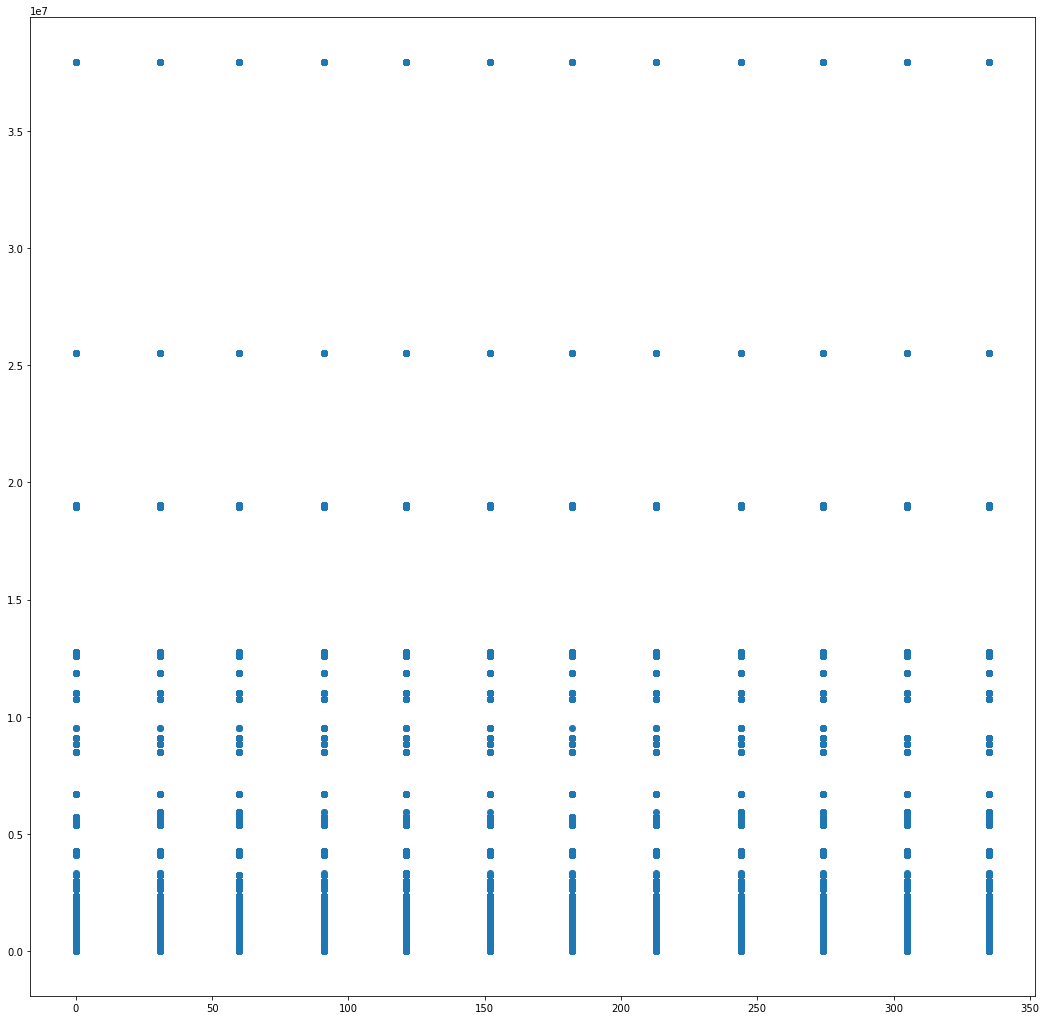

In [154]:
plt.figure(figsize=(18,18))
plt.scatter(df['Fly_day'], df['Infected_SI'])
plt.show()

In [62]:
G = nx.from_pandas_edgelist(df, 
                            source = 'Origin_city', 
                            target = 'Destination_city', 
                            edge_attr = 'Flights')
# ,
#                             create_using = nx.DiGraph()

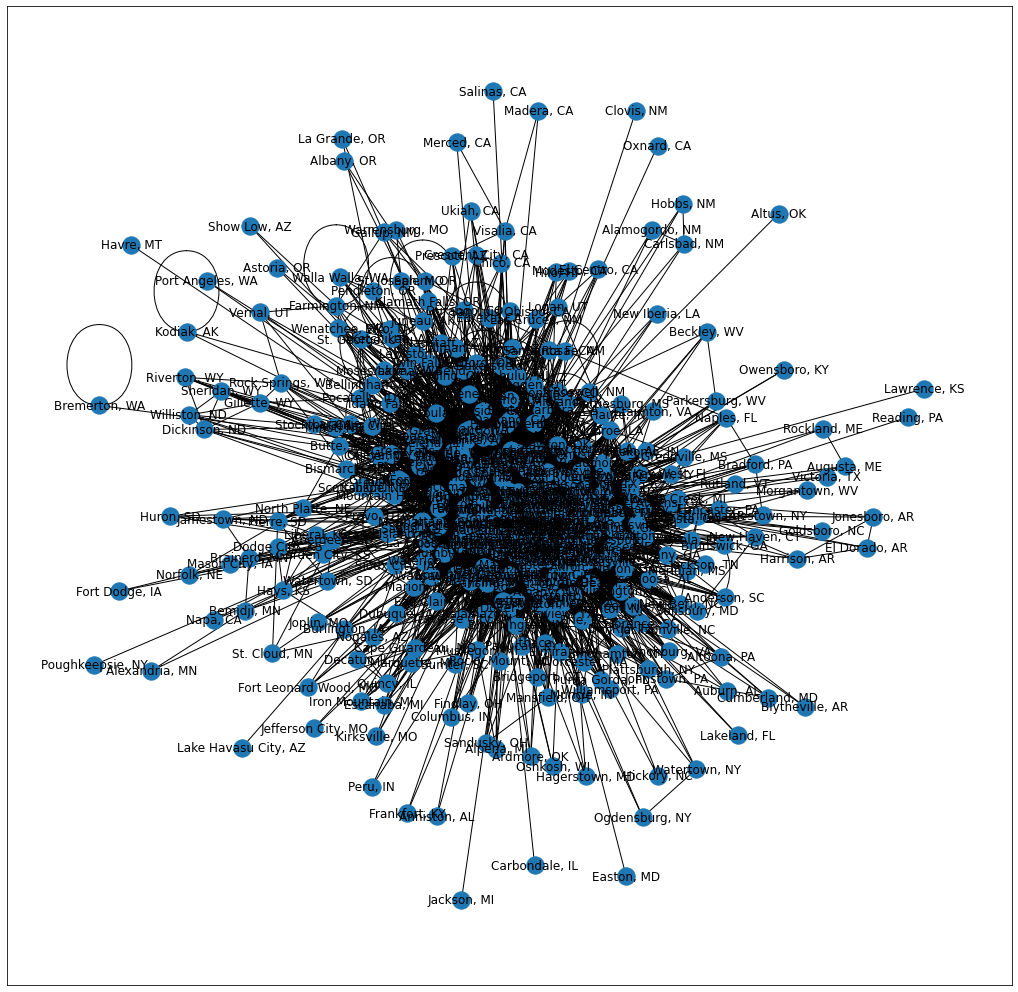

In [55]:
plt.figure(figsize = (18,18))
nx.draw_networkx(G)
plt.show()

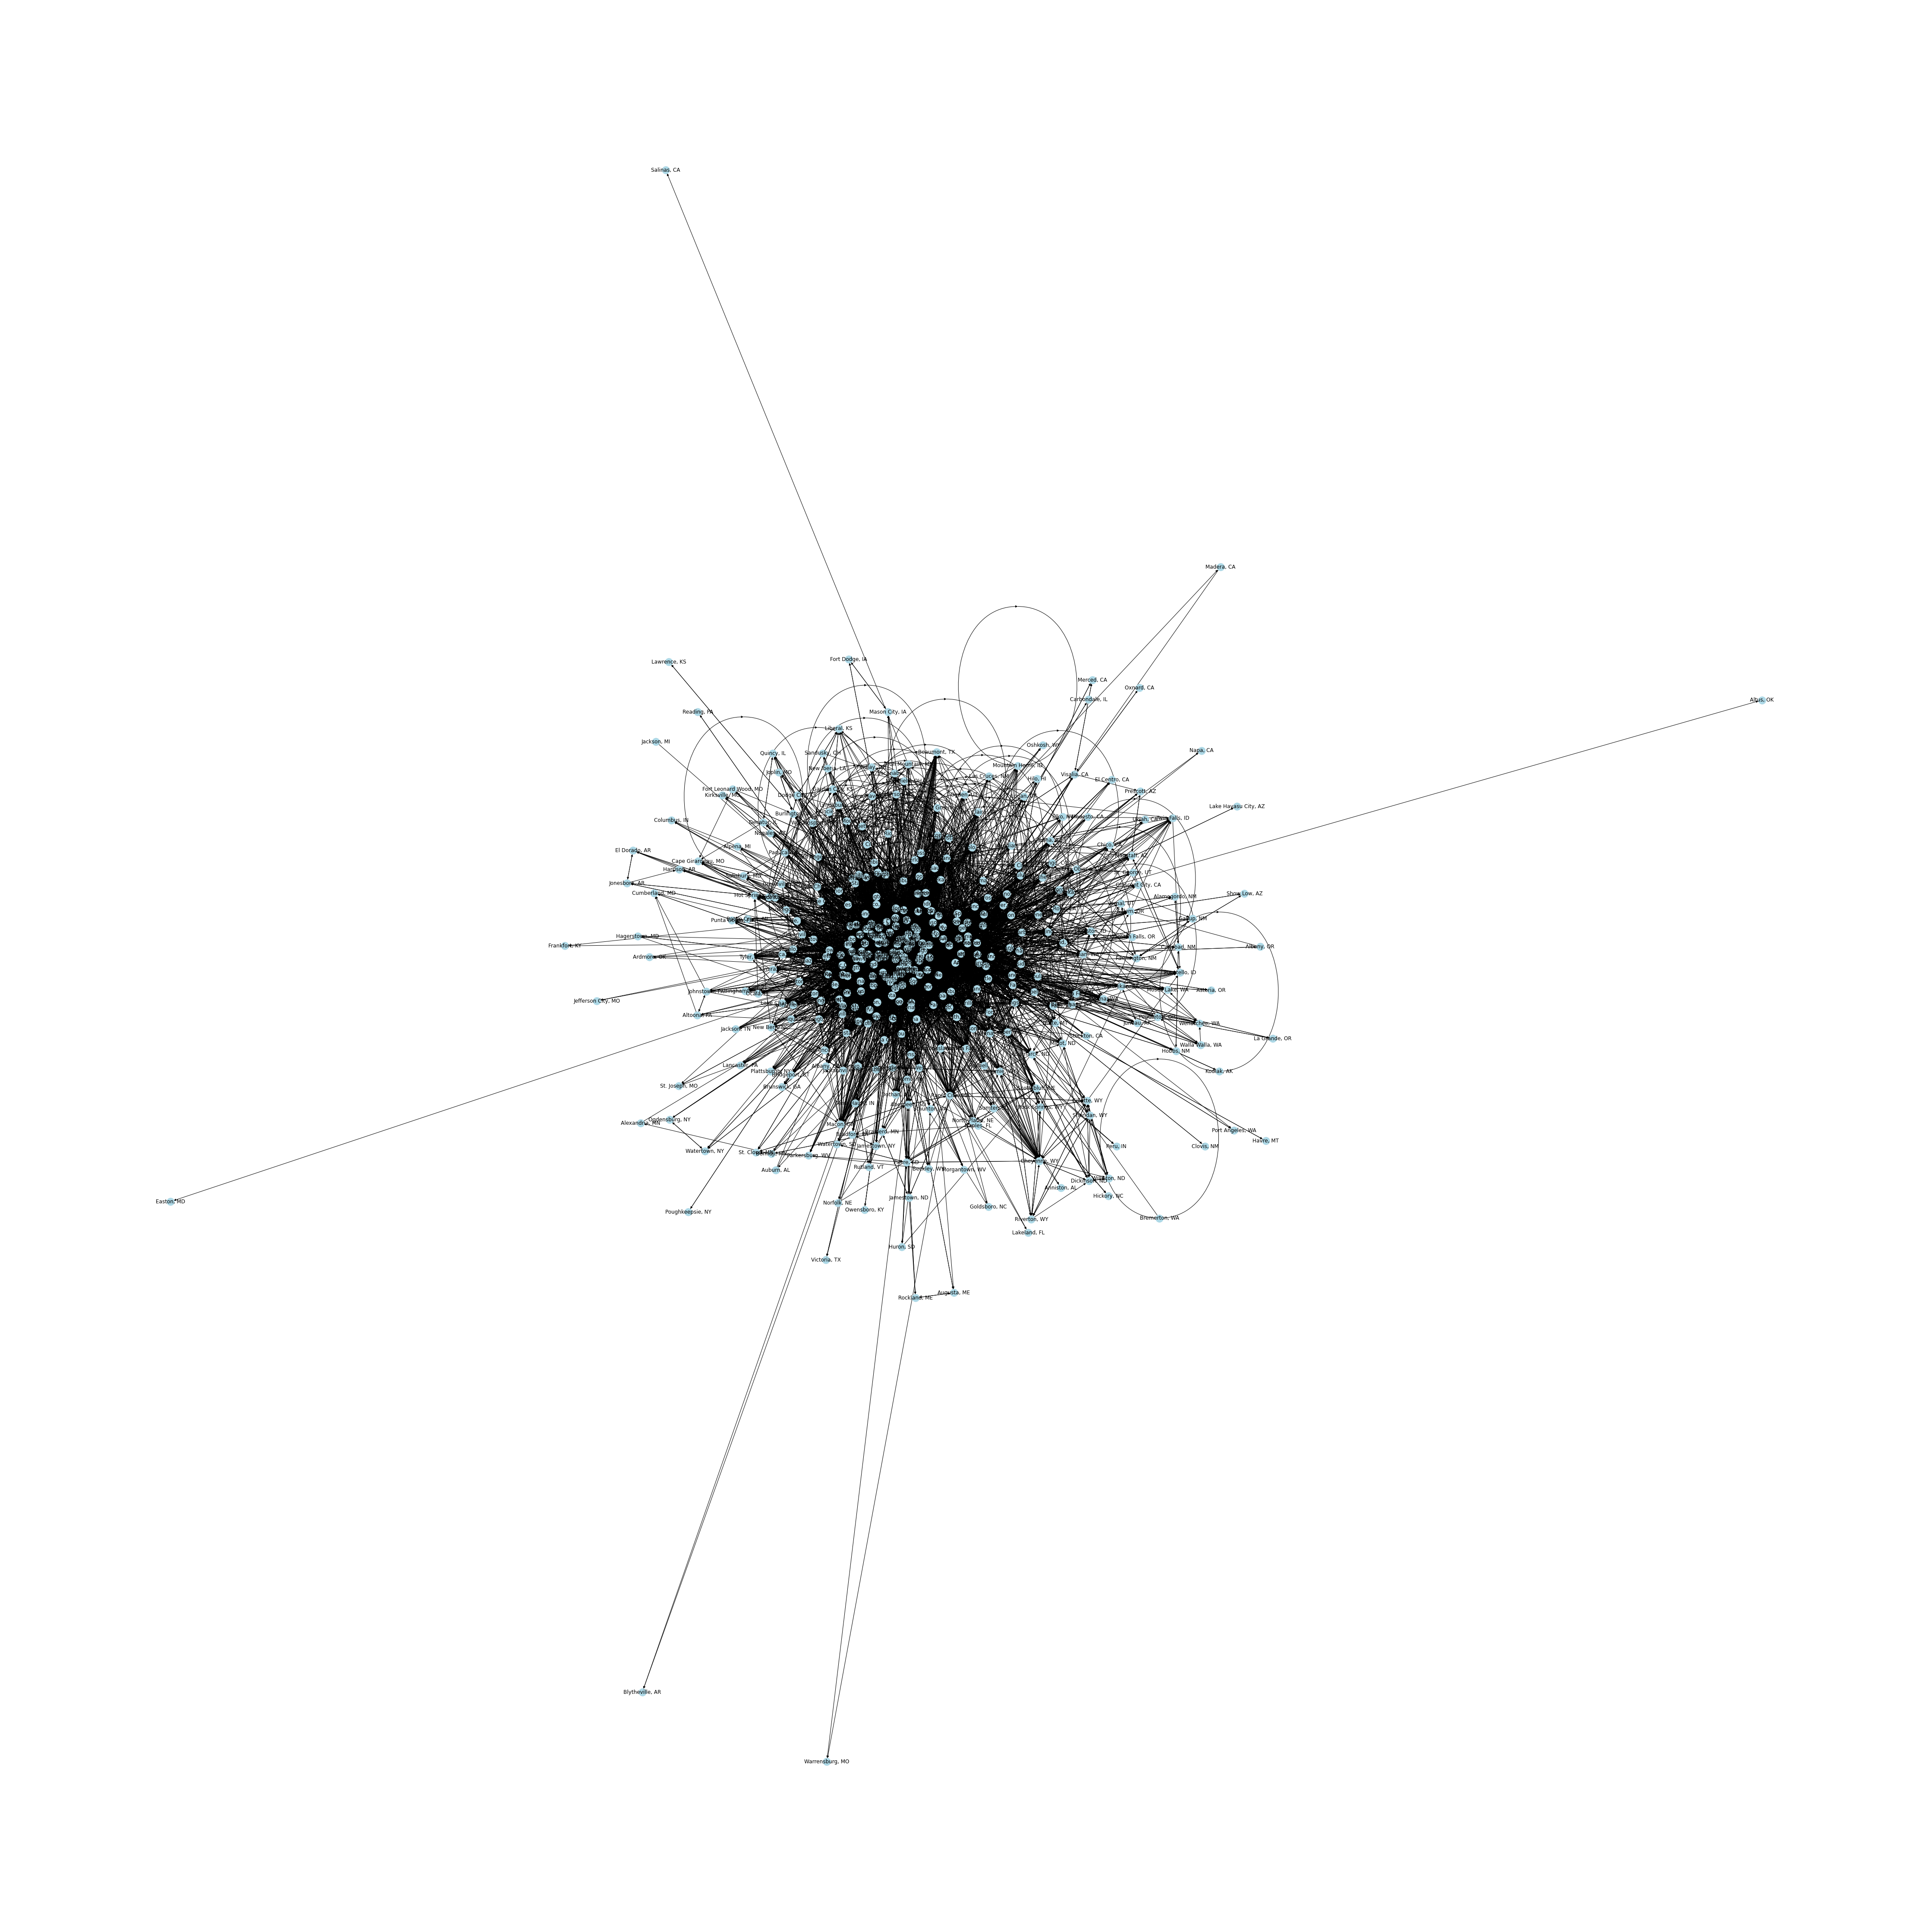

In [48]:
plt.figure(figsize = (62,62))
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
d = dict(G.degree)
nx.draw(G, pos, node_color='lightblue', 
        with_labels=True, 
        nodelist=d)

In [63]:
G.edges(data=True)

EdgeDataView([('Seattle, WA', 'Bend, OR', {'Flights': 1}), ('Seattle, WA', 'Reno, NV', {'Flights': 1}), ('Seattle, WA', 'Butte, MT', {'Flights': 2}), ('Seattle, WA', 'Fargo, ND', {'Flights': 1}), ('Seattle, WA', 'Miami, FL', {'Flights': 30}), ('Seattle, WA', 'Omaha, NE', {'Flights': 1}), ('Seattle, WA', 'Provo, UT', {'Flights': 1}), ('Seattle, WA', 'Tampa, FL', {'Flights': 1}), ('Seattle, WA', 'Austin, TX', {'Flights': 23}), ('Seattle, WA', 'Boston, MA', {'Flights': 30}), ('Seattle, WA', 'Dallas, TX', {'Flights': 32}), ('Seattle, WA', 'Eugene, OR', {'Flights': 117}), ('Seattle, WA', 'Fresno, CA', {'Flights': 53}), ('Seattle, WA', 'Helena, MT', {'Flights': 31}), ('Seattle, WA', 'Juneau, AK', {'Flights': 18}), ('Seattle, WA', 'Newark, NJ', {'Flights': 89}), ('Seattle, WA', 'Peoria, IL', {'Flights': 1}), ('Seattle, WA', 'Pueblo, CO', {'Flights': 1}), ('Seattle, WA', 'Tacoma, WA', {'Flights': 1}), ('Seattle, WA', 'Toledo, OH', {'Flights': 4}), ('Seattle, WA', 'Tucson, AZ', {'Flights': 26})

In [52]:
pos=nx.get_node_attributes(G,'pos')

In [53]:
pos

{}

array([0])